
# <i> Telecom Churn Case Study <i/>

### Business Problem Overview

#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
#### For many incumbent operators, retaining high profitable customers is the number one business goal.
#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


In [17]:
#import libs to work with dataset 

import numpy as np 
import pandas as pd 

#import libs for visualization  
import seaborn as sns 
import matplotlib.pyplot as plt 

#import sklearn libs for linearmodel, model selection and metrics  
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score , roc_auc_score
from sklearn.metrics import precision_score, auc, roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from collections import Counter
from imblearn.combine import SMOTEENN

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score

## for good printing 
from pprint import pprint

sns.set(style="whitegrid")

#hide warnings 
import warnings
warnings.filterwarnings("ignore")

# setting max display rows and columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#setting option to not show stop conversion of numbers to exponential 
pd.set_option('display.float_format', lambda x: '%.2f' % x)



###  Load and analyze the data 

In [18]:
telecomdata = pd.read_csv("/content/sample_data/telecom_churn_data.csv")

In [19]:
telecomdata.shape

(99999, 226)

In [20]:
telecomdata.head(5).T

0           1           2           3  \
mobile_number             7000842753  7001865778  7001625959  7001204172   
circle_id                        109         109         109         109   
loc_og_t2o_mou                  0.00        0.00        0.00        0.00   
std_og_t2o_mou                  0.00        0.00        0.00        0.00   
loc_ic_t2o_mou                  0.00        0.00        0.00        0.00   
last_date_of_month_6       6/30/2014   6/30/2014   6/30/2014   6/30/2014   
last_date_of_month_7       7/31/2014   7/31/2014   7/31/2014   7/31/2014   
last_date_of_month_8       8/31/2014   8/31/2014   8/31/2014   8/31/2014   
last_date_of_month_9       9/30/2014   9/30/2014   9/30/2014   9/30/2014   
arpu_6                        197.38       34.05      167.69      221.34   
arpu_7                        214.82      355.07      189.06      251.10   
arpu_8                        213.80      268.32      210.23      508.05   
arpu_9                         21.10       86.28      290.71      389.50   
onnet_mou_6                      NaN       24.11       11.54       99.91   
onnet_mou_7                      NaN       78.68       55.24       54.39   
onnet_mou_8                     0.00        7.68       37.26      310.98   
onnet_mou_9                      NaN       18.34       74.81      241.71   
offnet_mou_6                     NaN       15.74      143.33      123.31   
offnet_mou_7                     NaN       99.84      220.59      109.01   
offnet_mou_8                    0.00      304.76      208.36       71.68   
offnet_mou_9                     NaN       53.76      118.91      113.54   
roam_ic_mou_6                    NaN        0.00        0.00        0.00   
roam_ic_mou_7                    NaN        0.00        0.00       54.86   
roam_ic_mou_8                   0.00        0.00        0.00       44.38   
roam_ic_mou_9                    NaN        0.00       38.49        0.00   
roam_og_mou_6                    NaN        0.00        0.00        0.00   
roam_og_mou_7                    NaN        0.00        0.00       28.09   
roam_og_mou_8                   0.00        0.00        0.00       39.04   
roam_og_mou_9                    NaN        0.00       70.94        0.00   
loc_og_t2t_mou_6                 NaN       23.88        7.19       73.68   
loc_og_t2t_mou_7                 NaN       74.56       28.74       34.81   
loc_og_t2t_mou_8                0.00        7.68       13.58       10.61   
loc_og_t2t_mou_9                 NaN       18.34       14.39       15.49   
loc_og_t2m_mou_6                 NaN       11.51       29.34      107.43   
loc_og_t2m_mou_7                 NaN       75.94       16.86       83.21   
loc_og_t2m_mou_8                0.00      291.86       38.46       22.46   
loc_og_t2m_mou_9                 NaN       53.76       28.16       65.46   
loc_og_t2f_mou_6                 NaN        0.00       24.11        1.91   
loc_og_t2f_mou_7                 NaN        0.00       21.79        0.65   
loc_og_t2f_mou_8                0.00        0.00       15.61        4.91   
loc_og_t2f_mou_9                 NaN        0.00       22.24        2.06   
loc_og_t2c_mou_6                 NaN        0.00        0.00        0.00   
loc_og_t2c_mou_7                 NaN        2.91      135.54        0.00   
loc_og_t2c_mou_8                0.00        0.00       45.76        0.00   
loc_og_t2c_mou_9                 NaN        0.00        0.48        0.00   
loc_og_mou_6                     NaN       35.39       60.66      183.03   
loc_og_mou_7                     NaN      150.51       67.41      118.68   
loc_og_mou_8                    0.00      299.54       67.66       37.99   
loc_og_mou_9                     NaN       72.11       64.81       83.03   
std_og_t2t_mou_6                 NaN        0.23        4.34       26.23   
std_og_t2t_mou_7                 NaN        4.11       26.49       14.89   
std_og_t2t_mou_8                0.00        0.00       22.58      289.58   
std_og_

In [21]:
telecomdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [22]:
telecomdata.describe(percentiles=[0.1,0.25,0.5,0.75,0.99]).T

count          mean       std           min  \
mobile_number      99999.00 7001207270.39 695669.39 7000000074.00   
circle_id          99999.00        109.00      0.00        109.00   
loc_og_t2o_mou     98981.00          0.00      0.00          0.00   
std_og_t2o_mou     98981.00          0.00      0.00          0.00   
loc_ic_t2o_mou     98981.00          0.00      0.00          0.00   
arpu_6             99999.00        282.99    328.44      -2258.71   
arpu_7             99999.00        278.54    338.16      -2014.05   
arpu_8             99999.00        279.15    344.47       -945.81   
arpu_9             99999.00        261.65    342.00      -1899.51   
onnet_mou_6        96062.00        132.40    297.21          0.00   
onnet_mou_7        96140.00        133.67    308.79          0.00   
onnet_mou_8        94621.00        133.02    308.95          0.00   
onnet_mou_9        92254.00        130.30    308.48          0.00   
offnet_mou_6       96062.00        197.94    316.85          0.00   
offnet_mou_7       96140.00        197.05    325.86          0.00   
offnet_mou_8       94621.00        196.57    327.17          0.00   
offnet_mou_9       92254.00        190.34    319.40          0.00   
roam_ic_mou_6      96062.00          9.95     72.83          0.00   
roam_ic_mou_7      96140.00          7.15     73.45          0.00   
roam_ic_mou_8      94621.00          7.29     68.40          0.00   
roam_ic_mou_9      92254.00          6.34     57.14          0.00   
roam_og_mou_6      96062.00         13.91     71.44          0.00   
roam_og_mou_7      96140.00          9.82     58.46          0.00   
roam_og_mou_8      94621.00          9.97     64.71          0.00   
roam_og_mou_9      92254.00          8.56     58.44          0.00   
loc_og_t2t_mou_6   96062.00         47.10    150.86          0.00   
loc_og_t2t_mou_7   96140.00         46.47    155.32          0.00   
loc_og_t2t_mou_8   94621.00         45.89    151.18          0.00   
loc_og_t2t_mou_9   92254.00         44.58    148.00          0.00   
loc_og_t2m_mou_6   96062.00         93.34    162.78          0.00   
loc_og_t2m_mou_7   96140.00         91.40    157.49          0.00   
loc_og_t2m_mou_8   94621.00         91.76    156.54          0.00   
loc_og_t2m_mou_9   92254.00         90.46    158.68          0.00   
loc_og_t2f_mou_6   96062.00          3.75     14.23          0.00   
loc_og_t2f_mou_7   96140.00          3.79     14.26          0.00   
loc_og_t2f_mou_8   94621.00          3.68     13.27          0.00   
loc_og_t2f_mou_9   92254.00          3.66     13.46          0.00   
loc_og_t2c_mou_6   96062.00          1.12      5.45          0.00   
loc_og_t2c_mou_7   96140.00          1.37      7.53          0.00   
loc_og_t2c_mou_8   94621.00          1.43      6.78          0.00   
loc_og_t2c_mou_9   92254.00          1.23      5.62          0.00   
loc_og_mou_6       96062.00        144.20    251.75          0.00   
loc_og_mou_7       96140.00        141.67    248.73          0.00   
loc_og_mou_8       94621.00        141.33    245.91          0.00   
loc_og_mou_9       92254.00        138.71    245.93          0.00   
std_og_t2t_mou_6   96062.00         79.83    252.48          0.00   
std_og_t2t_mou_7   96140.00         83.30    263.63          0.00   
std_og_t2t_mou_8   94621.00         83.28    265.49          0.00   
std_og_t2t_mou_9   92254.00         82.34    267.18          0.00   
std_og_t2m_mou_6   96062.00         87.30    255.62          0.00   
std_og_t2m_mou_7   96140.00         90.80    269.35          0.00   
std_og_t2m_mou_8   94621.00         89.84    271.76          0.00   
std_og_t2m_mou_9   92254.00         86.28    261.41          0.00   
std_og_t2f_mou_6   96062.00          1.13      7.98          0.00   
std_og_t2f_mou_7   96140.00          1.12      8.60          0.00   
std_og_t2f_mou_8   94621.00          1.07      7.91          0.00   
std_og_t2f_mou_9   92254.00          1.04      8.26          0.00   
std_og_t2c_mou_6   9

#### Missing value analysis - Impute / delete the column or record 



In [23]:
#function checking columns which have missing values 
def check_nullvaluesandpercentages ():
    totalmissingcount = telecomdata.isnull().sum()[telecomdata.isnull().sum() >0].sort_values(ascending=False)
    totalmissingpercent = round(100*telecomdata.isnull().sum()[telecomdata.isnull().sum() >0]/len(telecomdata.index),3).sort_values(ascending=False)
    print("Total columns with missing values =", len(totalmissingcount))
    print("Total missing values count in each column and percentage ")
    print(pd.concat([totalmissingcount,totalmissingpercent], axis=1, keys=['MissingCount', 'MissingPercent']))

In [24]:
# check missing values 
check_nullvaluesandpercentages()

Total columns with missing values = 166
Total missing values count in each column and percentage 
                          MissingCount  MissingPercent
count_rech_3g_6                  74846           74.85
fb_user_6                        74846           74.85
date_of_last_rech_data_6         74846           74.85
count_rech_2g_6                  74846           74.85
night_pck_user_6                 74846           74.85
av_rech_amt_data_6               74846           74.85
total_rech_data_6                74846           74.85
arpu_2g_6                        74846           74.85
max_rech_data_6                  74846           74.85
arpu_3g_6                        74846           74.85
arpu_3g_7                        74428           74.43
count_rech_3g_7                  74428           74.43
count_rech_2g_7                  74428           74.43
av_rech_amt_data_7               74428           74.43
max_rech_data_7                  74428           74.43
arpu_2g_7             

In [25]:
#### Check columns with type object 
print("Check null values in columns with dtype as object")
print(telecomdata[telecomdata.select_dtypes(np.object).columns].isna().sum())
print("date column is not useful for analysis - dropping them ")
telecomdata.drop(telecomdata.select_dtypes(np.object).columns, axis=1,inplace=True)
print("\n Check after dropping the date column ")
pprint(telecomdata.select_dtypes(np.object).columns)

Check null values in columns with dtype as object
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64
date column is not useful for analysis - dropping them 

 Check after dropping the date column 
Index([], dtype='object')


In [26]:
#### Check columns with type int 
print("Check null values in columns with dtype as int64")
print(telecomdata[telecomdata.select_dtypes(np.int64).columns].isna().sum())
print("Impute the columns null values with 0 and check for null values again ")
telecomdata[telecomdata.select_dtypes(np.int64).columns].fillna(0)
#telecomdata.drop(telecomdata.select_dtypes(np.object).columns, axis=1,inplace=True)
print(telecomdata[telecomdata.select_dtypes(np.int64).columns].isna().sum())

Check null values in columns with dtype as int64
mobile_number         0
circle_id             0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
last_day_rch_amt_9    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
monthly_2g_9          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
sachet_2g_9           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
monthly_3g_9          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
sachet_3g_9           0
aon                   0
dtype: int64
Impute the columns null values with 0 and check for null values again 
mobile_number         0
cir

In [27]:
#### Check columns with type float64 
print("Check null values in columns with dtype as float64")
print(telecomdata[telecomdata.select_dtypes(np.float64).columns].isna().sum())
print("Impute the columns null values with 0 and check for null values again ")
telecomdata[telecomdata.select_dtypes(np.float64).columns] = telecomdata[telecomdata.select_dtypes(np.float64).columns].fillna(0)
#telecomdata.drop(telecomdata.select_dtypes(np.object).columns, axis=1,inplace=True)
print(telecomdata[telecomdata.select_dtypes(np.float64).columns].isna().sum())

Check null values in columns with dtype as float64
loc_og_t2o_mou         1018
std_og_t2o_mou         1018
loc_ic_t2o_mou         1018
arpu_6                    0
arpu_7                    0
arpu_8                    0
arpu_9                    0
onnet_mou_6            3937
onnet_mou_7            3859
onnet_mou_8            5378
onnet_mou_9            7745
offnet_mou_6           3937
offnet_mou_7           3859
offnet_mou_8           5378
offnet_mou_9           7745
roam_ic_mou_6          3937
roam_ic_mou_7          3859
roam_ic_mou_8          5378
roam_ic_mou_9          7745
roam_og_mou_6          3937
roam_og_mou_7          3859
roam_og_mou_8          5378
roam_og_mou_9          7745
loc_og_t2t_mou_6       3937
loc_og_t2t_mou_7       3859
loc_og_t2t_mou_8       5378
loc_og_t2t_mou_9       7745
loc_og_t2m_mou_6       3937
loc_og_t2m_mou_7       3859
loc_og_t2m_mou_8       5378
loc_og_t2m_mou_9       7745
loc_og_t2f_mou_6       3937
loc_og_t2f_mou_7       3859
loc_og_t2f_mou_8       53

In [28]:
# check for null values again 
check_nullvaluesandpercentages()

Total columns with missing values = 0
Total missing values count in each column and percentage 
Empty DataFrame
Columns: [MissingCount, MissingPercent]
Index: []


##### All null values have been imputed  -  Now we can proceed with the clean data 

#### Check and remove columns which have only one unique value 

In [29]:
columns_with_1_unique_var = telecomdata.nunique()
print("Total columns with only one unique value = ",len(columns_with_1_unique_var[columns_with_1_unique_var == 1].index))
print("Columns with only one unique value are as below :")
print(columns_with_1_unique_var[columns_with_1_unique_var == 1].index)
print("Dropping these columns")
telecomdata.drop(columns_with_1_unique_var[columns_with_1_unique_var == 1].index, inplace=True, axis=1)

Total columns with only one unique value =  12
Columns with only one unique value are as below :
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')
Dropping these columns


#### Check if there are any duplicate records using mobile number as Unique key 

In [30]:
if(len(telecomdata.mobile_number.unique()) == len(telecomdata.index)):
    print("No duplicate records")
else :
    print("Total duplicate records = ", len(telecomdata.index) - telecomdata.mobile_number.unique())

No duplicate records


#### Drop column "mobile_number"  as this not useful in churn analysis 

In [31]:
### drop column "mobile_number", "circle_id" as these donot aid in churn analysis 
telecomdata = telecomdata.drop(columns=["mobile_number"])


In [32]:
telecomdata.shape

(99999, 201)

#### Rename columns to be in sync with naming convention used in other columns

In [33]:
# Rename month named vbc columns to format 6,7,8 and 9 so that all columns are in sync on the naming convention 

telecomdata.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

### Filter high-value customers



#### Find average recharge amount and 70th percentile for average recharge amount 


##### derived column - total recharge by user  =  totalrecharge data * avgerage recharge amount  

In [34]:
telecomdata['total_data_rech_amt_6'] = telecomdata['total_rech_data_6'] * telecomdata['av_rech_amt_data_6']
telecomdata['total_data_rech_amt_7'] = telecomdata['total_rech_data_7'] * telecomdata['av_rech_amt_data_7']
telecomdata['total_data_rech_amt_8'] = telecomdata['total_rech_data_8'] * telecomdata['av_rech_amt_data_8']
telecomdata['total_data_rech_amt_9'] = telecomdata['total_rech_data_9'] * telecomdata['av_rech_amt_data_9']

In [35]:
# dropping columns as we have new column created from  them 

telecomdata = telecomdata.drop(["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9",
                               "av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"], axis=1)

In [36]:
telecomdata.shape

(99999, 197)

#### derived column - average recharge amount during month 6 and 7 - Good phase  

In [37]:
# compute the average recharge amount for the month 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

#avg_rech_amt_month_6_7 = telecomdata[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
#                                             'total_rech_amt_7']].mean(axis=1)

avg_rech_amt_month_6_7 = (telecomdata['total_data_rech_amt_6']+telecomdata['total_data_rech_amt_7']+telecomdata['total_rech_amt_6'] +
                                             telecomdata['total_rech_amt_7'])/2

In [38]:
avg_rech_70th_percentile =  np.percentile(avg_rech_amt_month_6_7, 70)
print("70th percentile of the average recharge amount in the first two months (the good phase) is - ", avg_rech_70th_percentile)

70th percentile of the average recharge amount in the first two months (the good phase) is -  478.0


In [39]:
telecomdata =  telecomdata[avg_rech_amt_month_6_7 >= avg_rech_70th_percentile]
telecomdata.shape

(30001, 197)

In [40]:
telecomdata.head()

arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.38  214.82  213.80   21.10         0.00         0.00         0.00   
7  1069.18 1349.85 3171.48  500.00        57.84        54.68        52.29   
8   378.72  492.22  137.36  166.79       413.69       351.03        35.08   
21  514.45  597.75  637.76  578.60       102.41       132.11        85.14   
23   74.35  193.90  366.97  811.48        48.96        50.66        33.58   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          0.00          0.00          0.00          0.00          0.00   
7          0.00        453.43        567.16        325.91          0.00   
8         33.46         94.66         80.63        136.48        108.71   
21       161.63        757.93        896.68        983.39        869.89   
23        15.74         85.41         89.36        205.89        111.88   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            0.00           0.00           0.00           0.00           0.00   
7           16.23          33.49          31.64           0.00          23.74   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           12.59          38.06           0.00             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28              0.00            308.63   
8             217.59             12.49             26.13             80.96   
21              6.16             23.34             29.98             91.81   
23             50.66             33.58             15.74             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28              0.00             62.13   
8              70.58             50.54             34.58              0.00   
21             87.93            104.81            107.54              0.75   
23             83.01            148.56             83.73              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               0.00              0.00              0.00              0.00   
7              55.14             53.23              0.00              0.00   
8               0.00              0.00              0.00              0.00   
21              0.00              1.58              0.00              0.00   
23              0.00              0.00              2.45              0.00   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               0.00              0.00              0.00          0.00   
7               0.00              0.00              0.00        422.16   
8               0.00              7.15              0.00        378.09   
21              0.00              0.00              0.00         97.04   
23              0.00             17.71              4.08        131.91   

    loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         533.91        255.79          0.00              4.30   
8         288.18         63.04         60.71            116.56   
21         94.09        129.74        137.53             97.93   
23    

In [41]:
# Reset the dataframe indexes

telecomdata = telecomdata.reset_index(drop=True)
telecomdata.head()

arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.38  214.82  213.80   21.10         0.00         0.00         0.00   
1 1069.18 1349.85 3171.48  500.00        57.84        54.68        52.29   
2  378.72  492.22  137.36  166.79       413.69       351.03        35.08   
3  514.45  597.75  637.76  578.60       102.41       132.11        85.14   
4   74.35  193.90  366.97  811.48        48.96        50.66        33.58   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0         0.00          0.00          0.00          0.00          0.00   
1         0.00        453.43        567.16        325.91          0.00   
2        33.46         94.66         80.63        136.48        108.71   
3       161.63        757.93        896.68        983.39        869.89   
4        15.74         85.41         89.36        205.89        111.88   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0           0.00           0.00           0.00           0.00           0.00   
1          16.23          33.49          31.64           0.00          23.74   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1          12.59          38.06           0.00             51.39   
2           0.00           0.00           0.00            297.13   
3           0.00           0.00           0.00              4.48   
4           0.00           0.00           0.00             48.96   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             31.38             40.28              0.00            308.63   
2            217.59             12.49             26.13             80.96   
3              6.16             23.34             29.98             91.81   
4             50.66             33.58             15.74             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28              0.00             62.13   
2             70.58             50.54             34.58              0.00   
3             87.93            104.81            107.54              0.75   
4             83.01            148.56             83.73              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
1             55.14             53.23              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3              0.00              1.58              0.00              0.00   
4              0.00              0.00              2.45              0.00   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0              0.00              0.00              0.00          0.00   
1              0.00              0.00              0.00        422.16   
2              0.00              7.15              0.00        378.09   
3              0.00              0.00              0.00         97.04   
4              0.00             17.71              4.08        131.91   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        533.91        255.79          0.00              4.30   
2        288.18         63.04         60.71            116.56   
3         94.09        129.74        137.53             97.93   
4        133.68        182.14        101.93              0

##### Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:


<li> total_ic_mou_9 </li>
<li> total_og_mou_9 </li>
<li> vol_2g_mb_9 </li>
<li> vol_3g_mb_9 </li>

In [42]:
### drived target column "churn" based on if the customer has used incomingcall/outgoingcall/2g data/3g data in the 9th Month 

telecomdata["churn"] =  telecomdata.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) and (x.total_og_mou_9 == 0)
                                                        and (x.vol_2g_mb_9 == 0) and (x.vol_3g_mb_9 == 0)) else 0, axis=1)

print(telecomdata["churn"].head())
telecomdata["churn"].value_counts()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64


0    27560
1     2441
Name: churn, dtype: int64

#### Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [43]:
col_with_9 = [col for col in telecomdata.columns if "_9" in col]
col_with_9
print("Total columns with '_9' - removed =", len(col_with_9))

Total columns with '_9' - removed = 49


In [44]:
telecomdata.drop(col_with_9, axis=1, inplace=True)

In [45]:
telecomdata.shape

(30001, 149)

#### Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis.

In [46]:
cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
        'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
        'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
        'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
        'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
        'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
        'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
        'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
        'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
        'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
        'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
        'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
        'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
        'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
        'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']
        #'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
        #'total_rech_data_6','total_rech_data_7','total_rech_data_8']

telecomdata.drop(cols, axis = 1, inplace = True)

telecomdata.shape

(30001, 101)

#### check impact of night_pck and fb_user  

In [47]:
print("distribution of values in fb_user_6" )
pprint(telecomdata.fb_user_6.value_counts()/len(telecomdata.index)*100)
print("\n distribution of values in fb_user_7" )
pprint(telecomdata.fb_user_6.value_counts()/len(telecomdata.index)*100)
print("\n distribution of values in fb_user_8" )
pprint(telecomdata.fb_user_6.value_counts()/len(telecomdata.index)*100)

distribution of values in fb_user_6
1.00   51.75
0.00   48.25
Name: fb_user_6, dtype: float64

 distribution of values in fb_user_7
1.00   51.75
0.00   48.25
Name: fb_user_6, dtype: float64

 distribution of values in fb_user_8
1.00   51.75
0.00   48.25
Name: fb_user_6, dtype: float64


more the 50% of the users take fb pack/feature - we shall retain this columns 

In [48]:
print("distribution of values in night_pck_user_6" )
pprint(telecomdata.night_pck_user_6.value_counts()/len(telecomdata.index)*100)
print("\n distribution of values in night_pck_user_7" )
pprint(telecomdata.night_pck_user_7.value_counts()/len(telecomdata.index)*100)
print("\n distribution of values in night_pck_user_8" )
pprint(telecomdata.night_pck_user_8.value_counts()/len(telecomdata.index)*100)

distribution of values in night_pck_user_6
0.00   98.64
1.00    1.36
Name: night_pck_user_6, dtype: float64

 distribution of values in night_pck_user_7
0.00   98.75
1.00    1.25
Name: night_pck_user_7, dtype: float64

 distribution of values in night_pck_user_8
0.00   98.86
1.00    1.14
Name: night_pck_user_8, dtype: float64


Less than 2% of customers use night_pck - we shall drop this columns  

In [49]:
telecomdata.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'] , inplace=True , axis =1)

In [50]:
# check the data again 

telecomdata.head().T

0       1      2       3       4
arpu_6                197.38 1069.18 378.72  514.45   74.35
arpu_7                214.82 1349.85 492.22  597.75  193.90
arpu_8                213.80 3171.48 137.36  637.76  366.97
onnet_mou_6             0.00   57.84 413.69  102.41   48.96
onnet_mou_7             0.00   54.68 351.03  132.11   50.66
onnet_mou_8             0.00   52.29  35.08   85.14   33.58
offnet_mou_6            0.00  453.43  94.66  757.93   85.41
offnet_mou_7            0.00  567.16  80.63  896.68   89.36
offnet_mou_8            0.00  325.91 136.48  983.39  205.89
roam_ic_mou_6           0.00   16.23   0.00    0.00    0.00
roam_ic_mou_7           0.00   33.49   0.00    0.00    0.00
roam_ic_mou_8           0.00   31.64   0.00    0.00    0.00
roam_og_mou_6           0.00   23.74   0.00    0.00    0.00
roam_og_mou_7           0.00   12.59   0.00    0.00    0.00
roam_og_mou_8           0.00   38.06   0.00    0.00    0.00
loc_og_mou_6            0.00  422.16 378.09   97.04  131.91
loc_og_mou_7            0.00  533.91 288.18   94.09  133.68
loc_og_mou_8            0.00  255.79  63.04  129.74  182.14
std_og_mou_6            0.00   60.86 130.26  763.29    2.36
std_og_mou_7            0.00   75.14 143.48  934.69    6.35
std_og_mou_8            0.00   77.84  98.28  938.79   39.61
isd_og_mou_6            0.00    0.00   0.00    0.00    0.00
isd_og_mou_7            0.00    0.18   0.00    0.00    0.01
isd_og_mou_8            0.00   10.01   0.00    0.00    0.00
spl_og_mou_6            0.00    4.50   0.00    0.00    0.10
spl_og_mou_7            0.00    0.00   0.00    0.00    0.00
spl_og_mou_8            0.00    6.50  10.23    0.00   17.71
og_others_6             0.00    0.00   0.00    0.00    0.00
og_others_7             0.00    0.00   0.00    0.00    0.00
og_others_8             0.00    0.00   0.00    0.00    0.00
total_og_mou_6          0.00  487.53 508.36  860.34  134.38
total_og_mou_7          0.00  609.24 431.66 1028.79  140.04
total_og_mou_8          0.00  350.16 171.56 1068.54  239.48
loc_ic_mou_6            0.00  427.88  81.43  125.33  116.63
loc_ic_mou_7            0.00  355.23  23.83   87.68  174.41
loc_ic_mou_8            5.44  188.04  15.79  159.11  224.21
std_ic_mou_6            0.00  180.54  22.43   81.76    2.94
std_ic_mou_7            0.00  173.08   4.66   44.21   14.89
std_ic_mou_8            0.00  193.94   0.75  101.93   57.29
total_ic_mou_6          0.00  626.46 103.86  207.09  119.58
total_ic_mou_7          0.00  558.04  28.49  131.89  222.89
total_ic_mou_8          5.44  428.74  16.54  261.04  298.33
spl_ic_mou_6            0.00    0.21   0.00    0.00    0.00
spl_ic_mou_7            0.00    0.00   0.00    0.00    0.00
spl_ic_mou_8            0.00    0.00   0.00    0.00    0.00
isd_ic_mou_6            0.00    2.06   0.00    0.00    0.00
isd_ic_mou_7            0.00   14.53   0.00    0.00   28.23
isd_ic_mou_8            0.00   31.59   0.00    0.00    3.74
ic_others_6             0.00   15.74   0.00    0.00    0.00
ic_others_7             0.00   15.19   0.00    0.00    5.35
ic_others_8             0.00   15.14   0.00    0.00   13.06
total_rech_num_6        4.00    5.00  19.00   22.00    3.00
total_rech_num_7        3.00    5.00  21.00   26.00    5.00
total_rech_num_8        2.00    7.00  14.00   27.00    4.00
total_rech_amt_6      362.00 1580.00 437.00  600.00    0.00
total_rech_amt_7      252.00  790.00 601.00  680.00  454.00
total_rech_amt_8      252.00 3638.00 120.00  718.00  439.00
max_rech_amt_6        252.00 1580.00  90.00   50.00    0.00
max_rech_amt_7        252.00  790.00 154.00   50.00  179.00
max_rech_amt_8        252.00 1580.00  30.00   50.00  179.00
max_rech_data_6       252.00    0.00   0.00    0.00    0.00
max_rech_data_7       252.00    0.00 154.00    0.00  179.00
max_rech_data_8       252.00    0.00  23.00    0.00  179.00
count_rech_2g_6         0.00    0.00   0.00    0.00    0.00
count_rech_2g_7         0.00    0.00   2.00    0.00    0.00
count_rech_2g_8         0.00    0.00   3.00    0.00    0.00
count_r

In [51]:
# check the data distribution 

telecomdata.describe().T

count    mean     std      min    25%    50%     75%  \
arpu_6                30001.00  558.49  460.64 -2258.71 309.87 481.69  699.94   
arpu_7                30001.00  560.78  479.78 -2014.05 309.83 480.94  698.32   
arpu_8                30001.00  508.60  501.96  -945.81 231.47 427.58  661.49   
onnet_mou_6           30001.00  260.79  459.64     0.00  17.08  84.58  290.44   
onnet_mou_7           30001.00  267.82  479.99     0.00  16.03  82.81  290.24   
onnet_mou_8           30001.00  234.11  458.45     0.00  10.39  65.61  239.96   
offnet_mou_6          30001.00  373.69  482.52     0.00  71.61 222.54  487.94   
offnet_mou_7          30001.00  378.10  498.92     0.00  69.91 220.03  494.01   
offnet_mou_8          30001.00  335.08  482.06     0.00  46.74 182.79  438.89   
roam_ic_mou_6         30001.00   16.11   76.30     0.00   0.00   0.00    0.00   
roam_ic_mou_7         30001.00   12.64   75.79     0.00   0.00   0.00    0.00   
roam_ic_mou_8         30001.00   12.50   74.13     0.00   0.00   0.00    0.00   
roam_og_mou_6         30001.00   26.57  116.21     0.00   0.00   0.00    0.00   
roam_og_mou_7         30001.00   20.15   96.10     0.00   0.00   0.00    0.00   
roam_og_mou_8         30001.00   19.87  104.72     0.00   0.00   0.00    0.00   
loc_og_mou_6          30001.00  254.08  378.34     0.00  32.26 124.54  332.09   
loc_og_mou_7          30001.00  255.12  375.42     0.00  34.48 127.88  333.39   
loc_og_mou_8          30001.00  235.73  363.37     0.00  22.46 110.81  310.61   
std_og_mou_6          30001.00  347.13  608.63     0.00   0.38  45.13  465.39   
std_og_mou_7          30001.00  363.98  639.80     0.00   0.15  43.98  499.29   
std_og_mou_8          30001.00  307.38  608.98     0.00   0.00  25.48  357.23   
isd_og_mou_6          30001.00    2.17   45.85     0.00   0.00   0.00    0.00   
isd_og_mou_7          30001.00    2.11   45.55     0.00   0.00   0.00    0.00   
isd_og_mou_8          30001.00    1.95   44.71     0.00   0.00   0.00    0.00   
spl_og_mou_6          30001.00    5.82   17.57     0.00   0.00   0.21    5.21   
spl_og_mou_7          30001.00    7.11   21.79     0.00   0.00   0.71    6.94   
spl_og_mou_8          30001.00    6.56   20.31     0.00   0.00   0.43    6.15   
og_others_6           30001.00    0.66    4.11     0.00   0.00   0.00    0.00   
og_others_7           30001.00    0.04    2.68     0.00   0.00   0.00    0.00   
og_others_8           30001.00    0.06    3.32     0.00   0.00   0.00    0.00   
total_og_mou_6        30001.00  609.87  690.87     0.00 116.58 410.63  858.76   
total_og_mou_7        30001.00  628.37  717.22     0.00 116.49 425.59  891.44   
total_og_mou_8        30001.00  551.68  700.48     0.00  72.36 333.54  774.78   
loc_ic_mou_6          30001.00  231.15  314.82     0.00  47.88 134.49  297.14   
loc_ic_mou_7          30001.00  234.31  316.00     0.00  52.51 137.59  298.71   
loc_ic_mou_8          30001.00  223.26  308.32     0.00  40.53 128.73  285.44   
std_ic_mou_6          30001.00   46.79  137.50     0.00   1.03  11.41   41.49   
std_ic_mou_7          30001.00   49.05  148.16     0.00   1.05  12.09   43.81   
std_ic_mou_8          30001.00   44.40  138.81     0.00   0.41   9.29   38.38   
total_ic_mou_6        30001.00  289.95  365.52     0.00  72.88 183.73  371.99   
total_ic_mou_7        30001.00  296.76  373.75     0.00  78.99 187.58  377.31   
total_ic_mou_8        30001.00  279.92  361.18     0.00  61.36 173.11  361.73   
spl_ic_mou_6          30001.00    0.06    0.19     0.00   0.00   0.00    0.00   
spl_ic_mou_7          30001.00    0.02    0.18     0.00   0.00   0.00    0.00   
spl_ic_mou_8          30001.00    0.03    0.11     0.00   0.00   0.00    0.00   
isd_ic_mou_6          30001.00   10.78   76.73     0.00   0.00   0.00    0.00   
isd_ic_mou_7          30001.00   11.88   80.18     0.00   0.00   0.00    0.00   
isd_ic_mou_8          30001.00   11.00   70.60     0.00   0.00   0.00    0.00   
ic_others_6           30001.00    1.15   13.99     0.00 

#### arpu min data seems to be negative -  as per definition it is "Average revenue per user" which cannot be negative 

In [52]:
print("Total arpu values as negative = " , len(telecomdata[telecomdata.arpu_6 < 0]) + len(telecomdata[telecomdata.arpu_7 < 0]) +len(telecomdata[telecomdata.arpu_8 < 0]))


Total arpu values as negative =  179


In [53]:
#### Remove all rows with records with neagtive arpu 
telecomdata = telecomdata[(telecomdata.arpu_6 >=0) 
                & (telecomdata.arpu_7 >=0) 
                & (telecomdata.arpu_8 >=0)]

In [54]:
telecomdata.shape

(29824, 98)

#### Check for outliers 

In [55]:
telecomdata.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]).T

count    mean     std    min    25%    50%     75%  \
arpu_6                29824.00  559.22  459.50   0.00 311.00 482.46  699.73   
arpu_7                29824.00  562.56  478.65   0.00 311.80 482.12  699.08   
arpu_8                29824.00  510.09  501.03   0.00 233.86 428.51  662.61   
onnet_mou_6           29824.00  261.22  459.88   0.00  17.31  85.04  291.28   
onnet_mou_7           29824.00  268.43  480.12   0.00  16.28  83.58  291.49   
onnet_mou_8           29824.00  234.71  458.52   0.00  10.79  66.21  241.38   
offnet_mou_6          29824.00  373.29  479.94   0.00  72.35 223.06  487.63   
offnet_mou_7          29824.00  378.52  497.88   0.00  70.55 220.97  494.43   
offnet_mou_8          29824.00  335.50  479.85   0.00  47.81 183.86  439.87   
roam_ic_mou_6         29824.00   16.16   76.48   0.00   0.00   0.00    0.00   
roam_ic_mou_7         29824.00   12.67   75.92   0.00   0.00   0.00    0.00   
roam_ic_mou_8         29824.00   12.54   74.30   0.00   0.00   0.00    0.00   
roam_og_mou_6         29824.00   26.59  115.90   0.00   0.00   0.00    0.00   
roam_og_mou_7         29824.00   20.22   96.33   0.00   0.00   0.00    0.00   
roam_og_mou_8         29824.00   19.96  105.00   0.00   0.00   0.00    0.00   
loc_og_mou_6          29824.00  254.18  377.77   0.00  32.58 125.03  332.40   
loc_og_mou_7          29824.00  255.60  374.93   0.00  34.96 128.78  334.42   
loc_og_mou_8          29824.00  236.20  362.34   0.00  23.14 111.66  311.81   
std_og_mou_6          29824.00  347.04  607.36   0.00   0.41  45.63  466.17   
std_og_mou_7          29824.00  364.46  639.59   0.00   0.18  44.47  500.93   
std_og_mou_8          29824.00  307.82  607.79   0.00   0.00  25.96  359.52   
isd_og_mou_6          29824.00    2.16   45.93   0.00   0.00   0.00    0.00   
isd_og_mou_7          29824.00    2.11   45.67   0.00   0.00   0.00    0.00   
isd_og_mou_8          29824.00    1.96   44.84   0.00   0.00   0.00    0.00   
spl_og_mou_6          29824.00    5.82   17.58   0.00   0.00   0.23    5.21   
spl_og_mou_7          29824.00    7.12   21.81   0.00   0.00   0.71    6.96   
spl_og_mou_8          29824.00    6.57   20.33   0.00   0.00   0.45    6.18   
og_others_6           29824.00    0.66    4.12   0.00   0.00   0.00    0.00   
og_others_7           29824.00    0.04    2.68   0.00   0.00   0.00    0.00   
og_others_8           29824.00    0.06    3.32   0.00   0.00   0.00    0.00   
total_og_mou_6        29824.00  609.88  688.48   0.00 118.08 411.83  859.04   
total_og_mou_7        29824.00  629.33  715.29   0.00 118.37 427.76  892.72   
total_og_mou_8        29824.00  552.61  697.03   0.00  74.39 336.27  776.56   
loc_ic_mou_6          29824.00  231.76  315.17   0.00  48.34 135.03  298.16   
loc_ic_mou_7          29824.00  235.27  316.59   0.00  53.11 138.26  299.87   
loc_ic_mou_8          29824.00  224.31  308.85   0.00  41.38 129.76  286.21   
std_ic_mou_6          29824.00   46.91  137.80   0.00   1.06  11.48   41.62   
std_ic_mou_7          29824.00   49.23  148.51   0.00   1.08  12.18   43.96   
std_ic_mou_8          29824.00   44.59  139.14   0.00   0.43   9.43   38.63   
total_ic_mou_6        29824.00  290.63  365.90   0.00  73.38 184.24  372.87   
total_ic_mou_7        29824.00  297.91  374.39   0.00  79.73 188.43  378.55   
total_ic_mou_8        29824.00  281.17  361.72   0.00  62.63 174.28  363.24   
spl_ic_mou_6          29824.00    0.06    0.19   0.00   0.00   0.00    0.00   
spl_ic_mou_7          29824.00    0.02    0.18   0.00   0.00   0.00    0.00   
spl_ic_mou_8          29824.00    0.03    0.11   0.00   0.00   0.00    0.00   
isd_ic_mou_6          29824.00   10.73   76.70   0.00   0.00   0.00    0.00   
isd_ic_mou_7          29824.00   11.88   80.35   0.00   0.00   0.00    0.00   
isd_ic_mou_8          29824.00   11.02   70.70   0.00   0.00   0.00    0.00   
ic_others_6           29824.00    1.15   14.02   0.00   0.00   0.00    0.05   
ic_others_7           29824.00    1.50   16.04   0.00   0.00   0.00    0.00

many columns are having outliers - we shall visualize them during univarate analysis 

#### Univariate analysis 

In [56]:
# function to plot box plot

def univariate_plot(xlabel, ylabel, x_axis, data, wspace):
    plt.figure(figsize = (20, 8))
    title = "Box Plot: " + xlabel
    plt.subplot(1, 2, 1)
    sns.boxplot(x = x_axis, data = data, color = 'm')
    plt.title(title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

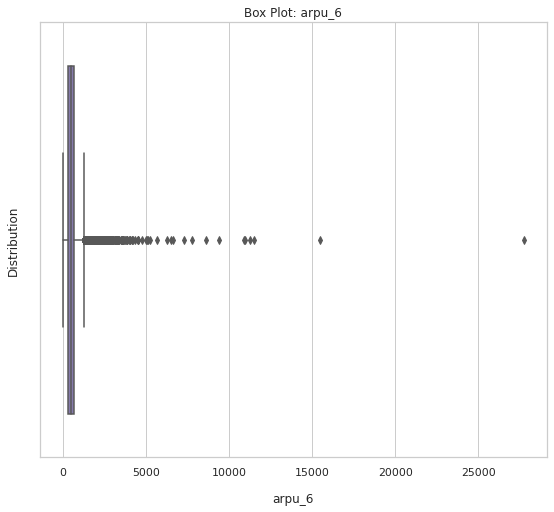

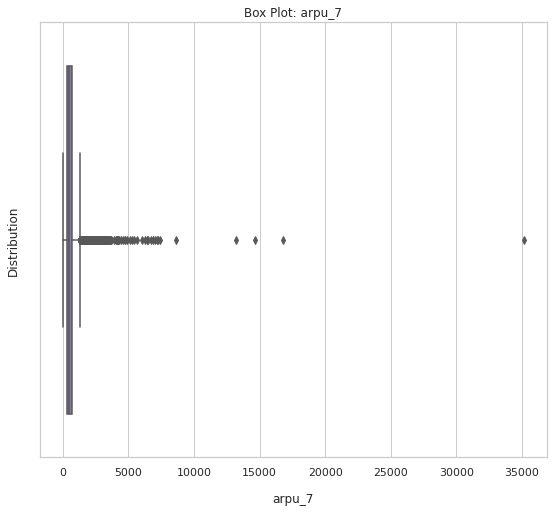

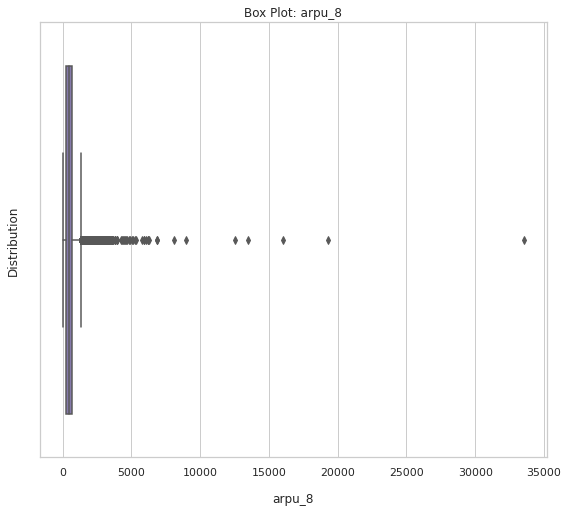

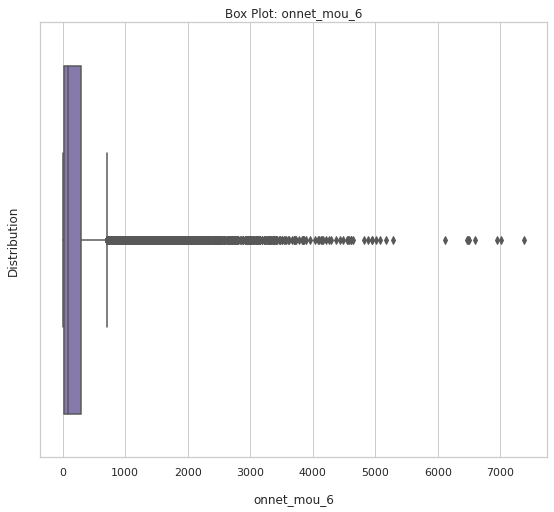

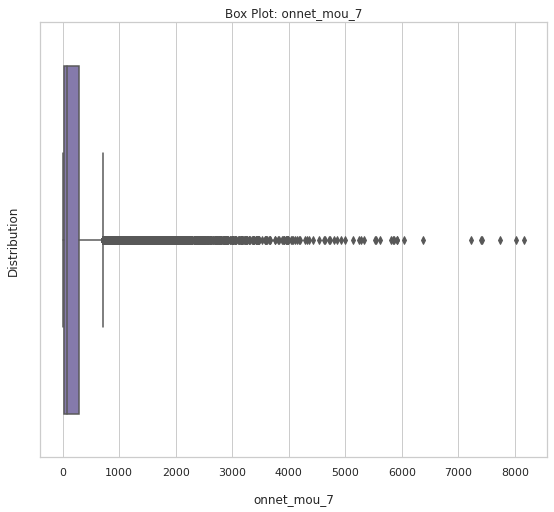

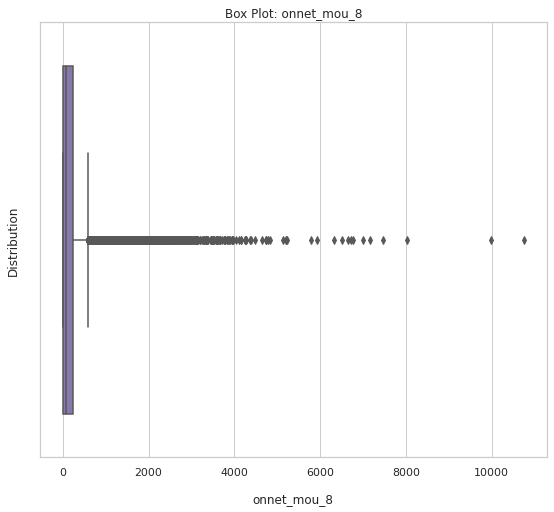

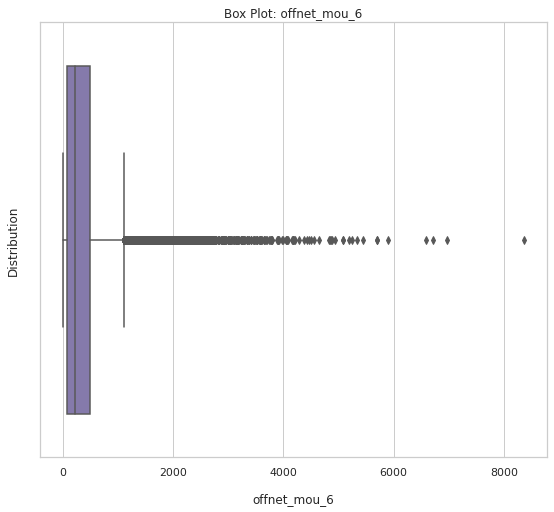

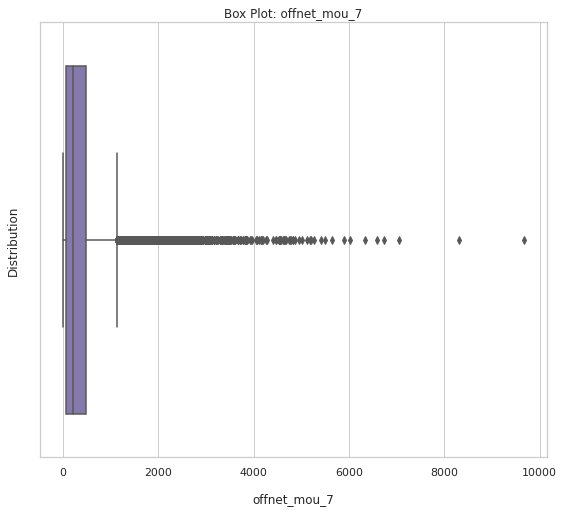

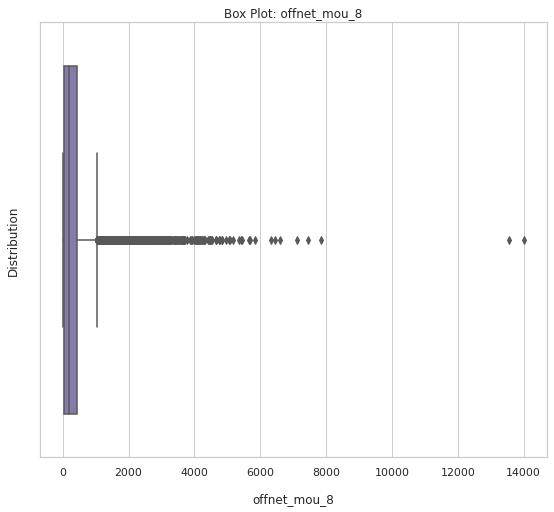

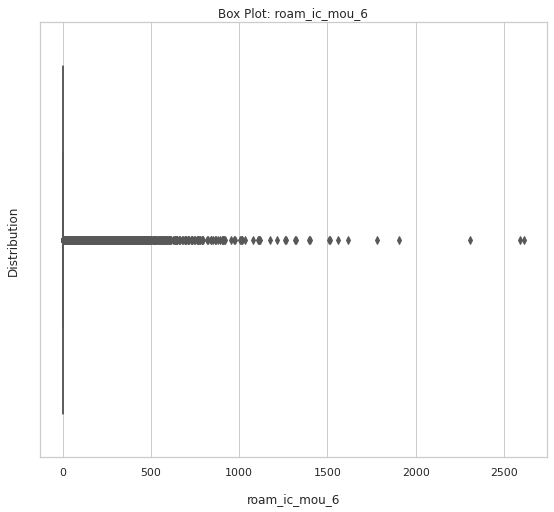

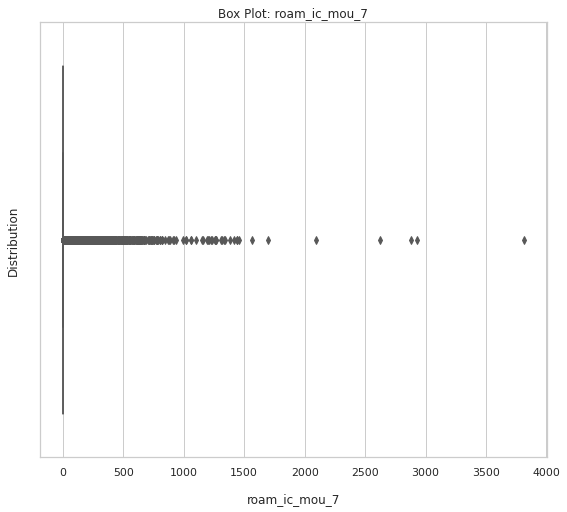

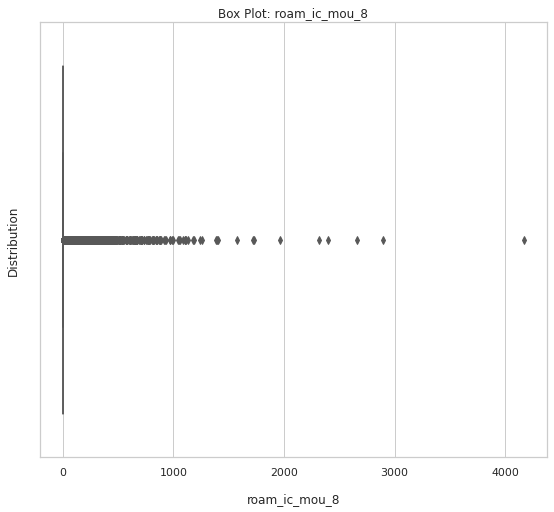

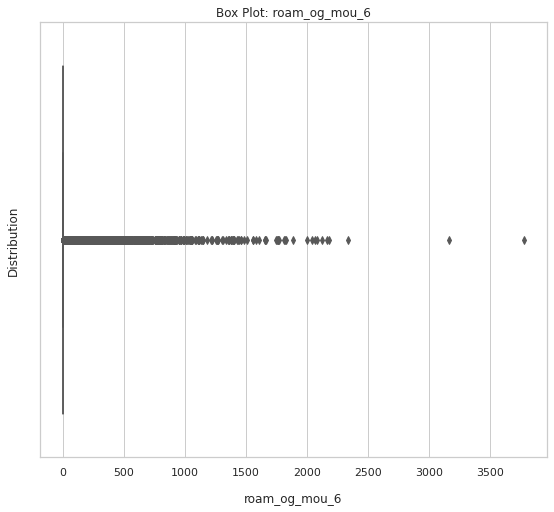

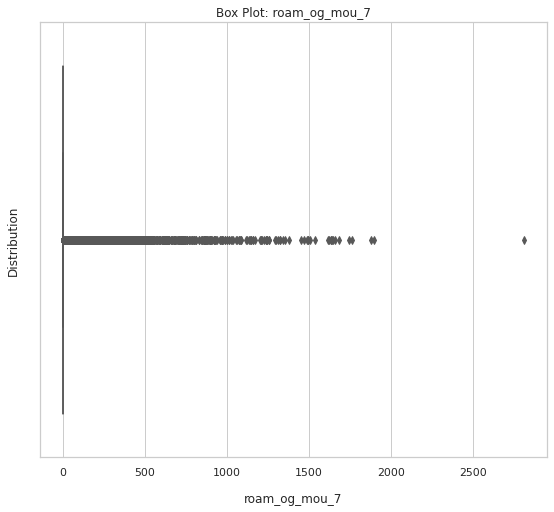

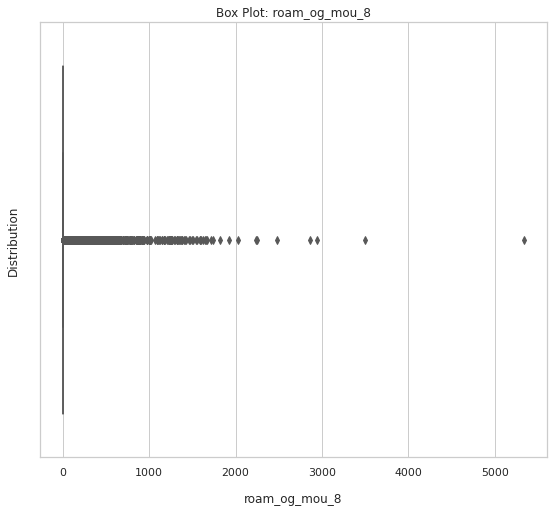

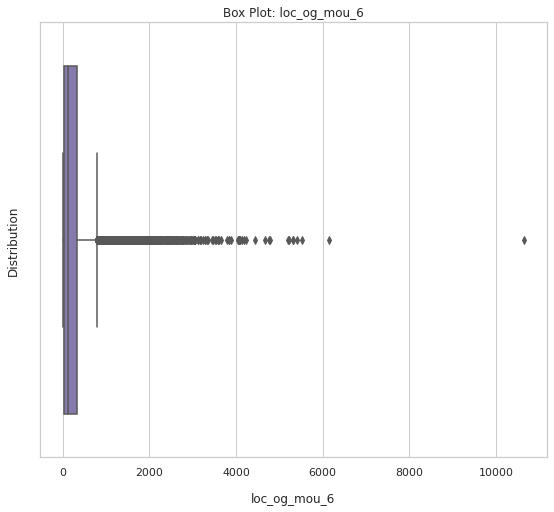

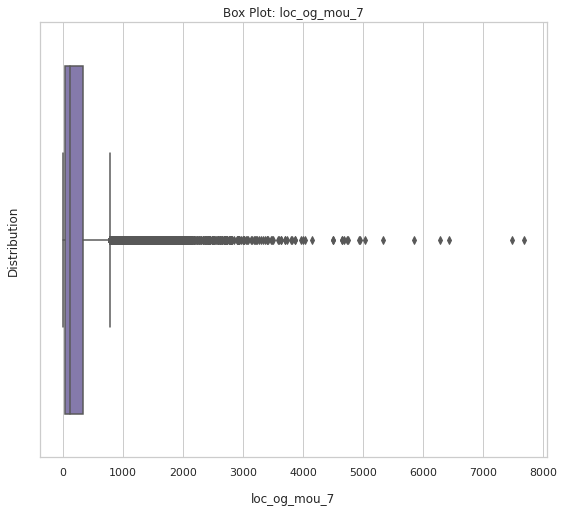

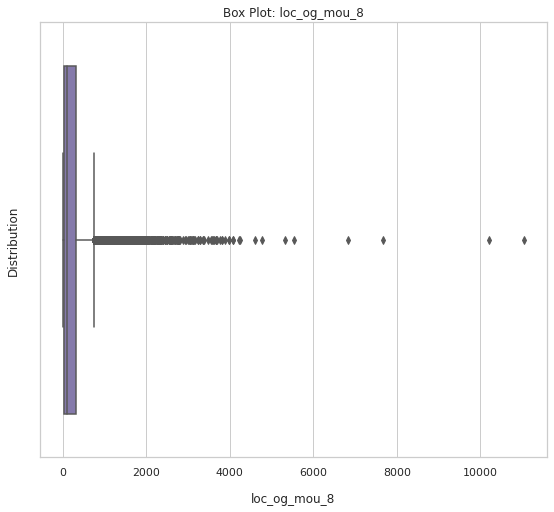

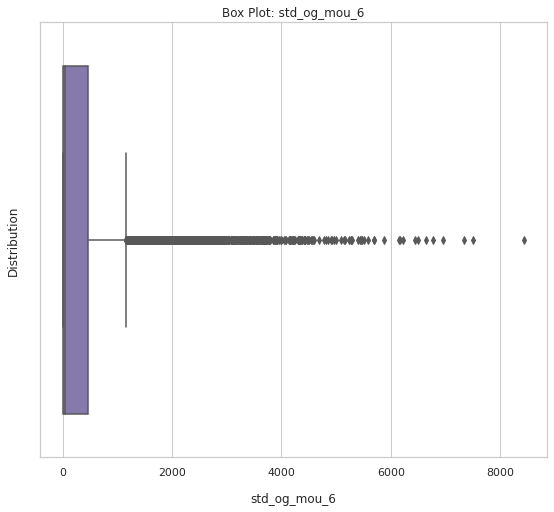

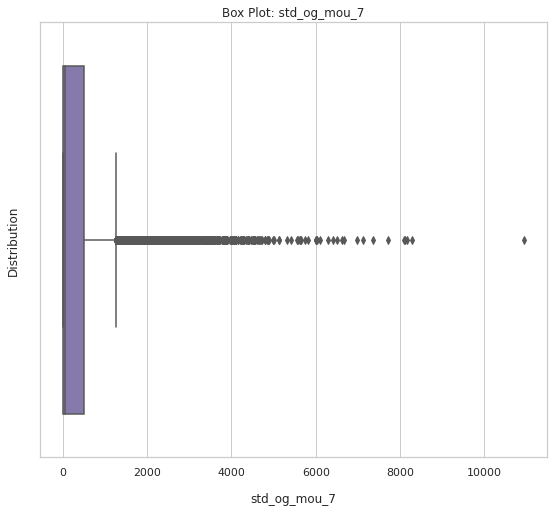

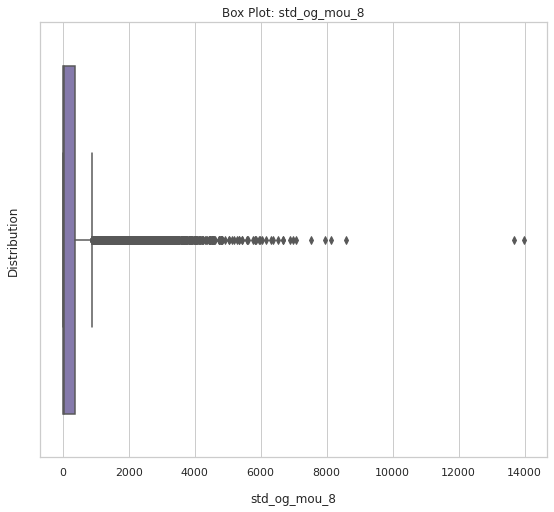

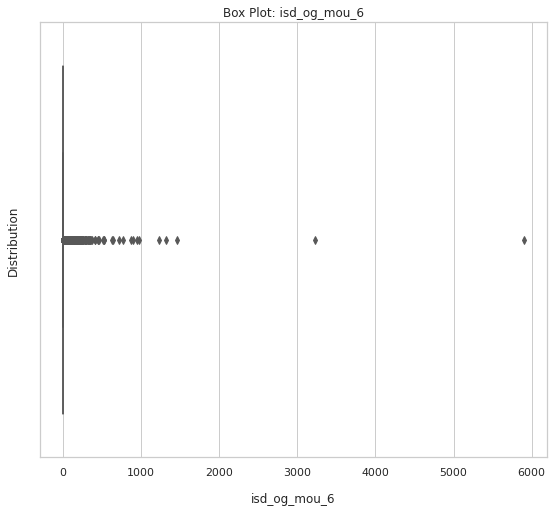

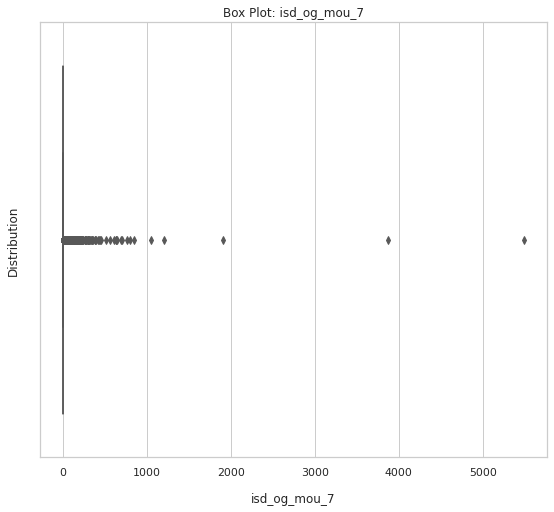

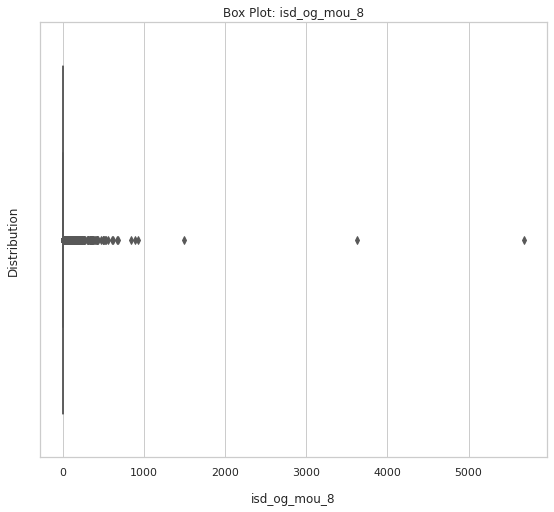

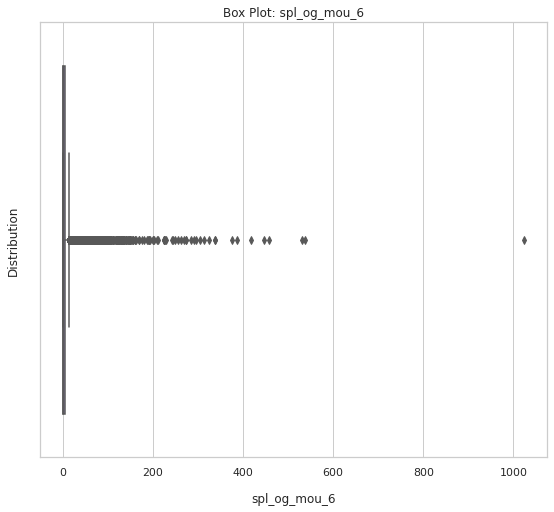

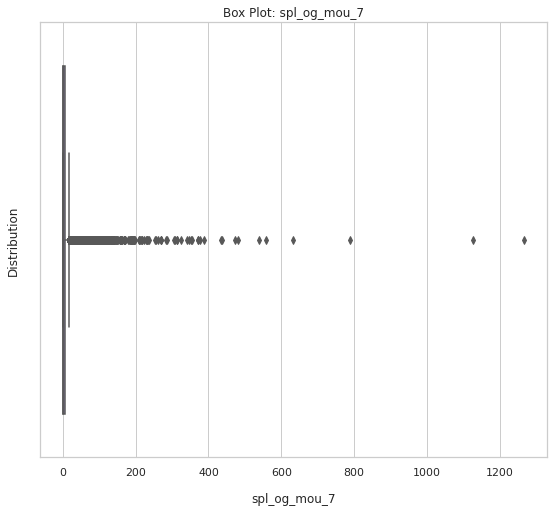

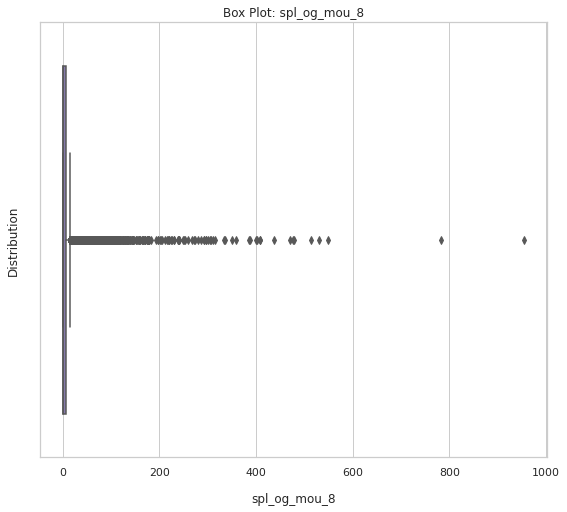

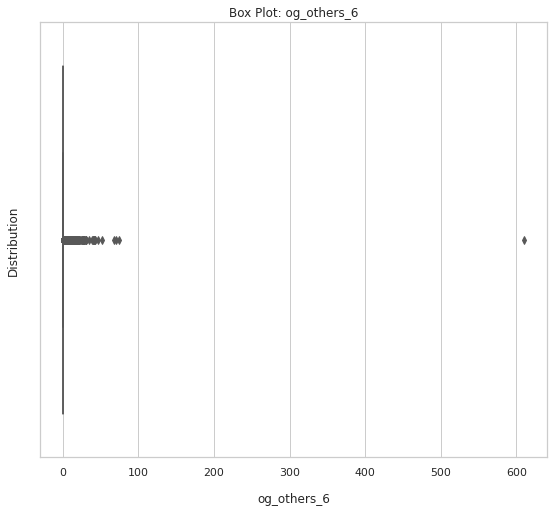

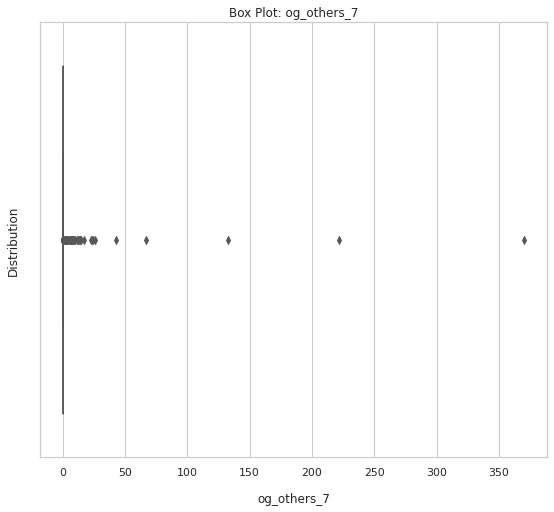

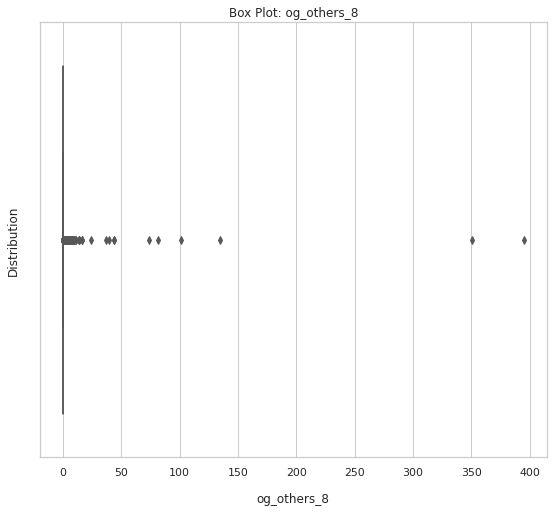

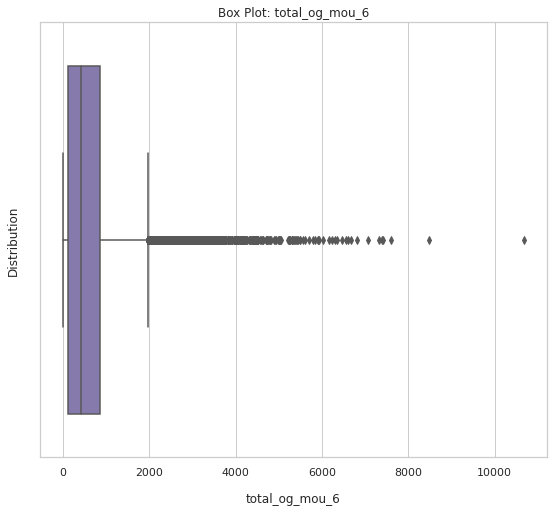

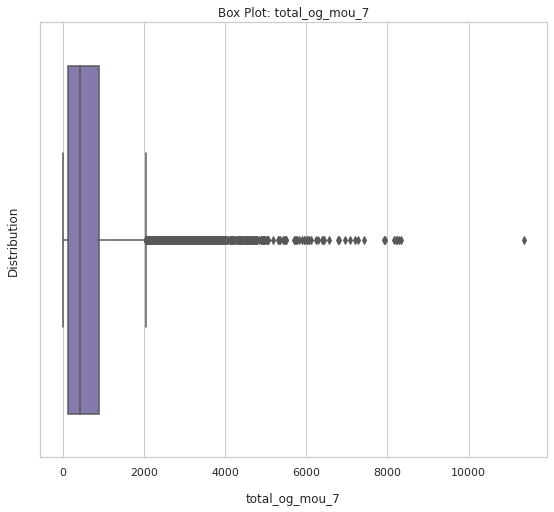

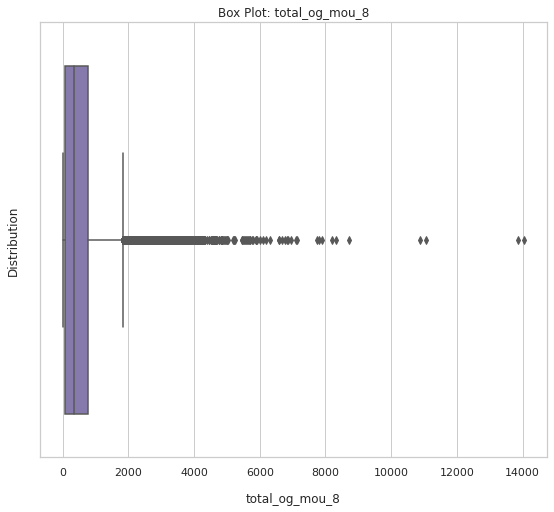

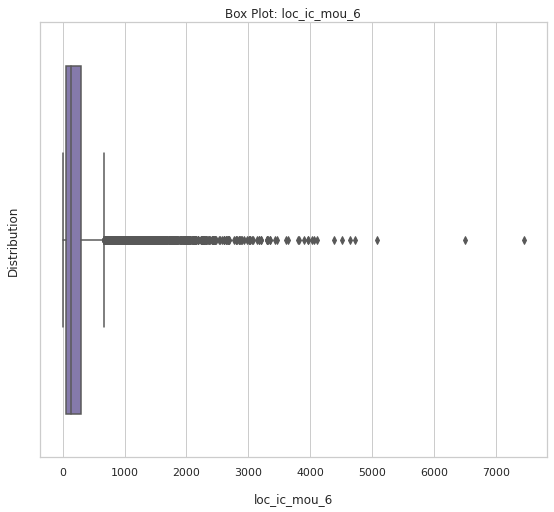

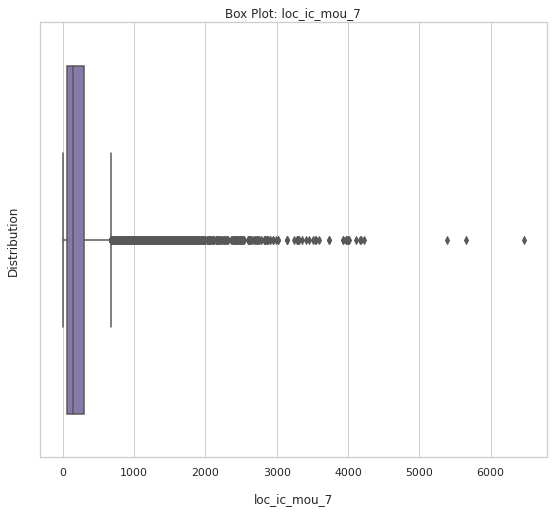

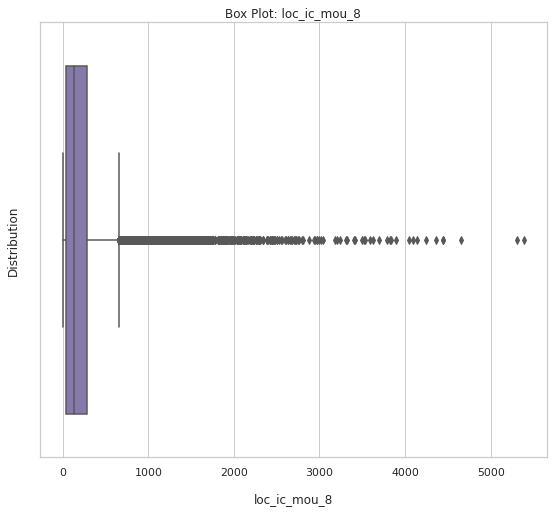

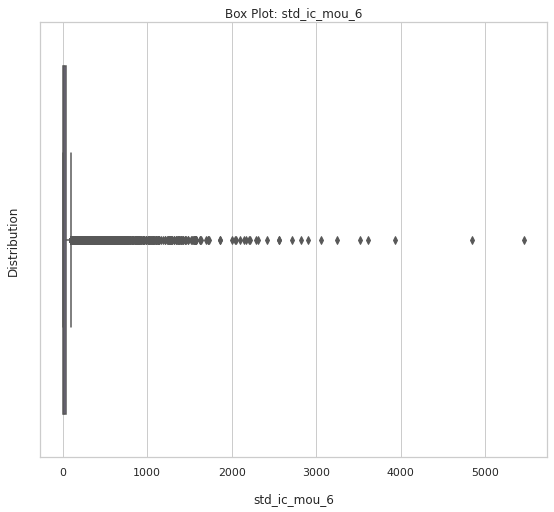

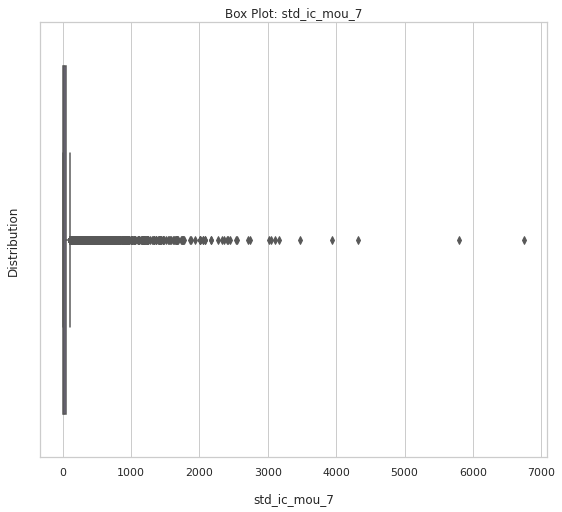

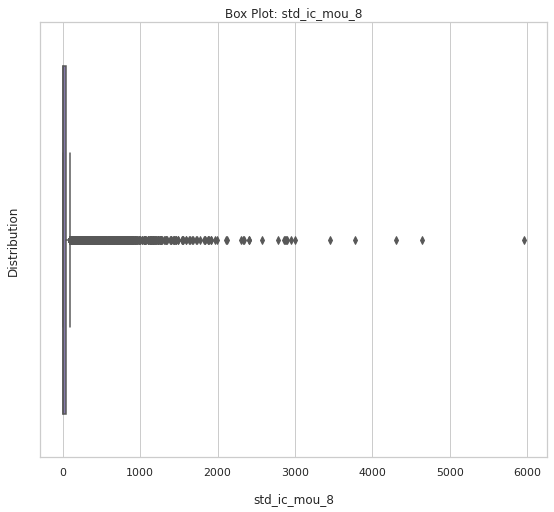

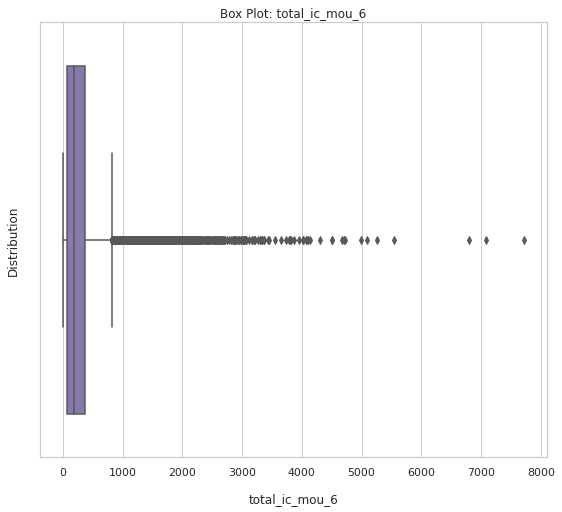

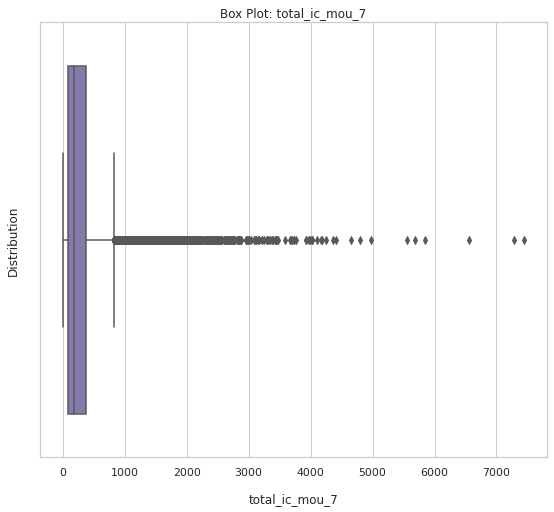

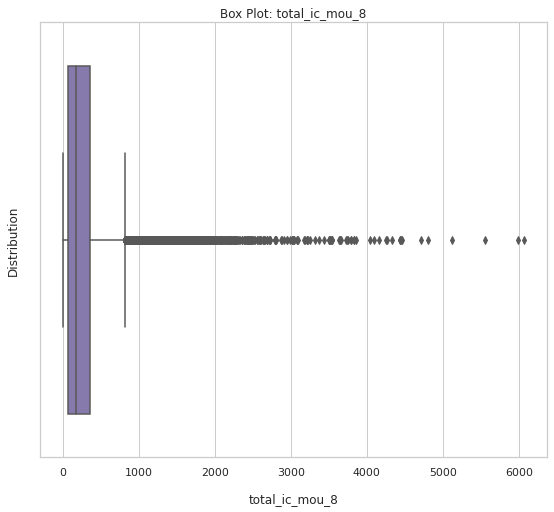

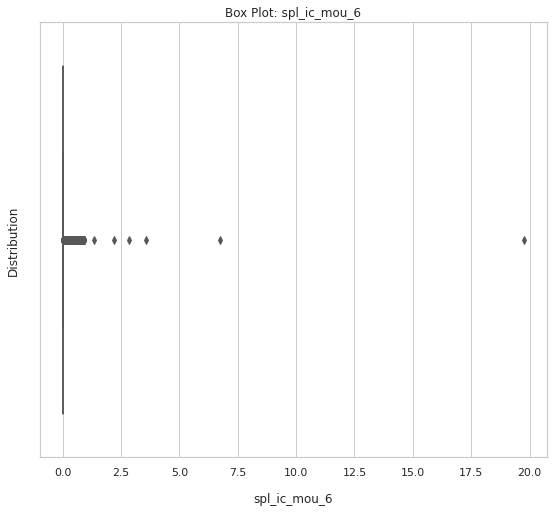

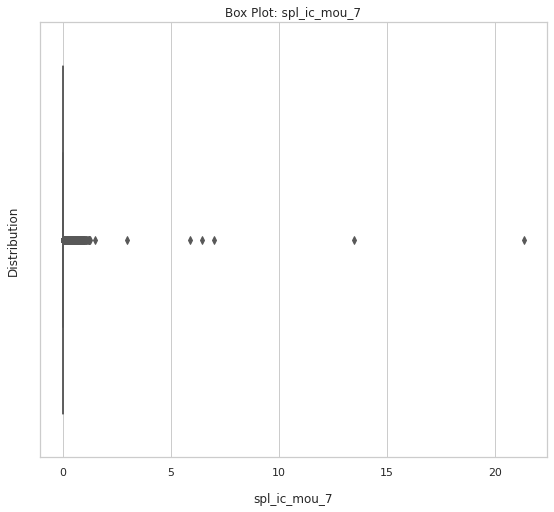

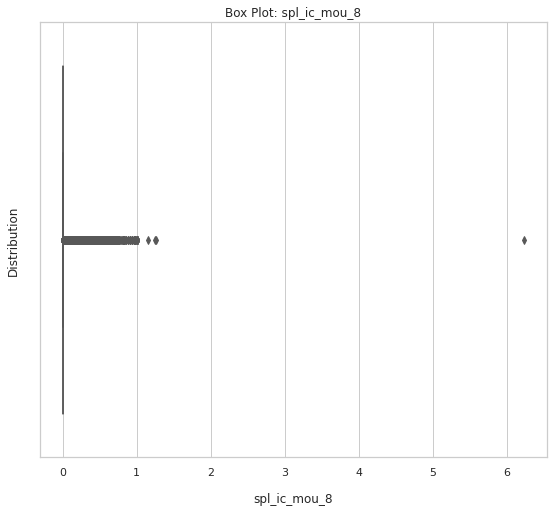

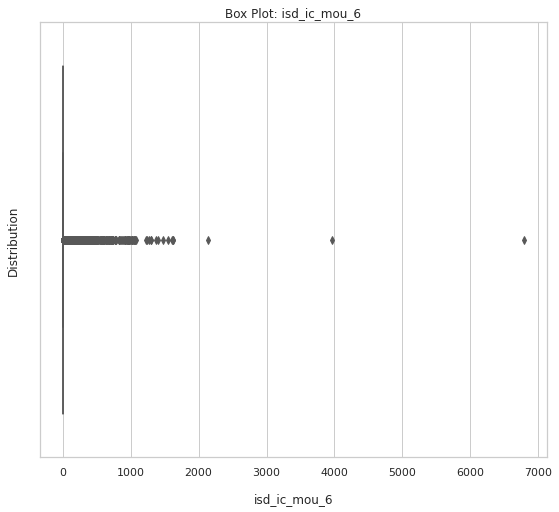

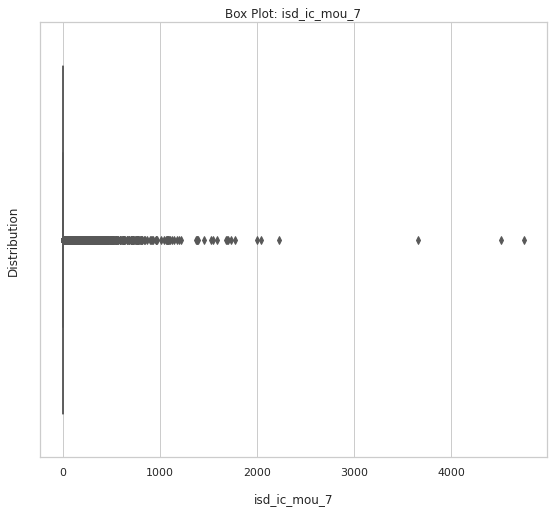

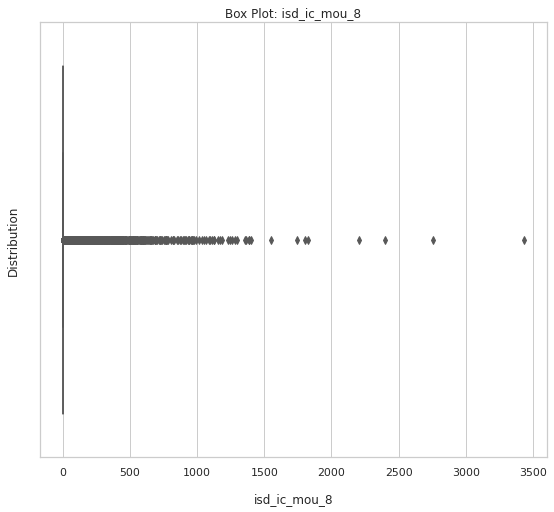

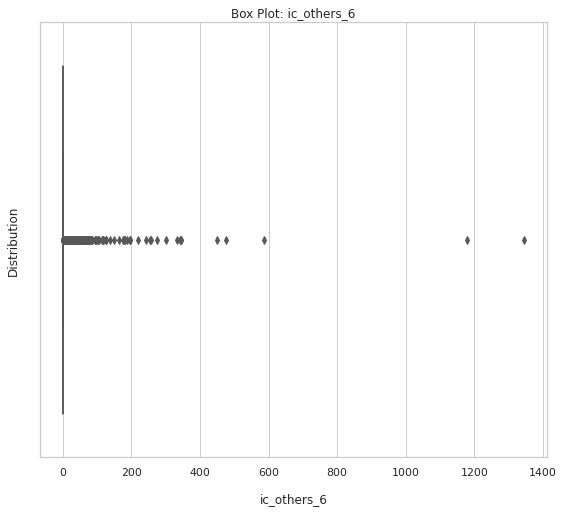

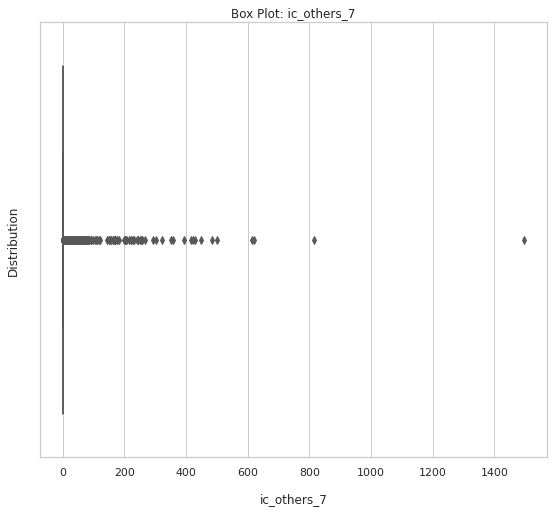

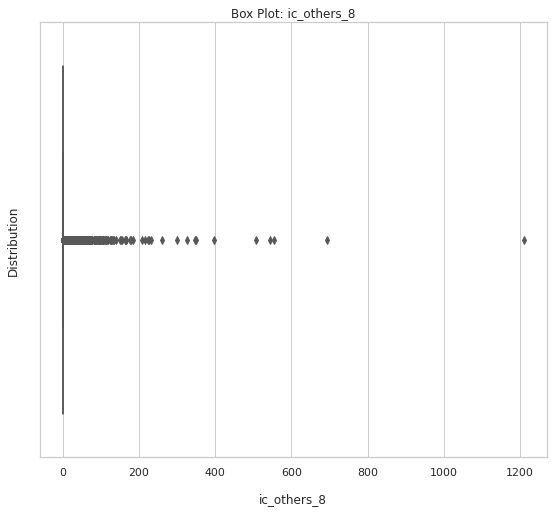

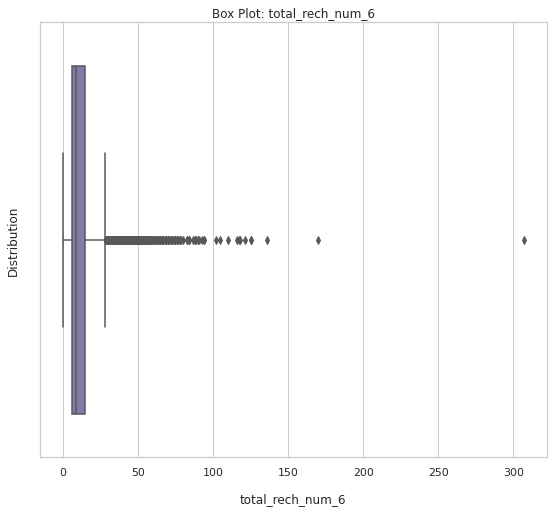

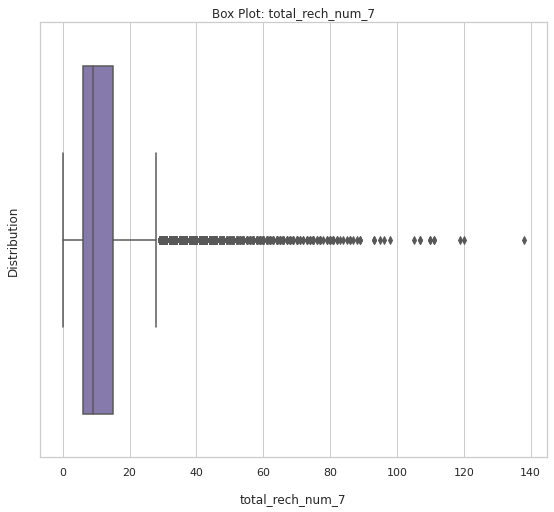

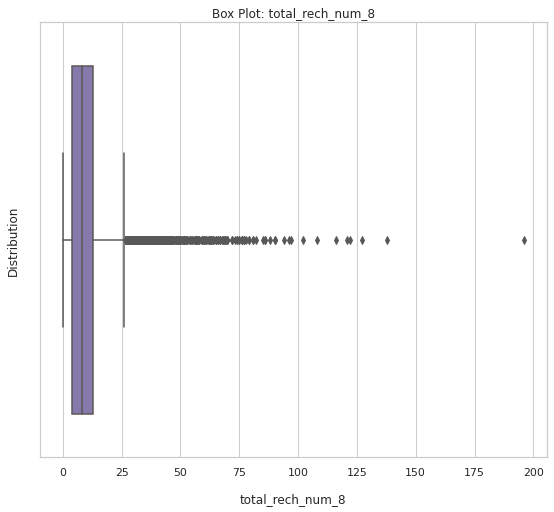

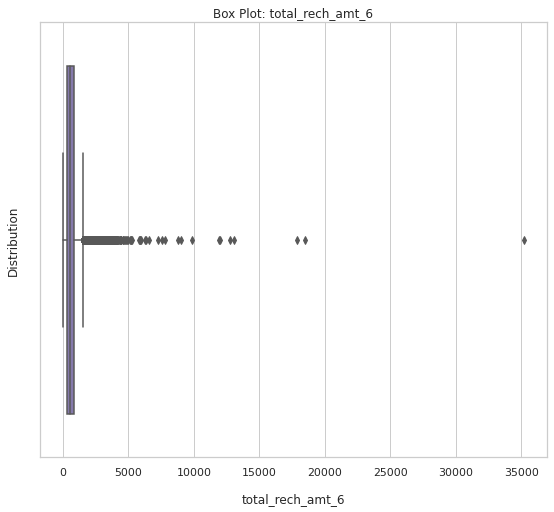

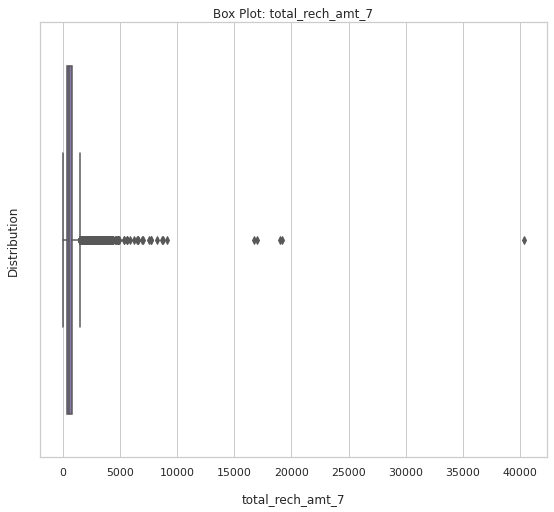

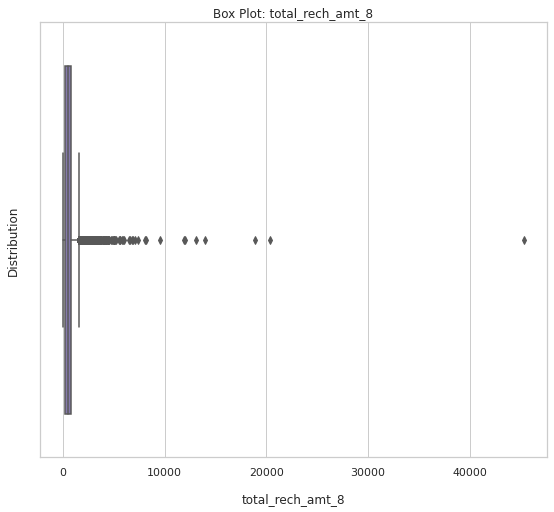

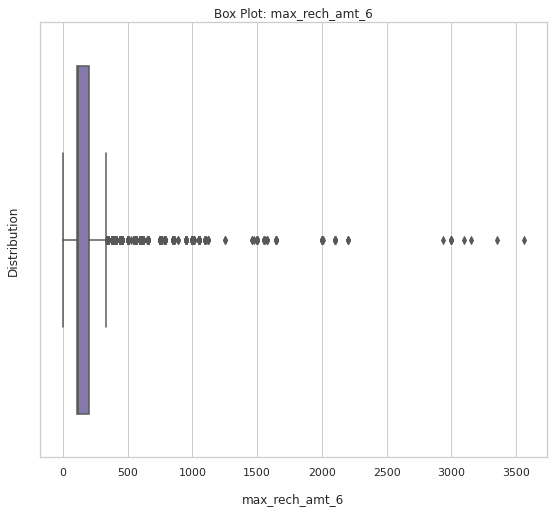

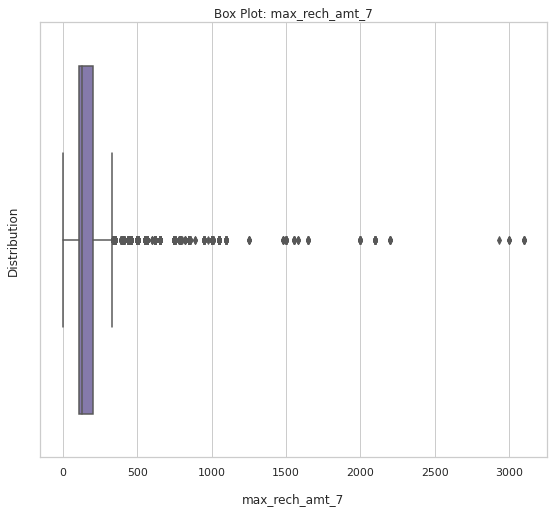

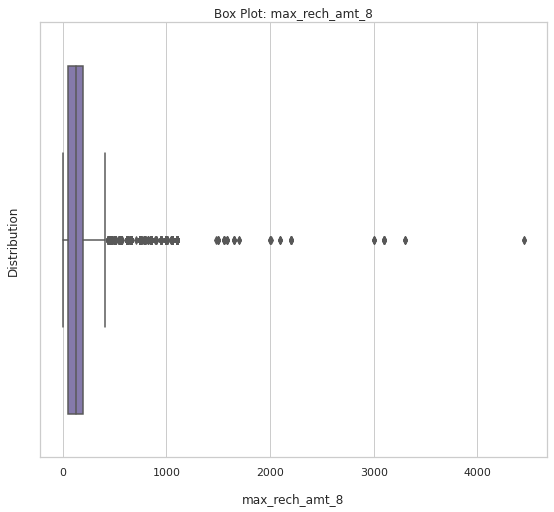

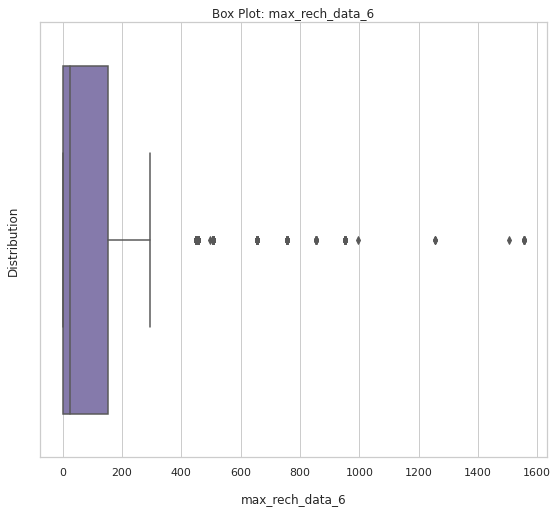

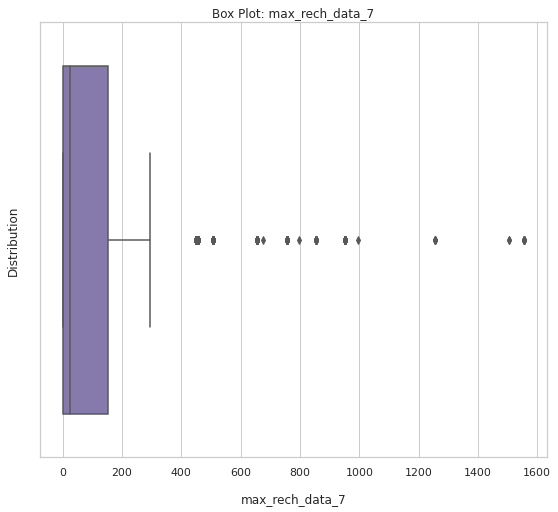

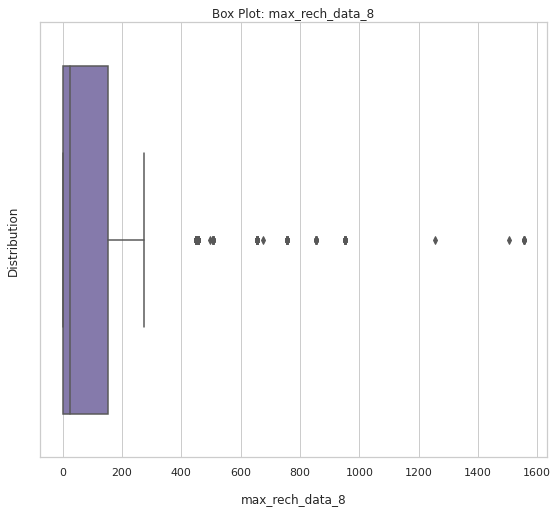

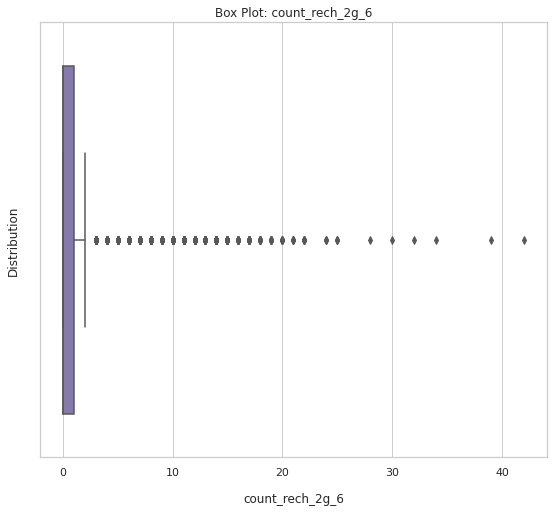

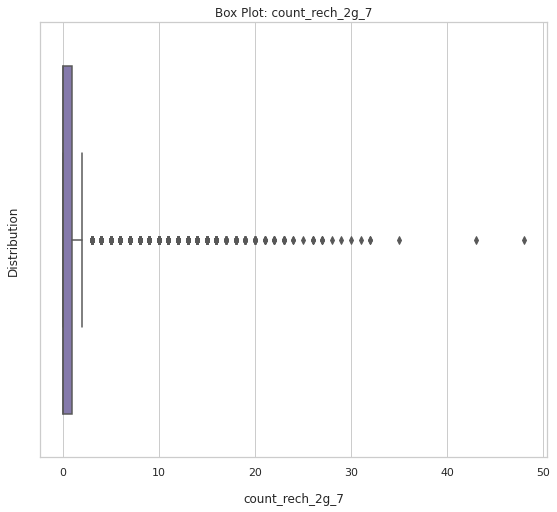

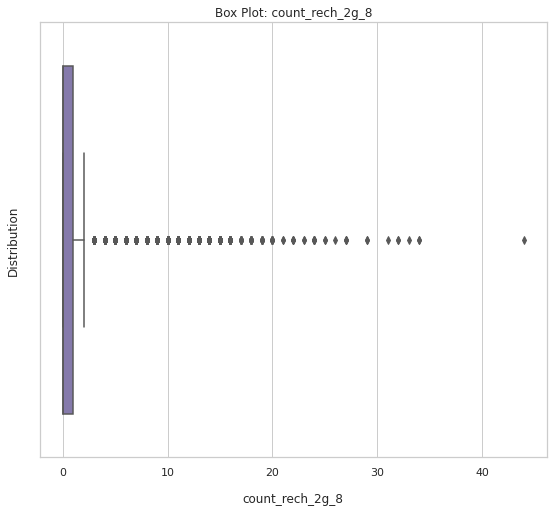

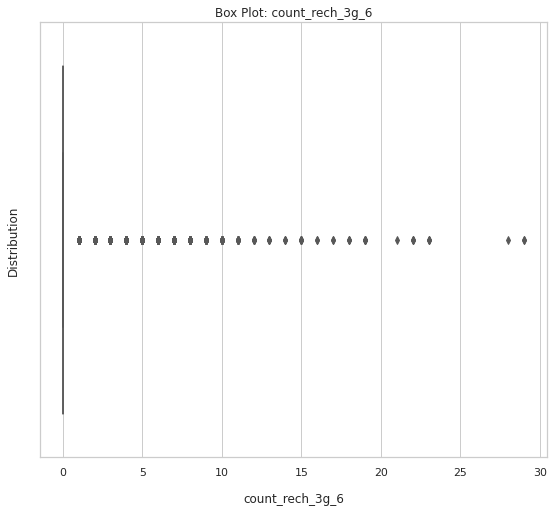

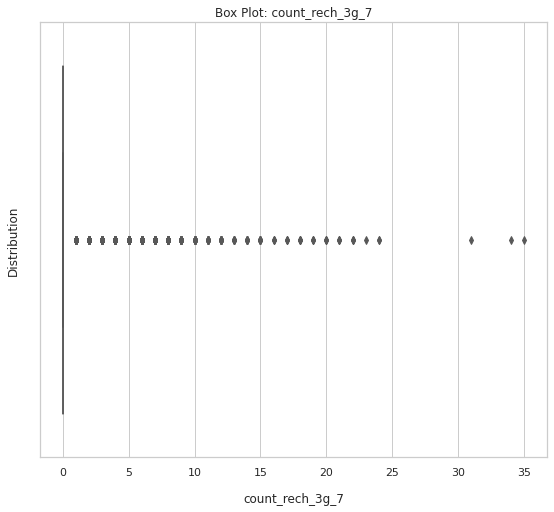

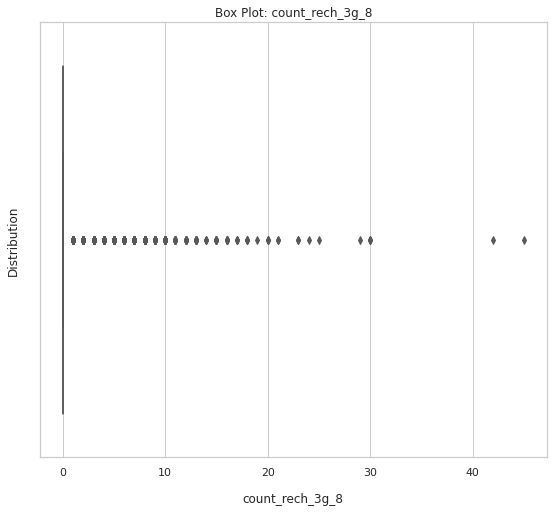

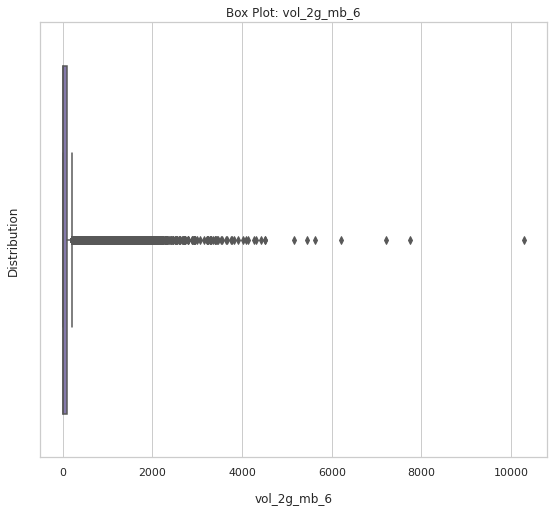

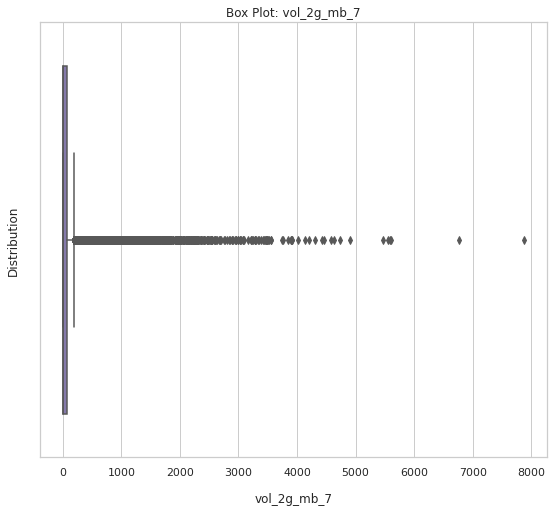

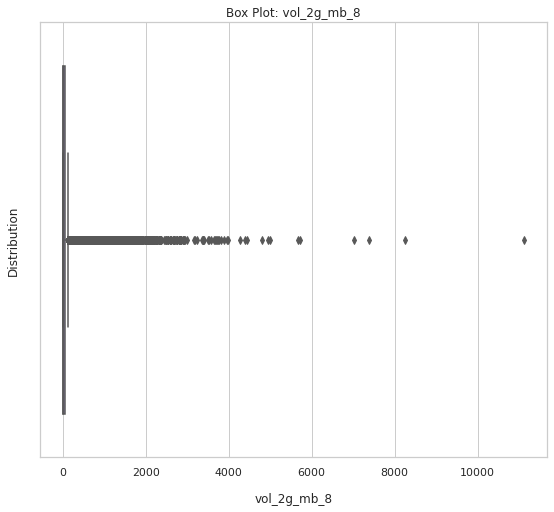

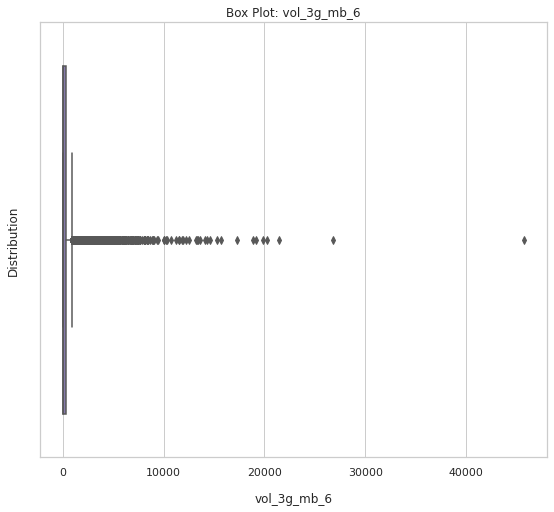

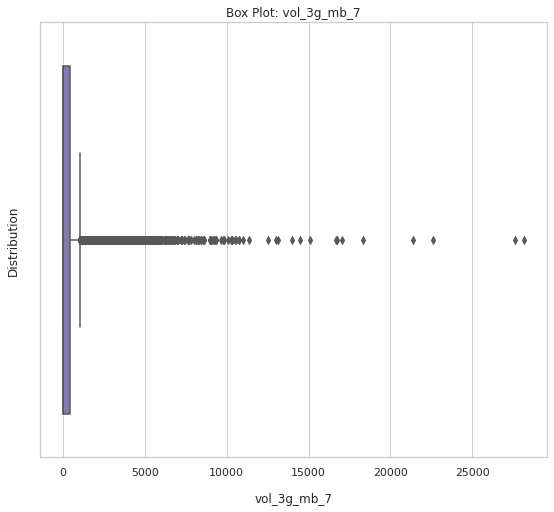

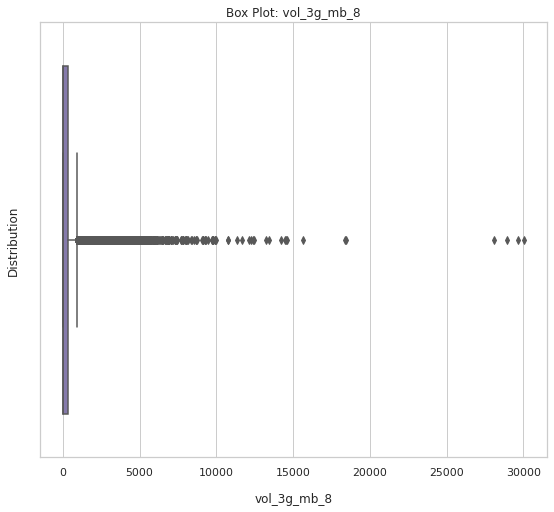

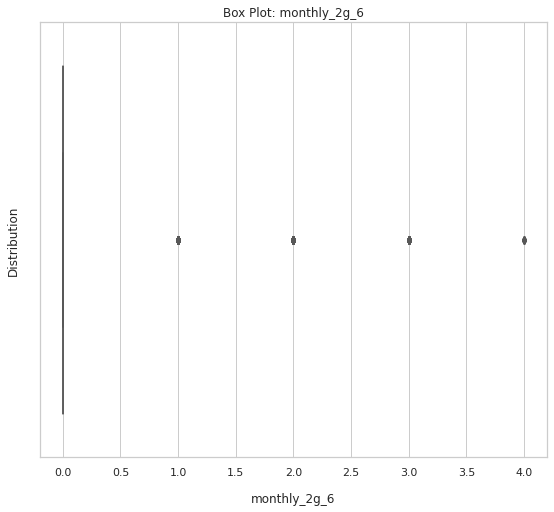

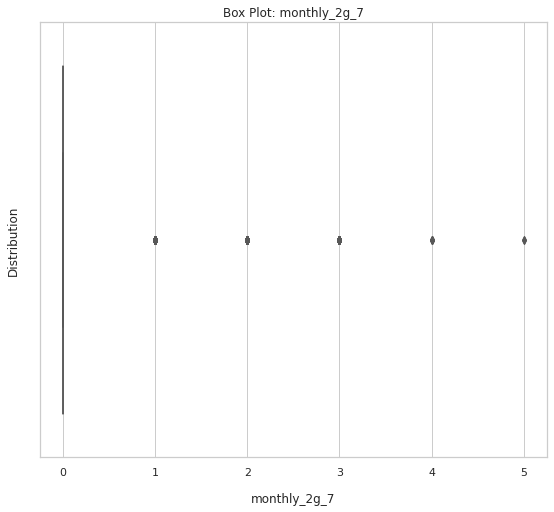

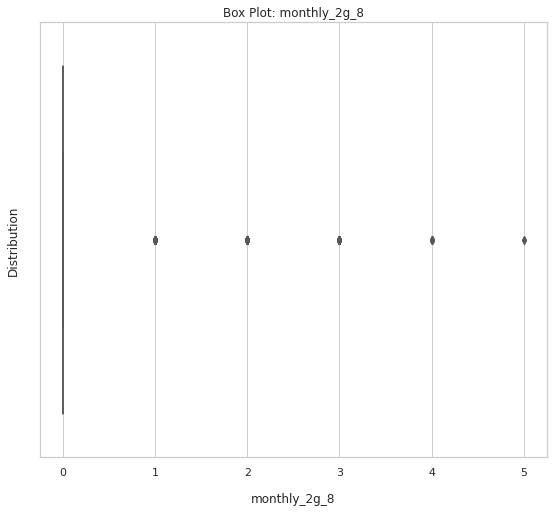

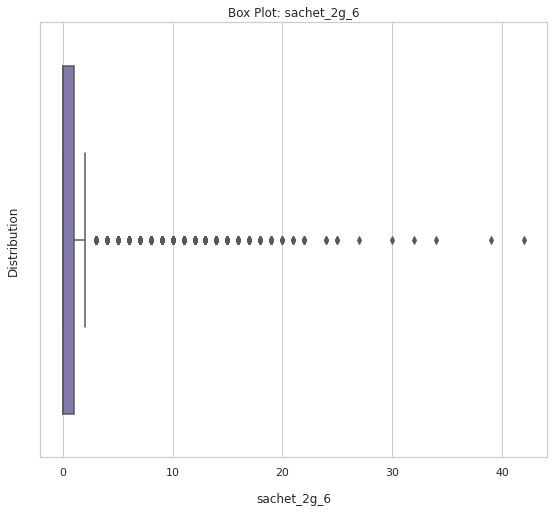

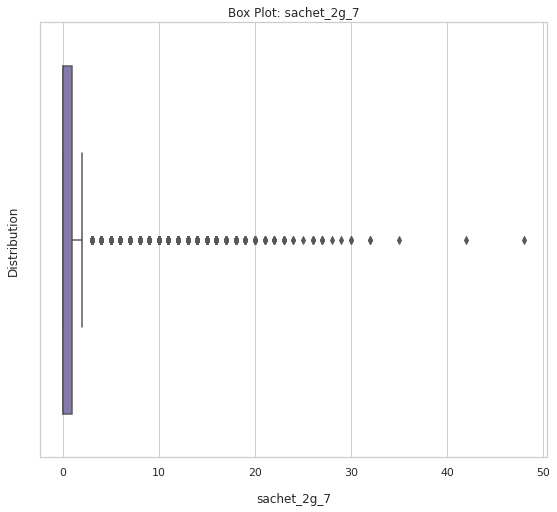

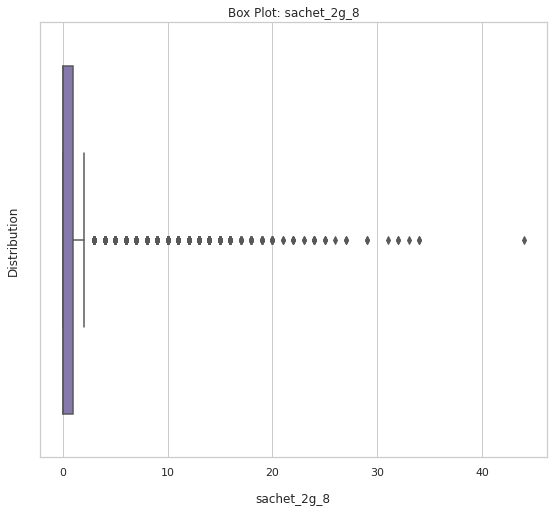

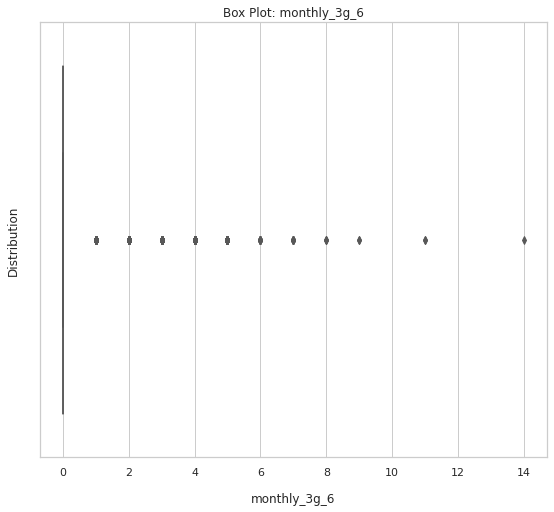

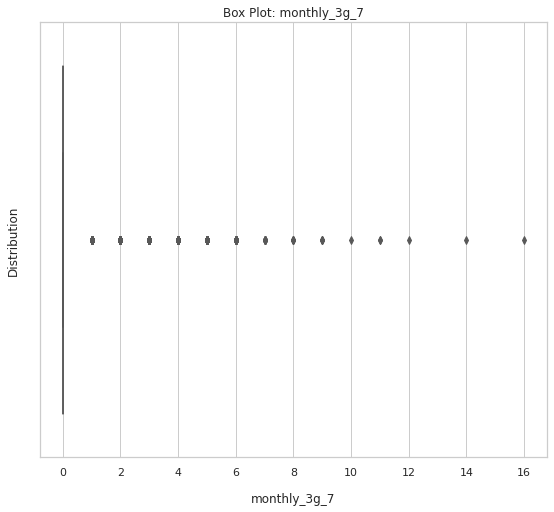

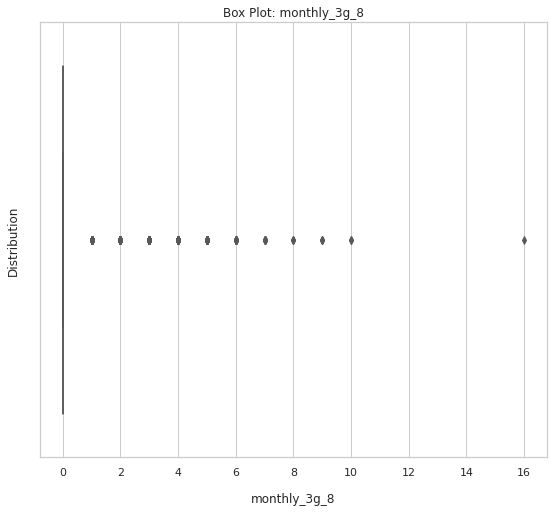

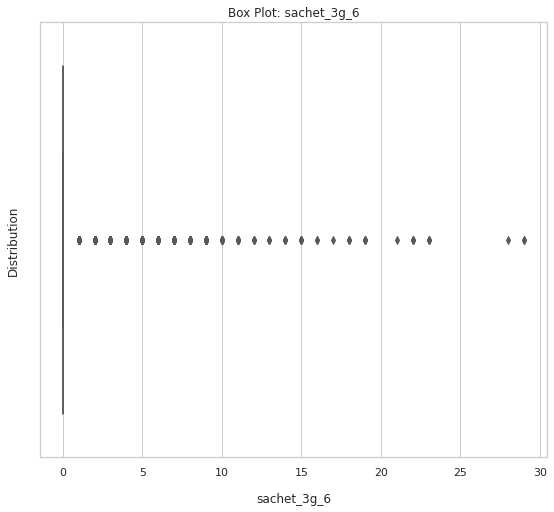

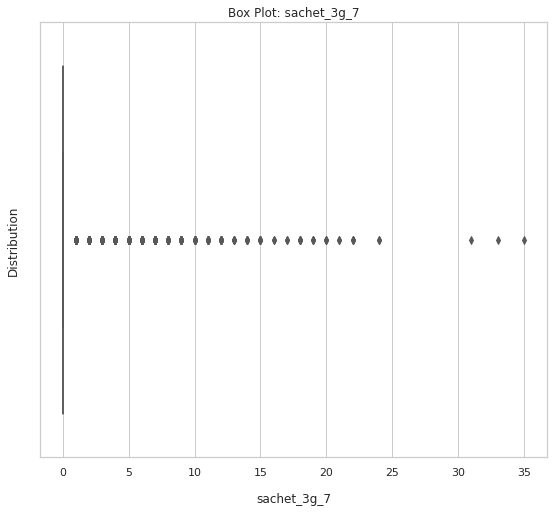

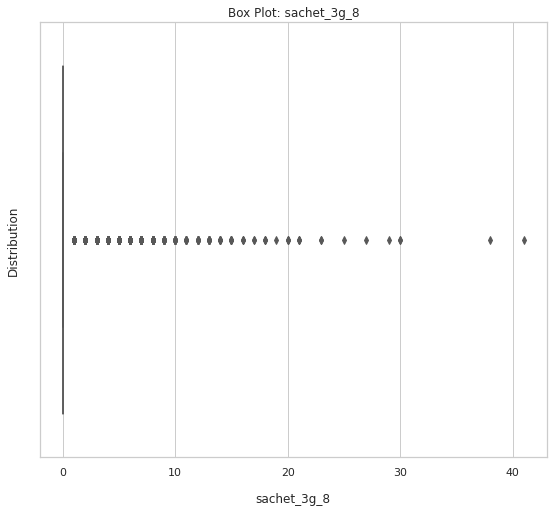

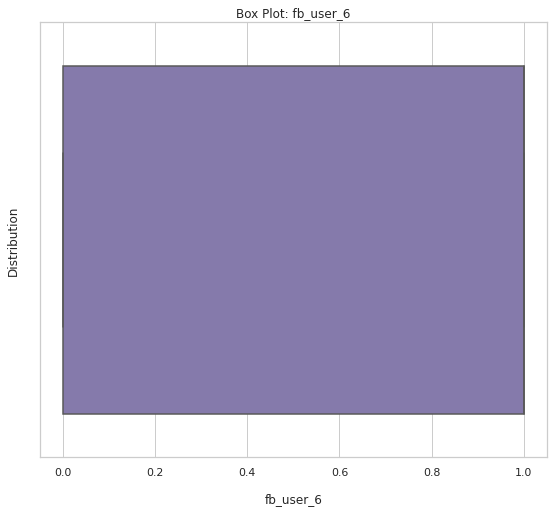

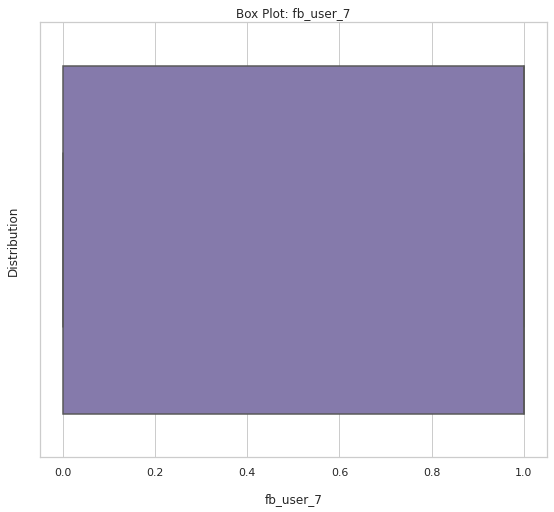

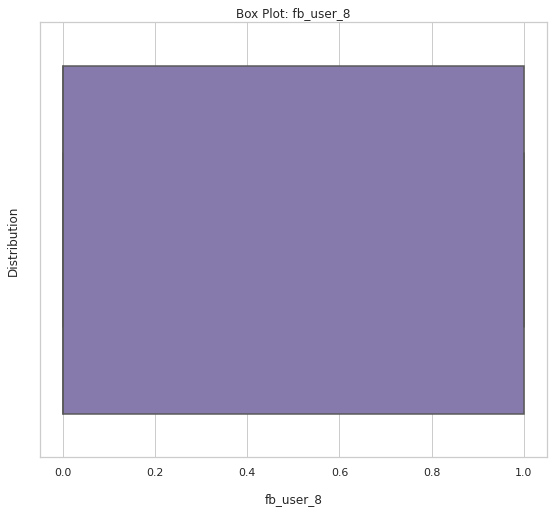

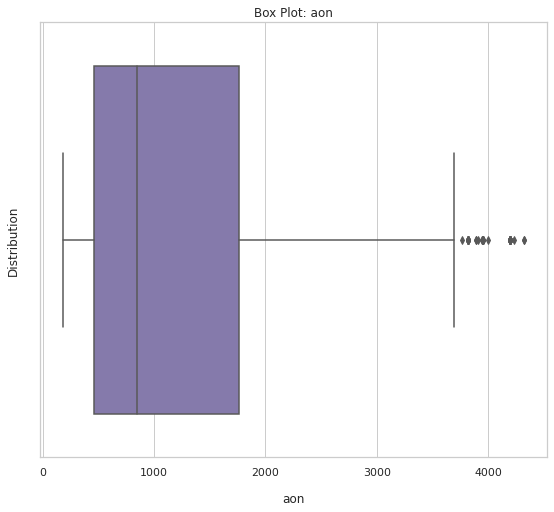

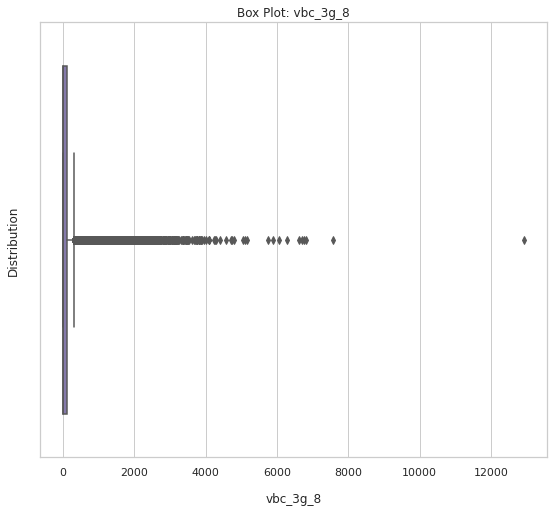

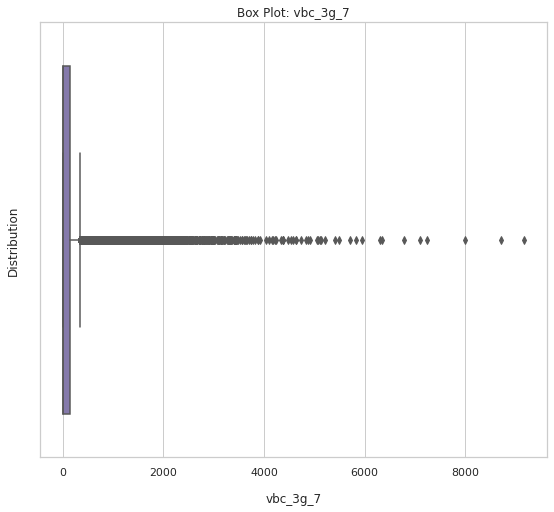

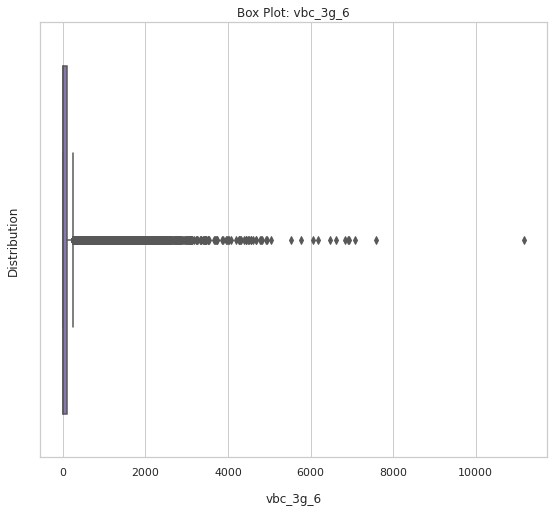

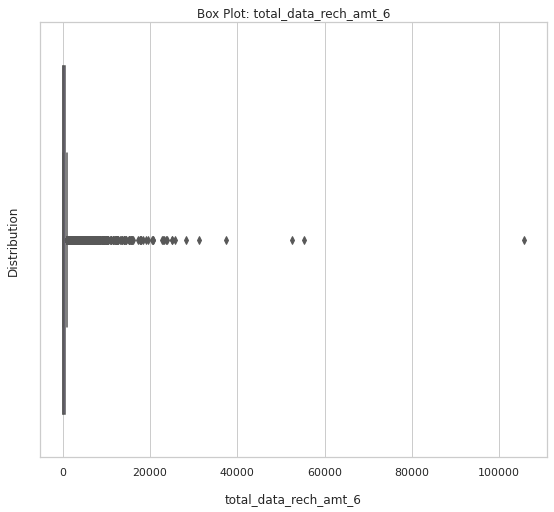

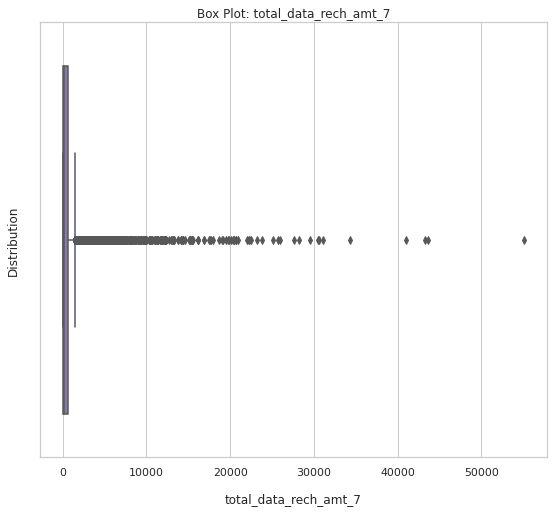

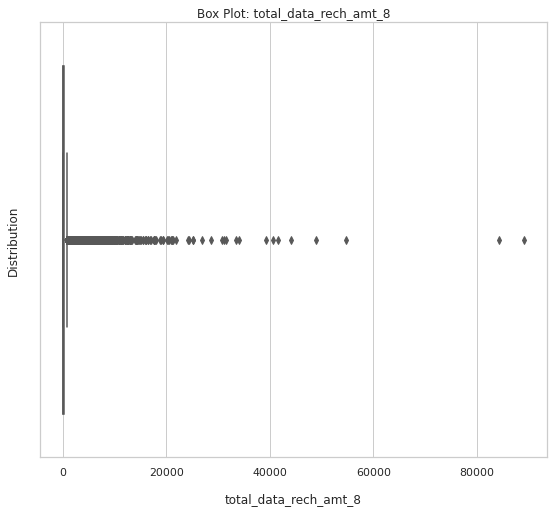

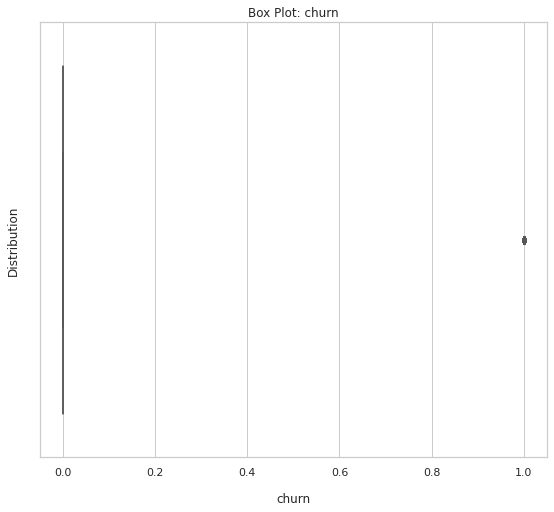

In [57]:
# plot box plots for univariate analysis 
for col_list in telecomdata.columns:
    univariate_plot(xlabel = col_list,ylabel = "Distribution",x_axis = col_list,data = telecomdata,wspace = 0.2)


outlier in every column - we shall apply standardization to remove them 

#### Bivariate analysis 

In [58]:
#### function to boxplots for bivariate analysis  
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)
    plt.subplot(1, 3, 1)
    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecomdata, showfliers = False)
    plt.subplot(1, 3, 2)
    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecomdata, showfliers = False)
    plt.subplot(1, 3, 3)
    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecomdata, showfliers = False)   
    plt.subplots_adjust(wspace = 0.4)
    plt.show()


Data Visualization of churn vs arpu


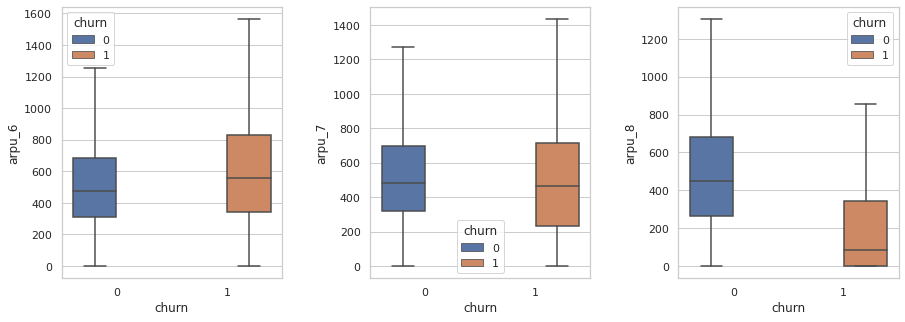


Data Visualization of churn vs onnet_mou


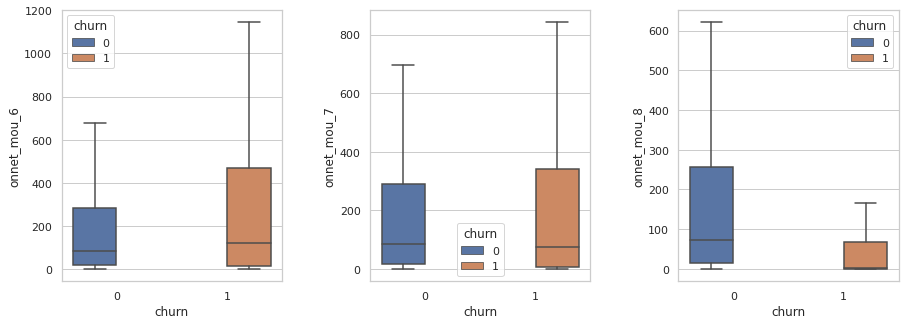


Data Visualization of churn vs offnet_mou


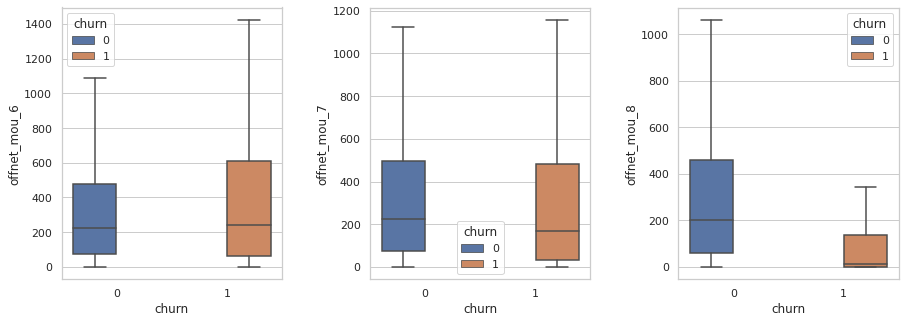


Data Visualization of churn vs roam_ic_mou


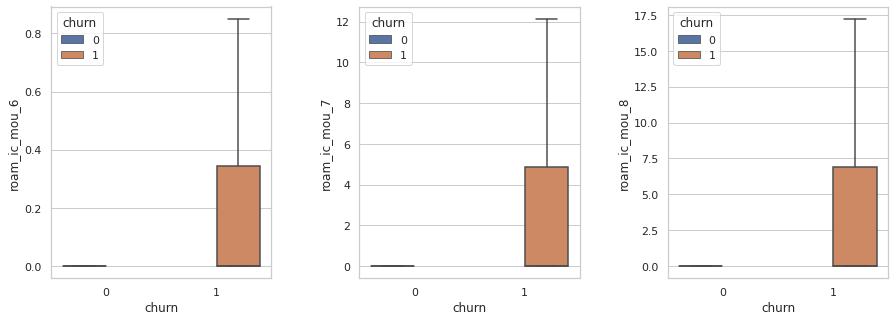


Data Visualization of churn vs roam_og_mou


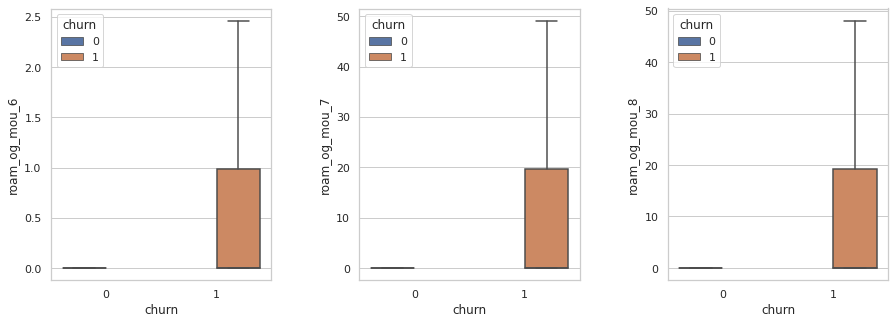


Data Visualization of churn vs loc_og_mou


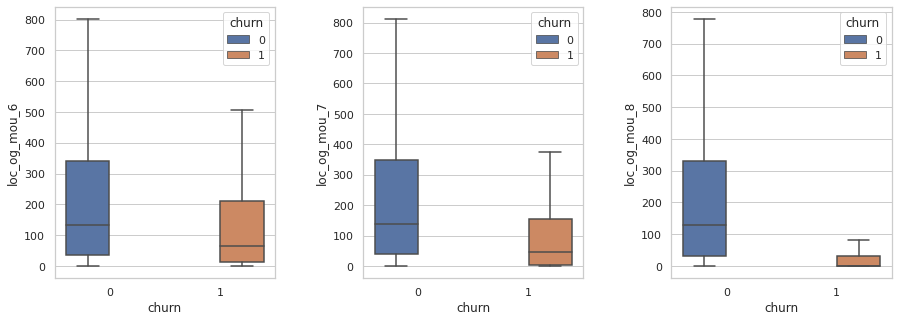


Data Visualization of churn vs std_og_mou


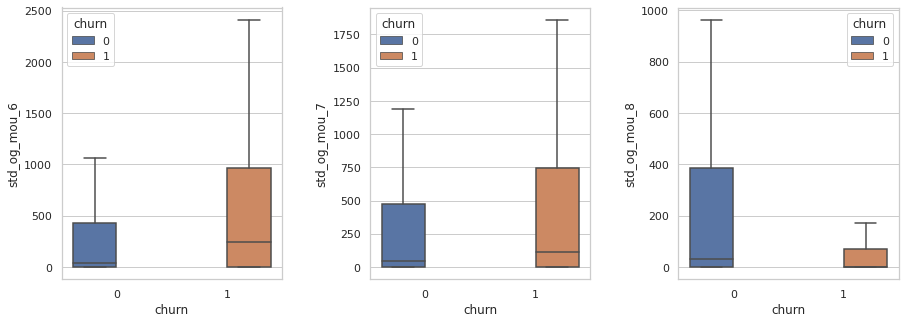


Data Visualization of churn vs isd_og_mou


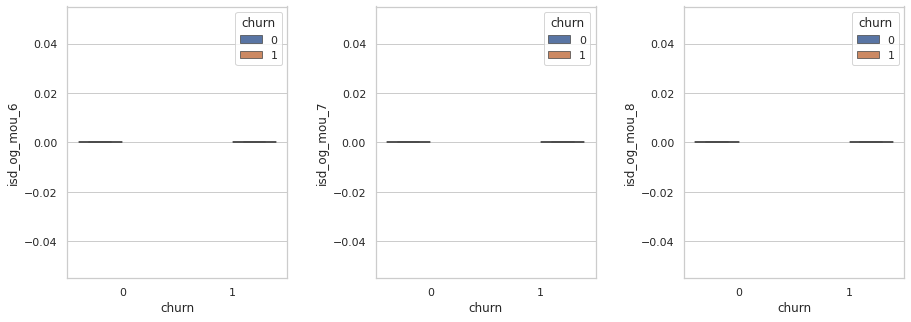


Data Visualization of churn vs spl_og_mou


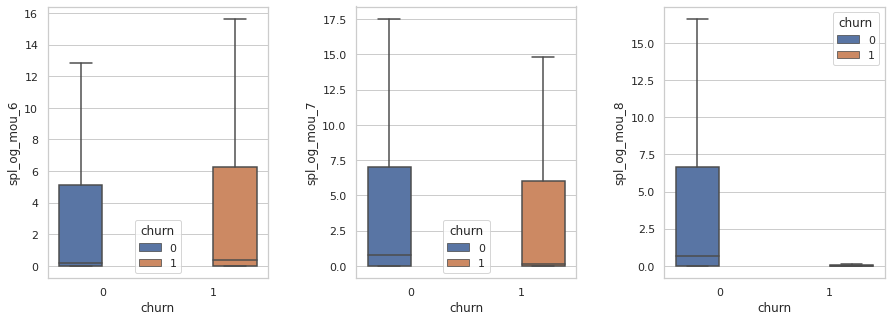


Data Visualization of churn vs og_others


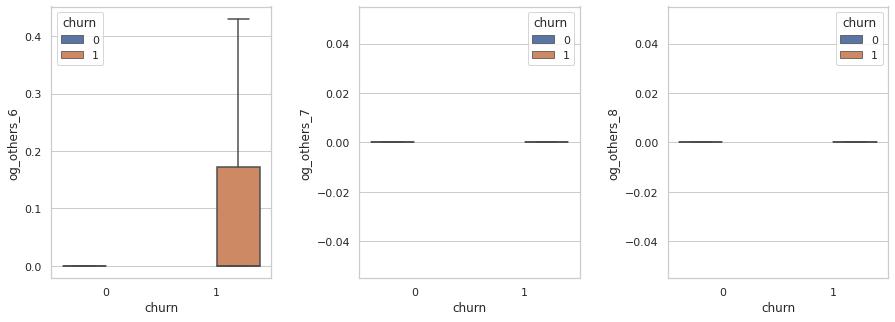


Data Visualization of churn vs total_og_mou


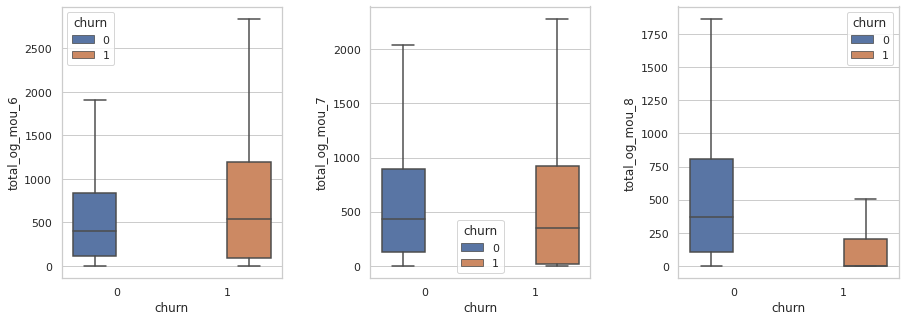


Data Visualization of churn vs loc_ic_mou


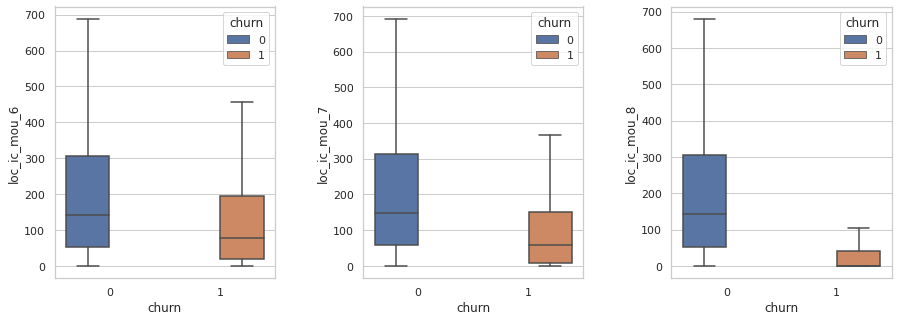


Data Visualization of churn vs std_ic_mou


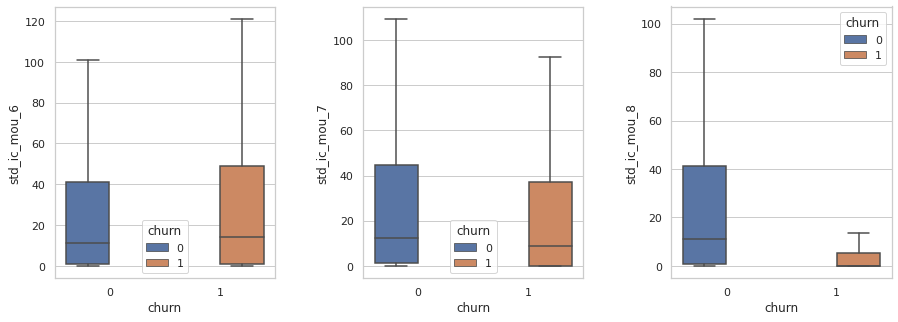


Data Visualization of churn vs total_ic_mou


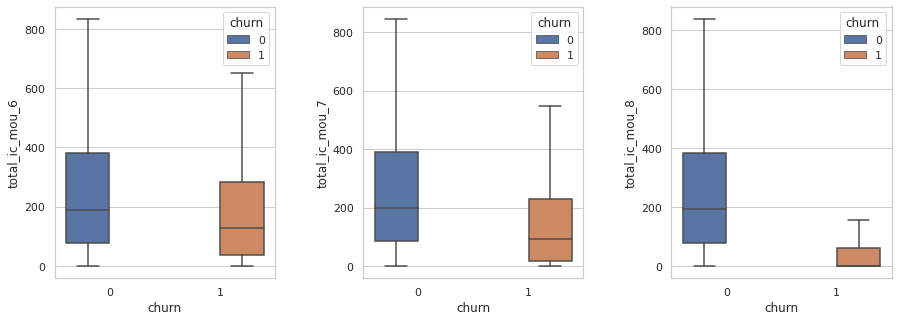


Data Visualization of churn vs spl_ic_mou


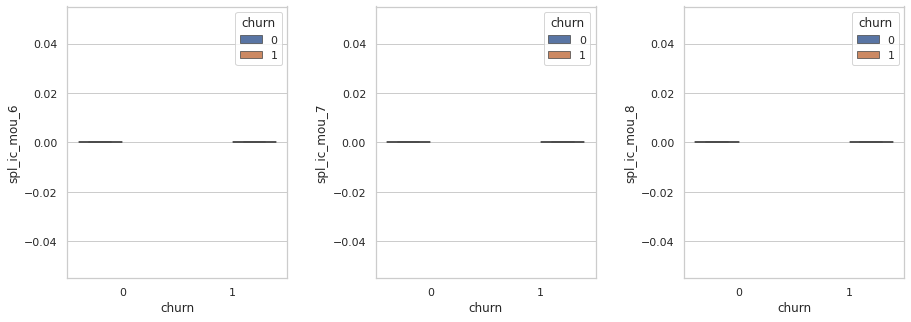


Data Visualization of churn vs isd_ic_mou


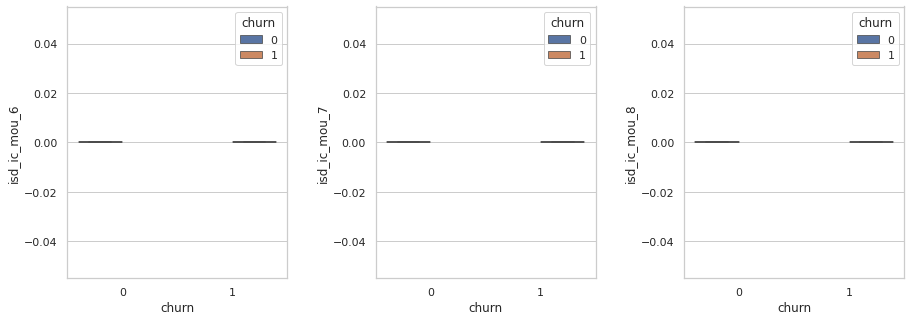


Data Visualization of churn vs ic_others


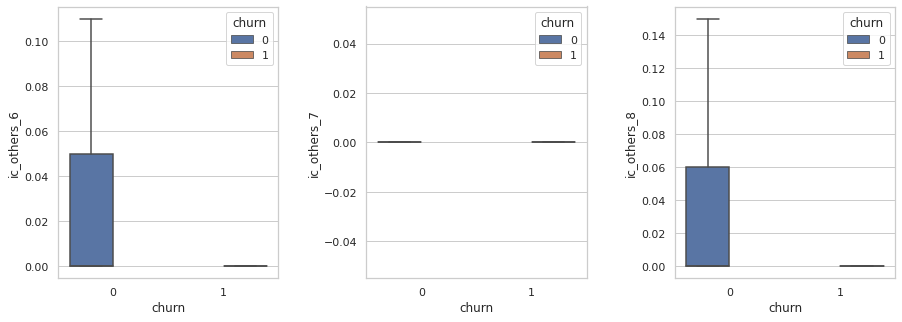


Data Visualization of churn vs total_rech_num


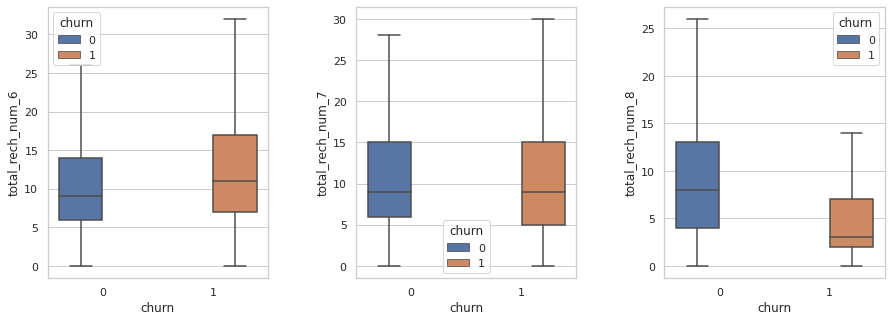


Data Visualization of churn vs total_rech_amt


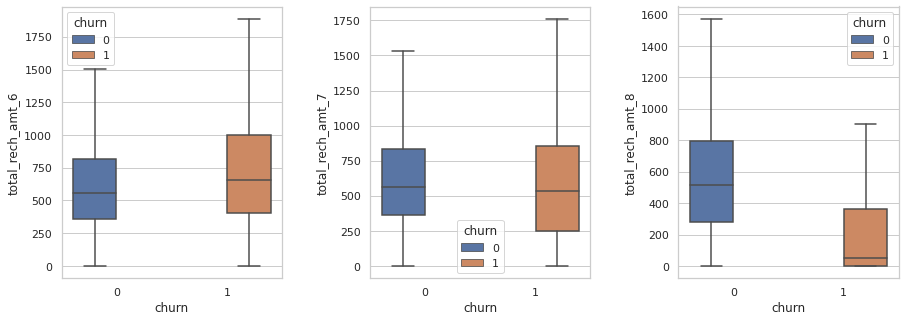


Data Visualization of churn vs max_rech_amt


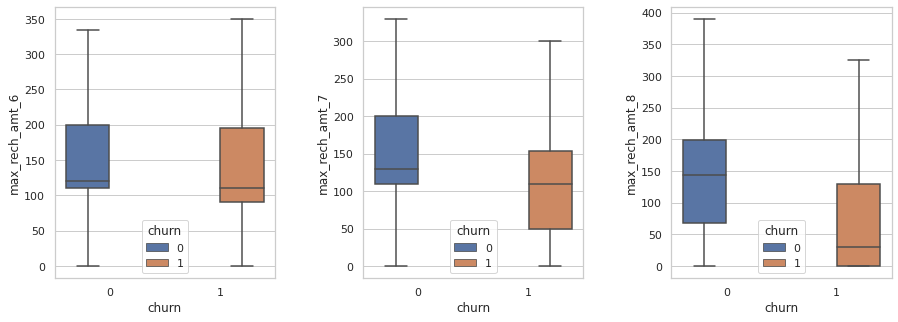


Data Visualization of churn vs max_rech_data


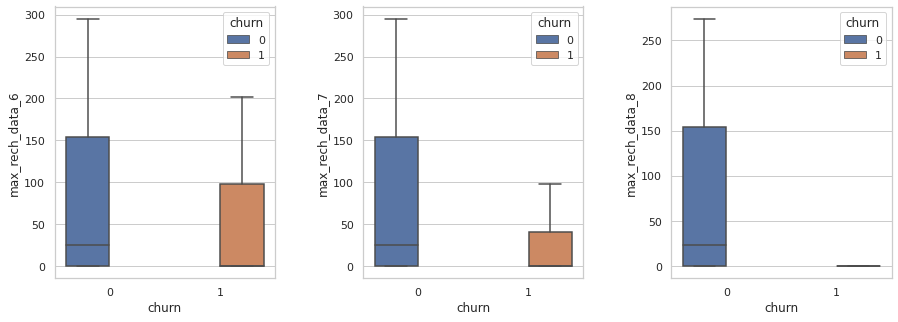


Data Visualization of churn vs count_rech_2g


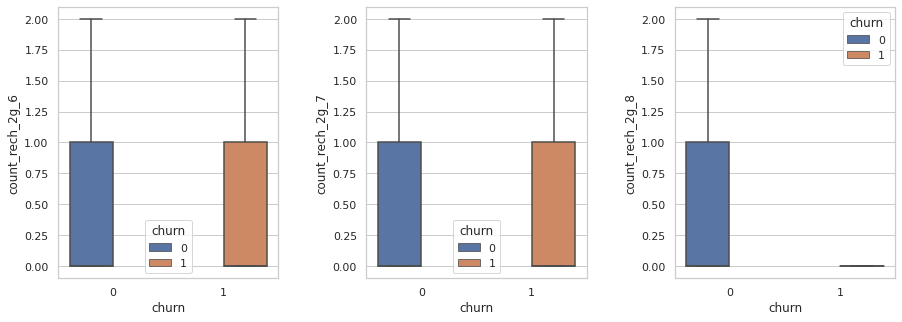


Data Visualization of churn vs count_rech_3g


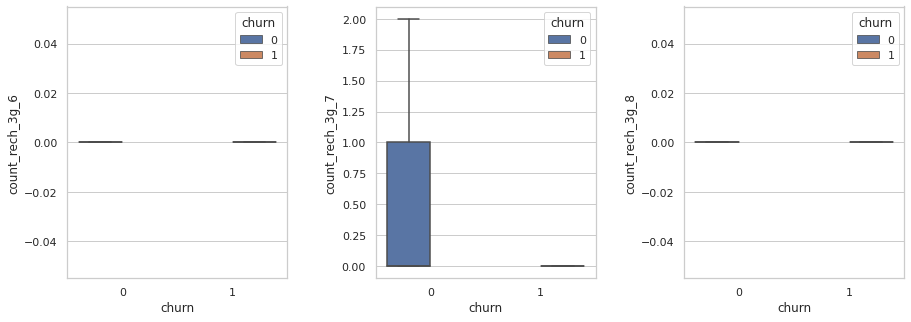


Data Visualization of churn vs vol_2g_mb


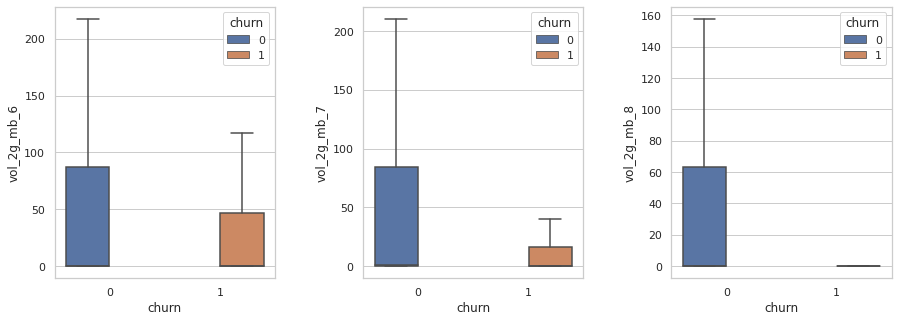


Data Visualization of churn vs vol_3g_mb


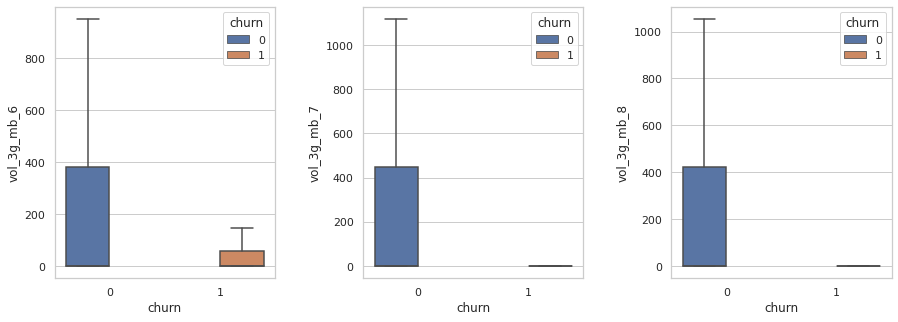


Data Visualization of churn vs monthly_2g


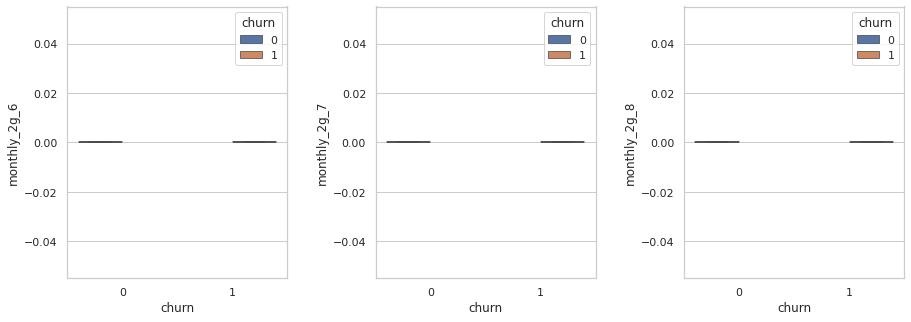


Data Visualization of churn vs sachet_2g


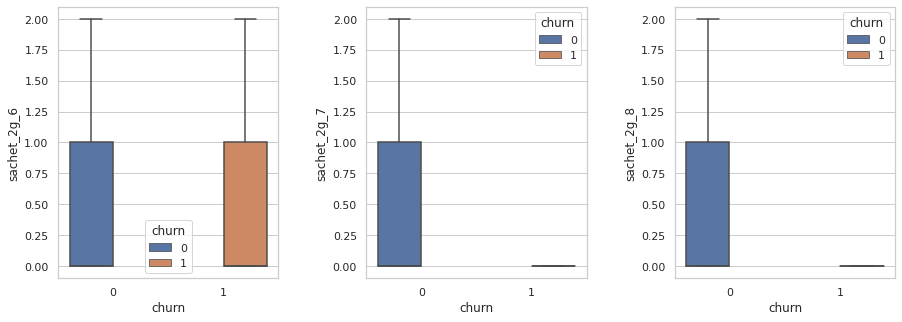


Data Visualization of churn vs monthly_3g


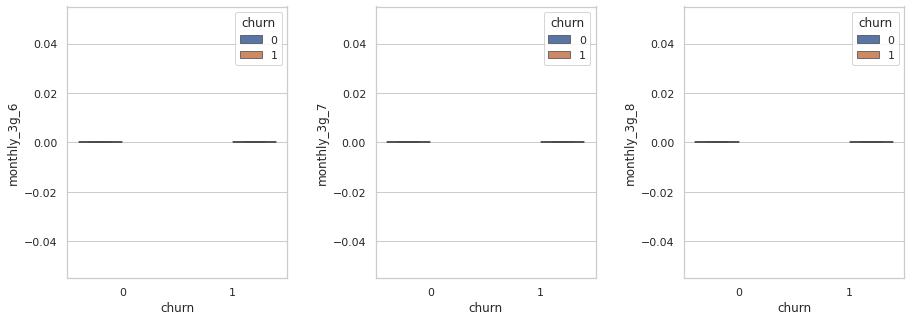


Data Visualization of churn vs sachet_3g


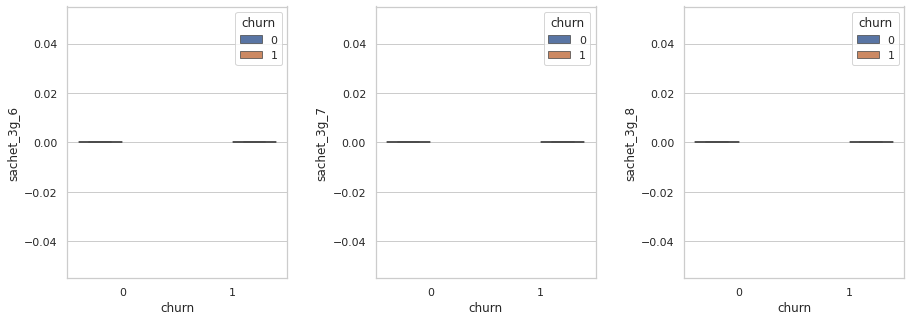


Data Visualization of churn vs fb_user


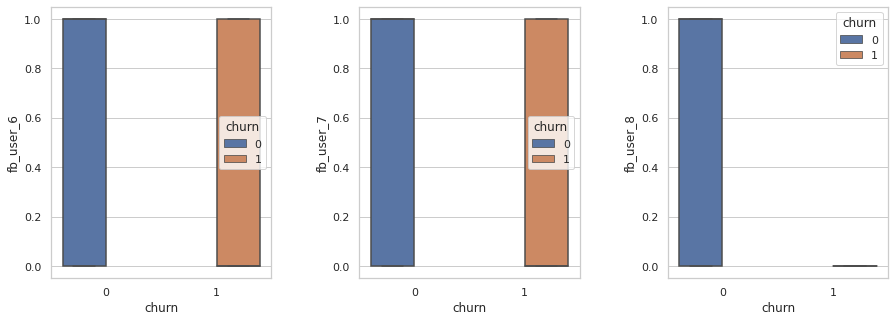


Data Visualization of churn vs vbc_3g


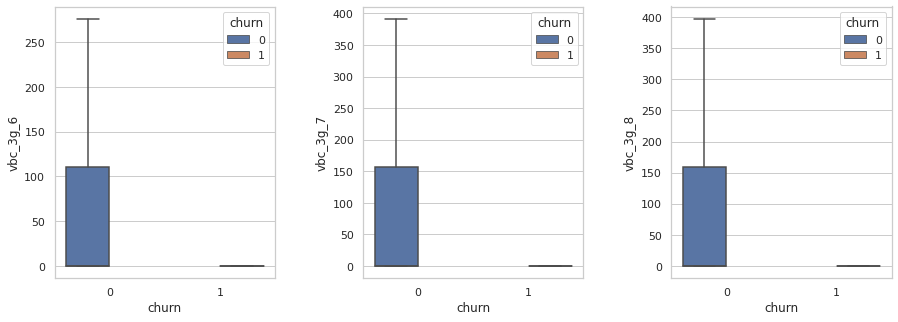


Data Visualization of churn vs total_data_rech_amt


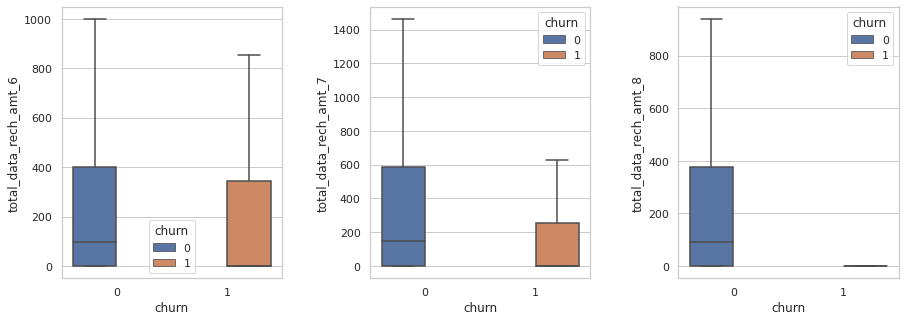

In [59]:
cols = [col[:-2] for col in telecomdata.columns if "_6" in col] 

for col in cols: 
    plot_bivariate(col)



####  Check the correlation 

In [60]:
####  check the coorelation table 
telecomdata.corr()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                   1.00    0.68    0.62         0.34         0.22   
arpu_7                   0.68    1.00    0.77         0.21         0.32   
arpu_8                   0.62    0.77    1.00         0.15         0.23   
onnet_mou_6              0.34    0.21    0.15         1.00         0.75   
onnet_mou_7              0.22    0.32    0.23         0.75         1.00   
onnet_mou_8              0.19    0.27    0.35         0.62         0.81   
offnet_mou_6             0.52    0.36    0.28         0.09         0.05   
offnet_mou_7             0.34    0.49    0.38         0.04         0.08   
offnet_mou_8             0.29    0.40    0.52         0.03         0.07   
roam_ic_mou_6            0.13    0.09    0.09         0.02         0.04   
roam_ic_mou_7            0.08    0.09    0.08         0.02         0.01   
roam_ic_mou_8            0.09    0.09    0.11         0.04         0.04   
roam_og_mou_6            0.19    0.13    0.13         0.08         0.08   
roam_og_mou_7            0.14    0.18    0.14         0.08         0.07   
roam_og_mou_8            0.13    0.15    0.20         0.07         0.08   
loc_og_mou_6             0.33    0.22    0.21         0.29         0.20   
loc_og_mou_7             0.25    0.31    0.26         0.23         0.30   
loc_og_mou_8             0.23    0.26    0.35         0.19         0.24   
std_og_mou_6             0.39    0.25    0.15         0.63         0.47   
std_og_mou_7             0.23    0.38    0.26         0.45         0.63   
std_og_mou_8             0.19    0.31    0.40         0.37         0.51   
isd_og_mou_6             0.47    0.42    0.40        -0.01        -0.01   
isd_og_mou_7             0.42    0.51    0.44        -0.02        -0.01   
isd_og_mou_8             0.42    0.45    0.46        -0.01        -0.01   
spl_og_mou_6             0.12    0.07    0.10         0.10         0.06   
spl_og_mou_7             0.07    0.12    0.12         0.08         0.11   
spl_og_mou_8             0.05    0.07    0.11         0.08         0.11   
og_others_6              0.05    0.02    0.01         0.05         0.03   
og_others_7              0.02    0.03    0.02        -0.00        -0.00   
og_others_8              0.02    0.02    0.01        -0.00         0.00   
total_og_mou_6           0.56    0.37    0.27         0.72         0.53   
total_og_mou_7           0.37    0.54    0.40         0.52         0.72   
total_og_mou_8           0.31    0.43    0.56         0.42         0.57   
loc_ic_mou_6             0.18    0.11    0.12         0.03        -0.02   
loc_ic_mou_7             0.14    0.17    0.16         0.01         0.02   
loc_ic_mou_8             0.12    0.14    0.21        -0.00         0.01   
std_ic_mou_6             0.12    0.09    0.07         0.08         0.05   
std_ic_mou_7             0.09    0.12    0.10         0.05         0.08   
std_ic_mou_8             0.08    0.12    0.14         0.04         0.06   
total_ic_mou_6           0.23    0.14    0.14         0.05        -0.00   
total_ic_mou_7           0.17    0.21    0.19         0.03         0.04   
total_ic_mou_8           0.15    0.18    0.25         0.01         0.03   
spl_ic_mou_6             0.03    0.01    0.01         0.04         0.02   
spl_ic_mou_7            -0.03   -0.02   -0.02        -0.03        -0.01   
spl_ic_mou_8            -0.01   -0.01    0.02        -0.02        -0.03   
isd_ic_mou_6             0.10    0.06    0.07        -0.02        -0.02   
isd_ic_mou_7             0.06    0.10    0.09        -0.02        -0.02   
isd_ic_mou_8             0.07    0.08    0.11        -0.02        -0.02   
ic_others_6              0.02    0.01    0.01        -0.00        -0.01   
ic_others_7              0.02    0.02    0.03        -0.01        -0.00   
ic_others_8              0.01    0.02    0.03        -0.01        -0.00   
total_rech_num_6         0.35    0.17    0.12         0.28         0.17   
total_rech_num_7         0.14    0.30    0.20   

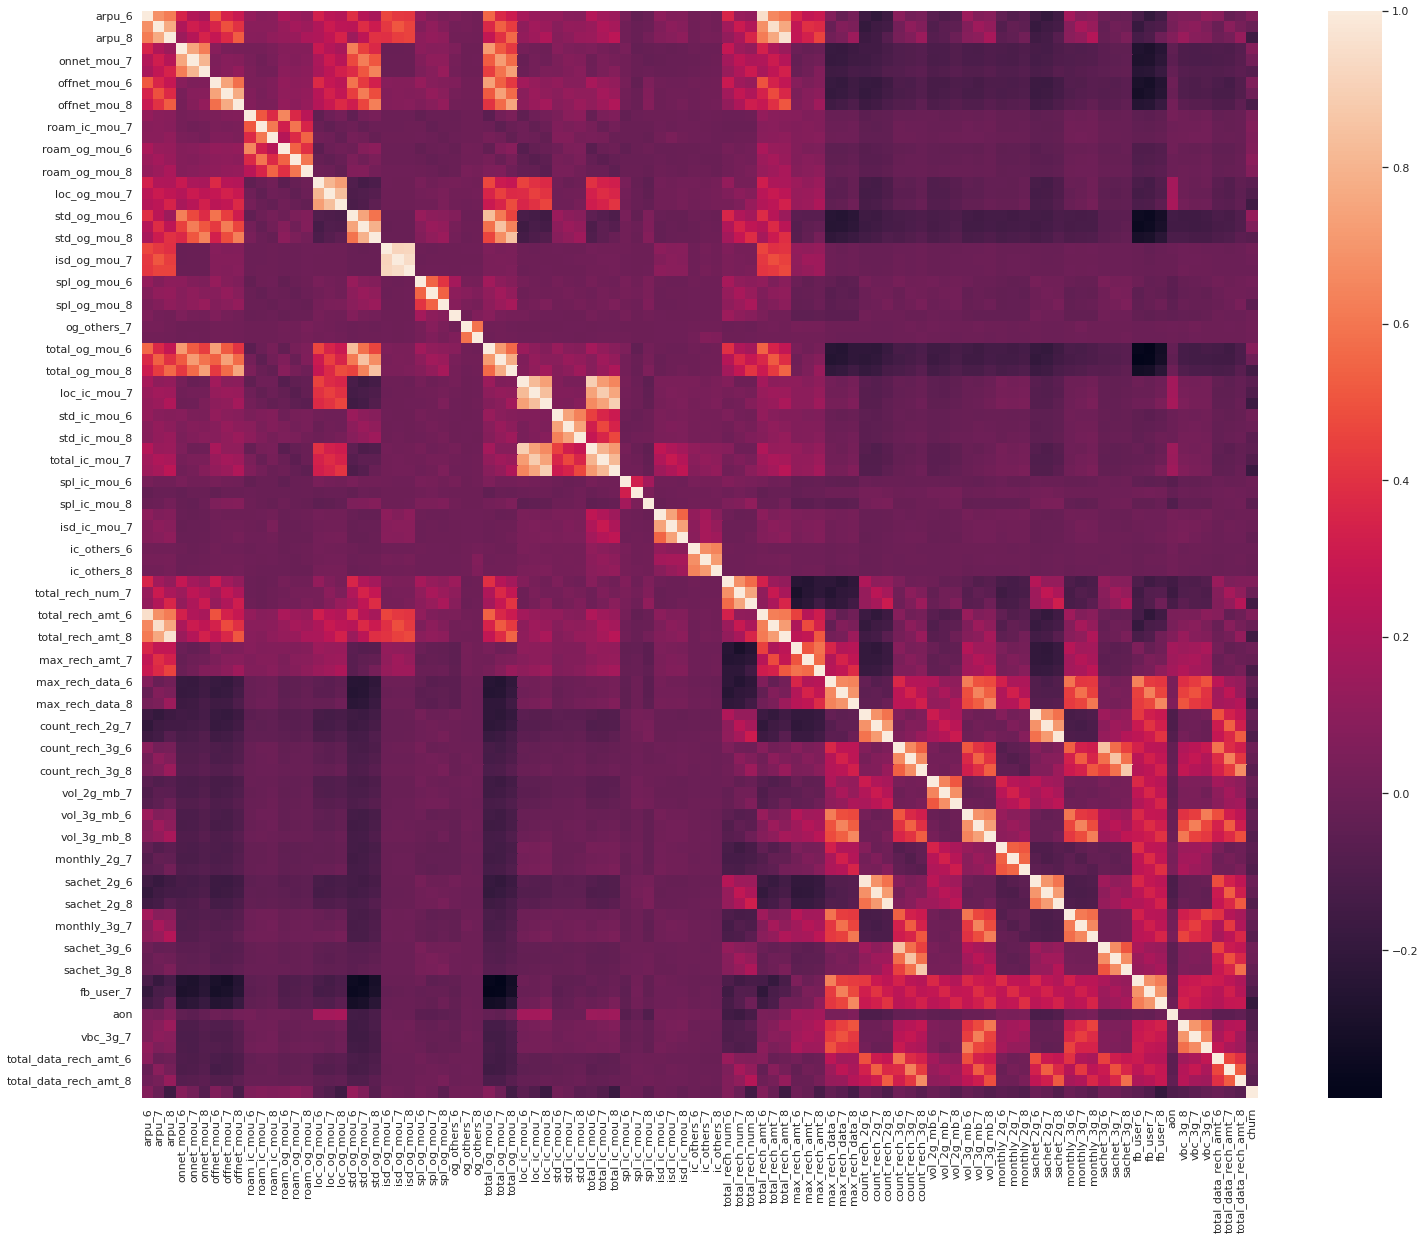

In [61]:
#### check the coorealtion matrix 
plt.figure(figsize= (25,20))
sns.heatmap(telecomdata.corr())
plt.show()

 since there are many correlated features - we shall check this again before model building  

#### Check the churn rate 

In [62]:
churn =  (sum(telecomdata.churn)/len(telecomdata.churn))*100
print("we have ", churn , "% churn rate  ")

we have  7.926502145922747 % churn rate  


#### Phase of customer behavior during churn  

1) "Good phase"   - The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual. 
   (month 6 and month 7) 

2) "Action phase" - The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
   (month 8) 

3) "Churn phase"  -  The ‘churn’ phase: In this phase, the customer is said to have churned
   (month 9)    




In [63]:
#### Derive the columns for Good phase (month 6-7)

# function to create goodphase/ activephase columns
def create_goodphase_activephase_cols(columnnames):
    for col in columnnames:
        print("creating derived column :", col+"_goodphase" )
        telecomdata[col+"_goodphase"] = (telecomdata[col+"_6"] + telecomdata[col+"_7"])/2
        print("creating derived column :", col+"_activephase" )
        telecomdata[col+"_actionphase"] = telecomdata[col+"_8"] 
        print("dropping column :",col+"_7"+" and " + col+"_8" )
        telecomdata.drop([col+"_6",col+"_7",col+"_8"], axis=1, inplace = True)
        

In [64]:
# extract generic column name - exclude fb_user and night_pck_user as these are categorical variables     
cols = [col for col in telecomdata.columns if "_6" in col] 
generic_colname = [label[:-2] for label in cols ]


In [65]:
print("goodphase and active phase columns will be created from below colums: \n ")
print(generic_colname)

goodphase and active phase columns will be created from below colums: 
 
['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user', 'vbc_3g', 'total_data_rech_amt']


In [66]:
# call function to create the goodphase/ activephase columns and remove the columns  
create_goodphase_activephase_cols(generic_colname)



creating derived column : arpu_goodphase
creating derived column : arpu_activephase
dropping column : arpu_7 and arpu_8
creating derived column : onnet_mou_goodphase
creating derived column : onnet_mou_activephase
dropping column : onnet_mou_7 and onnet_mou_8
creating derived column : offnet_mou_goodphase
creating derived column : offnet_mou_activephase
dropping column : offnet_mou_7 and offnet_mou_8
creating derived column : roam_ic_mou_goodphase
creating derived column : roam_ic_mou_activephase
dropping column : roam_ic_mou_7 and roam_ic_mou_8
creating derived column : roam_og_mou_goodphase
creating derived column : roam_og_mou_activephase
dropping column : roam_og_mou_7 and roam_og_mou_8
creating derived column : loc_og_mou_goodphase
creating derived column : loc_og_mou_activephase
dropping column : loc_og_mou_7 and loc_og_mou_8
creating derived column : std_og_mou_goodphase
creating derived column : std_og_mou_activephase
dropping column : std_og_mou_7 and std_og_mou_8
creating der

In [67]:
# check the shape and data

print("\n remaining data : ", telecomdata.shape)
telecomdata.head().T



 remaining data :  (29824, 66)


0       1      2       3       4
aon                             968.00  802.00 315.00  720.00  604.00
churn                             1.00    1.00   0.00    0.00    0.00
arpu_goodphase                  206.10 1209.51 435.47  556.10  134.12
arpu_actionphase                213.80 3171.48 137.36  637.76  366.97
onnet_mou_goodphase               0.00   56.26 382.36  117.26   49.81
onnet_mou_actionphase             0.00   52.29  35.08   85.14   33.58
offnet_mou_goodphase              0.00  510.29  87.64  827.30   87.38
offnet_mou_actionphase            0.00  325.91 136.48  983.39  205.89
roam_ic_mou_goodphase             0.00   24.86   0.00    0.00    0.00
roam_ic_mou_actionphase           0.00   31.64   0.00    0.00    0.00
roam_og_mou_goodphase             0.00   18.16   0.00    0.00    0.00
roam_og_mou_actionphase           0.00   38.06   0.00    0.00    0.00
loc_og_mou_goodphase              0.00  478.03 333.13   95.56  132.80
loc_og_mou_actionphase            0.00  255.79  63.04  129.74  182.14
std_og_mou_goodphase              0.00   68.00 136.87  848.99    4.35
std_og_mou_actionphase            0.00   77.84  98.28  938.79   39.61
isd_og_mou_goodphase              0.00    0.09   0.00    0.00    0.01
isd_og_mou_actionphase            0.00   10.01   0.00    0.00    0.00
spl_og_mou_goodphase              0.00    2.25   0.00    0.00    0.05
spl_og_mou_actionphase            0.00    6.50  10.23    0.00   17.71
og_others_goodphase               0.00    0.00   0.00    0.00    0.00
og_others_actionphase             0.00    0.00   0.00    0.00    0.00
total_og_mou_goodphase            0.00  548.38 470.01  944.57  137.21
total_og_mou_actionphase          0.00  350.16 171.56 1068.54  239.48
loc_ic_mou_goodphase              0.00  391.56  52.63  106.50  145.52
loc_ic_mou_actionphase            5.44  188.04  15.79  159.11  224.21
std_ic_mou_goodphase              0.00  176.81  13.54   62.98    8.92
std_ic_mou_actionphase            0.00  193.94   0.75  101.93   57.29
total_ic_mou_goodphase            0.00  592.25  66.17  169.49  171.23
total_ic_mou_actionphase          5.44  428.74  16.54  261.04  298.33
spl_ic_mou_goodphase              0.00    0.10   0.00    0.00    0.00
spl_ic_mou_actionphase            0.00    0.00   0.00    0.00    0.00
isd_ic_mou_goodphase              0.00    8.29   0.00    0.00   14.12
isd_ic_mou_actionphase            0.00   31.59   0.00    0.00    3.74
ic_others_goodphase               0.00   15.46   0.00    0.00    2.67
ic_others_actionphase             0.00   15.14   0.00    0.00   13.06
total_rech_num_goodphase          3.50    5.00  20.00   24.00    4.00
total_rech_num_actionphase        2.00    7.00  14.00   27.00    4.00
total_rech_amt_goodphase        307.00 1185.00 519.00  640.00  227.00
total_rech_amt_actionphase      252.00 3638.00 120.00  718.00  439.00
max_rech_amt_goodphase          252.00 1185.00 122.00   50.00   89.50
max_rech_amt_actionphase        252.00 1580.00  30.00   50.00  179.00
max_rech_data_goodphase         252.00    0.00  77.00    0.00   89.50
max_rech_data_actionphase       252.00    0.00  23.00    0.00  179.00
count_rech_2g_goodphase           0.00    0.00   1.00    0.00    0.00
count_rech_2g_actionphase         0.00    0.00   3.00    0.00    0.00
count_rech_3g_goodphase           1.00    0.00   0.00    0.00    1.00
count_rech_3g_actionphase         1.00    0.00   0.00    0.00    2.00
vol_2g_mb_goodphase              15.72    0.00 178.00    0.00    0.24
vol_2g_mb_actionphase             5.75    0.00   0.03    0.00    0.01
vol_3g_mb_goodphase             117.16    0.00 375.48    0.00  299.55
vol_3g_mb_actionphase           109.61    0.00  11.94    0.00 1009.92
monthly_2g_goodphase              0.00    0.00   0.50    0.00    0.00
monthly_2g_actionphase            0.00    0.00   0.00    0.00    0.00
sachet_2g_goodphase               0.00    0.00   0.50    0.00    0.00
sachet_2g_actionphase             0.00    0.00   3.00    0.00    0.00
monthly_3g_goodphase              1.00    0.00 

In [68]:
#### create X and y split and X_train, X_test, y_train, y_test split 

X = telecomdata.drop("churn", axis=1)
y = telecomdata["churn"]



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [76]:
print("X_train.shape :" , X_train.shape)
print("X_test.shape :" , X_test.shape)
print("y_train.shape :" , y_train.shape)
print("y_test.shape :" , y_test.shape)


X_train.shape : (20876, 65)
X_test.shape : (8948, 65)
y_train.shape : (20876,)
y_test.shape : (8948,)


In [77]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


#### handling class imbalance 

In [71]:
#### Handling class imbalance of data using SMOTEENN 

#counter = Counter(y_train)
print("Before resampling  =", Counter(y_train))
smenn = SMOTEENN()

X_train, y_train = smenn.fit_resample(X_train, y_train)

print("After resampling =", Counter(y_train))


Before resampling  = Counter({0: 19258, 1: 1618})
After resampling = Counter({1: 18950, 0: 14780})


In [74]:
print(type(X_train))

<class 'numpy.ndarray'>


#### Scaling the data 

In [78]:
#### Data before scaling 
#X_train.describe().T

In [79]:
## using robust scaler as there data has too much of outliers  
#scaler = RobustScaler()  ## Robust scaler is reducing the score hence using standard scaler
scaler = StandardScaler()


X_train =  pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index = X_train.index)
X_test  =  pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns,index = X_test.index)

In [80]:
#### Data after scaling 
X_train.describe().T

count  mean  std   min   25%   50%   75%  \
aon                             20876.00 -0.00 1.00 -1.08 -0.79 -0.38  0.59   
arpu_goodphase                  20876.00  0.00 1.00 -1.23 -0.48 -0.17  0.25   
arpu_actionphase                20876.00 -0.00 1.00 -0.96 -0.52 -0.16  0.28   
onnet_mou_goodphase             20876.00  0.00 1.00 -0.60 -0.56 -0.39  0.10   
onnet_mou_actionphase           20876.00 -0.00 1.00 -0.51 -0.49 -0.37  0.02   
offnet_mou_goodphase            20876.00  0.00 1.00 -0.83 -0.65 -0.31  0.27   
offnet_mou_actionphase          20876.00 -0.00 1.00 -0.70 -0.60 -0.31  0.21   
roam_ic_mou_goodphase           20876.00 -0.00 1.00 -0.23 -0.23 -0.23 -0.20   
roam_ic_mou_actionphase         20876.00  0.00 1.00 -0.17 -0.17 -0.17 -0.17   
roam_og_mou_goodphase           20876.00  0.00 1.00 -0.25 -0.25 -0.25 -0.22   
roam_og_mou_actionphase         20876.00 -0.00 1.00 -0.19 -0.19 -0.19 -0.19   
loc_og_mou_goodphase            20876.00 -0.00 1.00 -0.71 -0.60 -0.34  0.22   
loc_og_mou_actionphase          20876.00  0.00 1.00 -0.65 -0.58 -0.34  0.21   
std_og_mou_goodphase            20876.00 -0.00 1.00 -0.61 -0.61 -0.51  0.30   
std_og_mou_actionphase          20876.00  0.00 1.00 -0.51 -0.51 -0.47  0.09   
isd_og_mou_goodphase            20876.00 -0.00 1.00 -0.05 -0.05 -0.05 -0.05   
isd_og_mou_actionphase          20876.00 -0.00 1.00 -0.04 -0.04 -0.04 -0.04   
spl_og_mou_goodphase            20876.00  0.00 1.00 -0.37 -0.37 -0.27  0.03   
spl_og_mou_actionphase          20876.00  0.00 1.00 -0.31 -0.31 -0.29 -0.02   
og_others_goodphase             20876.00  0.00 1.00 -0.18 -0.18 -0.18 -0.18   
og_others_actionphase           20876.00  0.00 1.00 -0.02 -0.02 -0.02 -0.02   
total_og_mou_goodphase          20876.00  0.00 1.00 -0.96 -0.74 -0.26  0.41   
total_og_mou_actionphase        20876.00  0.00 1.00 -0.80 -0.69 -0.31  0.33   
loc_ic_mou_goodphase            20876.00 -0.00 1.00 -0.78 -0.59 -0.31  0.21   
loc_ic_mou_actionphase          20876.00  0.00 1.00 -0.73 -0.59 -0.31  0.20   
std_ic_mou_goodphase            20876.00 -0.00 1.00 -0.35 -0.33 -0.25 -0.03   
std_ic_mou_actionphase          20876.00  0.00 1.00 -0.32 -0.31 -0.25 -0.04   
total_ic_mou_goodphase          20876.00 -0.00 1.00 -0.83 -0.59 -0.29  0.23   
total_ic_mou_actionphase        20876.00  0.00 1.00 -0.78 -0.61 -0.29  0.23   
spl_ic_mou_goodphase            20876.00 -0.00 1.00 -0.24 -0.24 -0.24 -0.24   
spl_ic_mou_actionphase          20876.00 -0.00 1.00 -0.25 -0.25 -0.25 -0.25   
isd_ic_mou_goodphase            20876.00  0.00 1.00 -0.15 -0.15 -0.15 -0.14   
isd_ic_mou_actionphase          20876.00  0.00 1.00 -0.16 -0.16 -0.16 -0.16   
ic_others_goodphase             20876.00  0.00 1.00 -0.12 -0.12 -0.12 -0.10   
ic_others_actionphase           20876.00  0.00 1.00 -0.11 -0.11 -0.11 -0.11   
total_rech_num_goodphase        20876.00 -0.00 1.00 -1.31 -0.61 -0.27  0.31   
total_rech_num_actionphase      20876.00  0.00 1.00 -1.08 -0.65 -0.21  0.33   
total_rech_amt_goodphase        20876.00  0.00 1.00 -1.21 -0.47 -0.17  0.25   
total_rech_amt_actionphase      20876.00  0.00 1.00 -0.91 -0.52 -0.15  0.29   
max_rech_amt_goodphase          20876.00 -0.00 1.00 -1.11 -0.45 -0.28  0.19   
max_rech_amt_actionphase        20876.00 -0.00 1.00 -0.93 -0.64 -0.18  0.22   
max_rech_data_goodphase         20876.00  0.00 1.00 -0.76 -0.76 -0.52  0.68   
max_rech_data_actionphase       20876.00  0.00 1.00 -0.66 -0.66 -0.45  0.74   
count_rech_2g_goodphase         20876.00  0.00 1.00 -0.55 -0.55 -0.34  0.08   
count_rech_2g_actionphase       20876.00 -0.00 1.00 -0.48 -0.48 -0.48 -0.08   
count_rech_3g_goodphase         20876.00 -0.00 1.00 -0.40 -0.40 -0.40  0.05   
count_rech_3g_actionphase       20876.00 -0.00 1.00 -0.33 -0.33 -0.33 -0.33   
vol_2g_mb_goodphase             20876.00 -0.00 1.00 -0.42 -0.42 -0.40 -0.06   
vol_2g_mb_actionphase           20876.00  0.00 1.00 -0.34 -0.34 -0.34 -0.18   
vol_3g_mb_goodphase             20876.00  0.00 1.00 -0.42 -0.42 -0.42  0.11   
vol_3g

####  Check the correlation again 

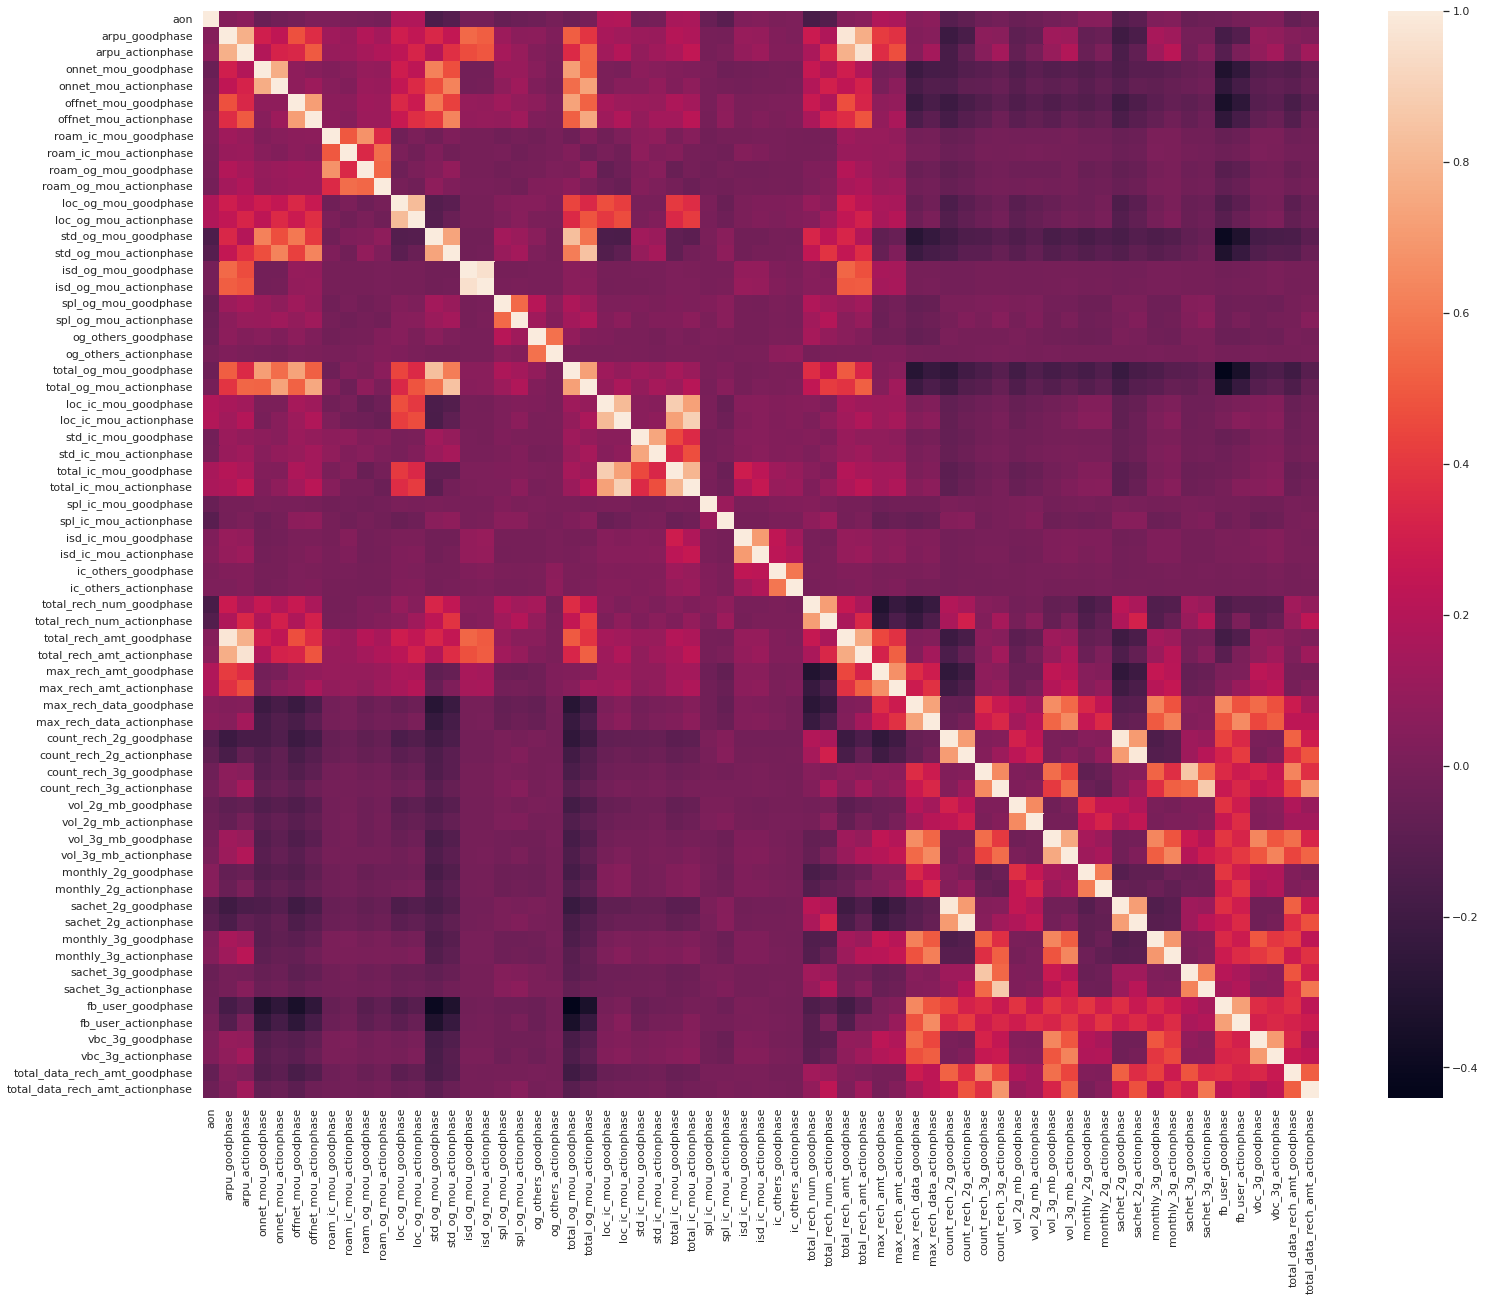

In [81]:
#### check the coorealtion matrix 
plt.figure(figsize= (25,20))
sns.heatmap(X_train.corr())
plt.show()

In [82]:
# find columsn which are correlated up to 80% and drop them 
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


print("below columns have high correlation of greater than 0.95 and hence will be dropped \n")
print("count of column to be dropped = ", len(col_to_drop) , "\n" )
print(col_to_drop)
print("\n shape train before dropping = ", X_train.shape)
print("\n shape test before dropping = ", X_test.shape)

X_train_without_corr = X_train.drop(col_to_drop, axis=1)
X_test_without_corr =  X_test[X_train_without_corr.columns]
print("\n shape train after dropping = ", X_train_without_corr.shape)
print("\n shape test after dropping = ", X_test_without_corr.shape)

below columns have high correlation of greater than 0.95 and hence will be dropped 

count of column to be dropped =  13 

['loc_og_mou_actionphase', 'isd_og_mou_actionphase', 'total_og_mou_goodphase', 'total_og_mou_actionphase', 'loc_ic_mou_actionphase', 'total_ic_mou_goodphase', 'total_ic_mou_actionphase', 'total_rech_amt_goodphase', 'total_rech_amt_actionphase', 'sachet_2g_goodphase', 'sachet_2g_actionphase', 'sachet_3g_goodphase', 'sachet_3g_actionphase']

 shape train before dropping =  (20876, 65)

 shape test before dropping =  (8948, 65)

 shape train after dropping =  (20876, 52)

 shape test after dropping =  (8948, 52)


### MODELLING

In [83]:
# create score charts to record score of all models 
score_chart = pd.DataFrame()

In [84]:
### function to get the model scores 
def model_metrics(model, X_test, title):
    scores = []
    # Plot ROC and PR curves using all models and test data
    plt.plot(figsize = (14, 6))

    pred_test = model.predict(X_test)
    pred_test_probs = model.predict_proba(X_test)[:, 1:]
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    
    p, r, t = precision_recall_curve(y_test, pred_test_probs)

    model_f1_score = f1_score(y_test, pred_test)
    model_precision_score = precision_score(y_test, pred_test)
    model_recall_score = recall_score(y_test, pred_test)
    model_accuracy_score = accuracy_score(y_test, pred_test)
    model_auc_roc = auc(fpr, tpr)

    scores.append((title,
                   model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   confusion_matrix(y_test, pred_test)))

    plt.plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC ROC curve")
    plt.legend(loc = "lower right")
    plt.show()
    sampling_results = pd.DataFrame(scores, columns = ['Model','f1_score', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 
                                                       'confusion_matrix'])
    return sampling_results

### LogisticRegression

#### LogisticRegression using RFE  - default parameters 

In [85]:
logreg = LogisticRegression(random_state=42)
rfe = RFE(logreg, 45)
rfe = rfe.fit(X_train, y_train)

In [86]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('aon', True, 1),
 ('arpu_goodphase', True, 1),
 ('arpu_actionphase', True, 1),
 ('onnet_mou_goodphase', True, 1),
 ('onnet_mou_actionphase', True, 1),
 ('offnet_mou_goodphase', False, 18),
 ('offnet_mou_actionphase', True, 1),
 ('roam_ic_mou_goodphase', True, 1),
 ('roam_ic_mou_actionphase', False, 21),
 ('roam_og_mou_goodphase', True, 1),
 ('roam_og_mou_actionphase', True, 1),
 ('loc_og_mou_goodphase', False, 19),
 ('loc_og_mou_actionphase', True, 1),
 ('std_og_mou_goodphase', True, 1),
 ('std_og_mou_actionphase', False, 14),
 ('isd_og_mou_goodphase', False, 15),
 ('isd_og_mou_actionphase', True, 1),
 ('spl_og_mou_goodphase', False, 9),
 ('spl_og_mou_actionphase', False, 3),
 ('og_others_goodphase', True, 1),
 ('og_others_actionphase', True, 1),
 ('total_og_mou_goodphase', True, 1),
 ('total_og_mou_actionphase', True, 1),
 ('loc_ic_mou_goodphase', True, 1),
 ('loc_ic_mou_actionphase', True, 1),
 ('std_ic_mou_goodphase', True, 1),
 ('std_ic_mou_actionphase', True, 1),
 ('total_ic_mou

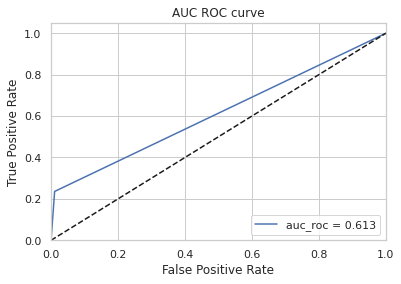

Model  f1_score  precision  recall  accuracy  auc_roc  \
0  LR - RFE      0.35       0.67    0.24      0.93     0.61   

           confusion_matrix  
0  [[8115, 87], [570, 176]]

In [87]:
logreg = logreg.fit(X_train[X_train.columns[rfe.support_]],y_train)
score_chart = score_chart.append(model_metrics(logreg, X_test[X_test.columns[rfe.support_]], "LR - RFE" ))
score_chart

#### LogisticRegression with tuned hyper parameters  

In [88]:
logreg_hyper = LogisticRegression(n_jobs=-1, random_state=42)

# parameters to build the model on
param_grid = { 'penalty': ['l1', 'l2'] , 'C' : [1, 10, 100, 1000] }

# Instantiate the grid search model
gc = GridSearchCV(estimator = logreg_hyper, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gc = gc.fit(X_train, y_train)

gc.best_params_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.7s finished


{'C': 100, 'penalty': 'l2'}

In [89]:
gc.best_score_

0.9318835776722416

In [90]:
gc.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [91]:
gc.best_params_

{'C': 100, 'penalty': 'l2'}

In [92]:
C = gc.best_params_['C']
penalty =  gc.best_params_['penalty']

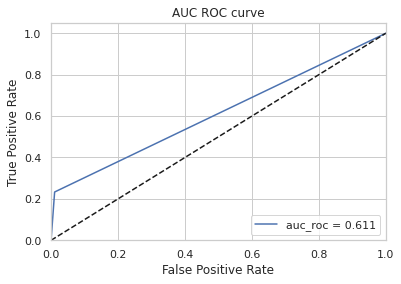

Model  f1_score  precision  recall  accuracy  auc_roc  \
0                 LR - RFE      0.35       0.67    0.24      0.93     0.61   
0  LR - tuned hyper params      0.35       0.67    0.23      0.93     0.61   

           confusion_matrix  
0  [[8115, 87], [570, 176]]  
0  [[8115, 87], [572, 174]]

In [93]:
logreg_hyper = LogisticRegression(penalty = penalty , C= C, n_jobs=-1, random_state=42)
logreg_hyper.fit(X_train, y_train)
score_chart = score_chart.append(model_metrics(logreg_hyper, X_test, "LR - tuned hyper params" ))
score_chart




### Applying PCA on the data 

In [94]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [95]:
pca.components_

array([[ 1.12312076e-02,  1.71889407e-01,  1.53934212e-01, ...,
        -1.19612455e-01, -1.67114579e-01, -1.26129686e-01],
       [ 4.19753924e-02,  2.32629423e-01,  2.51935557e-01, ...,
         1.95407510e-01,  1.32019634e-01,  1.36083936e-01],
       [-1.23403329e-01,  4.81602503e-02,  7.61756984e-02, ...,
        -4.33234172e-02,  2.10921406e-01,  2.27795559e-01],
       ...,
       [ 0.00000000e+00, -6.84195459e-17,  4.86889932e-17, ...,
         1.24146284e-16, -1.41447241e-16, -1.96236234e-16],
       [-0.00000000e+00,  5.80323981e-16, -3.80410976e-16, ...,
         1.24779275e-16,  2.46782243e-17, -1.24246546e-16],
       [-0.00000000e+00, -2.26006791e-16,  4.45444412e-16, ...,
        -1.12937998e-16,  1.20601555e-16, -6.91636186e-17]])

In [96]:
pca.explained_variance_ratio_

array([1.38202744e-01, 1.12228311e-01, 7.59228972e-02, 6.16963340e-02,
       4.87406259e-02, 4.14422038e-02, 3.78651185e-02, 3.33719337e-02,
       2.83783726e-02, 2.78502490e-02, 2.67967631e-02, 2.37496116e-02,
       2.23151968e-02, 2.11194090e-02, 1.93995886e-02, 1.90496340e-02,
       1.75368240e-02, 1.68397611e-02, 1.64967970e-02, 1.57679677e-02,
       1.39009508e-02, 1.34113493e-02, 1.31379059e-02, 1.24561443e-02,
       1.15984458e-02, 1.05022529e-02, 9.62778090e-03, 9.39524205e-03,
       8.54126543e-03, 7.65469739e-03, 6.70493873e-03, 6.54125758e-03,
       6.27519036e-03, 6.04842843e-03, 5.67503310e-03, 5.42870370e-03,
       4.92663555e-03, 4.63508689e-03, 4.20694774e-03, 3.79546774e-03,
       3.63053836e-03, 3.58446702e-03, 3.44153205e-03, 3.36701652e-03,
       3.13465531e-03, 2.62256442e-03, 2.40594622e-03, 2.18619242e-03,
       1.53874243e-03, 1.41260405e-03, 1.22395901e-03, 1.15375553e-03,
       4.51120270e-04, 3.76064873e-04, 2.31941194e-04, 3.96910517e-06,
      

#### Making the scree plot for the explained variance 

In [97]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

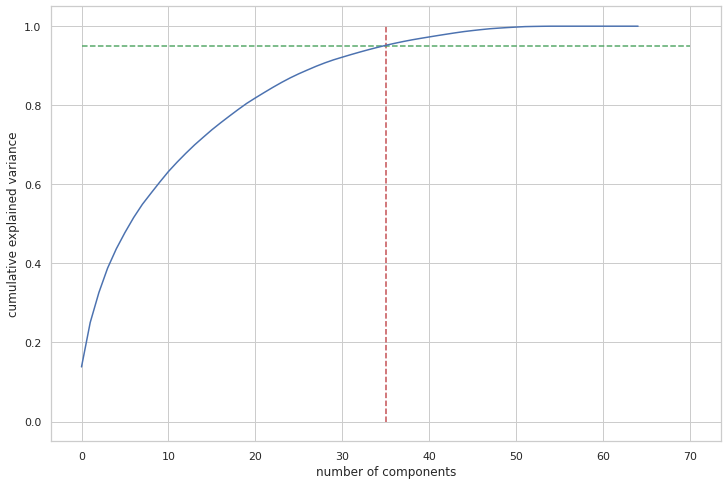

In [98]:
plt.figure(figsize=[12,8])
plt.vlines(x=35, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(var_cumu)
plt.show()

Perform PCA with 36 components 

In [99]:
pca_final = IncrementalPCA(n_components=36)

In [100]:
df_train_pca = pca_final.fit_transform(X_train)

In [101]:
corrmat =  np.corrcoef(df_train_pca.transpose())

In [102]:
corrmat.shape

(36, 36)

Plotting the heatmap of coor matrix 

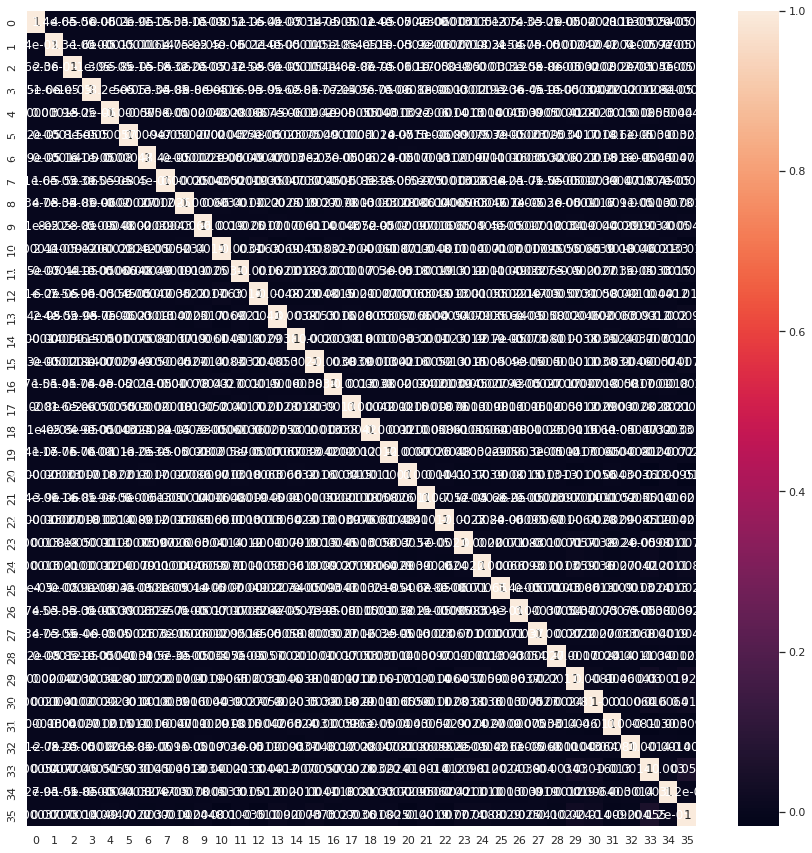

In [103]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [104]:
#### applying transformation on test
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8948, 36)

#### Logistic regression on Principal components  

In [105]:
learner_pca = LogisticRegression() 

In [106]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [107]:
df_train_pca.shape

(20876, 36)

In [108]:
y_train.shape

(20876,)

In [109]:
df_test_pca.shape

(8948, 36)

making prediction on the test set 

In [110]:
pred_probs_test  =  model_pca.predict_proba(df_test_pca)

In [111]:
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

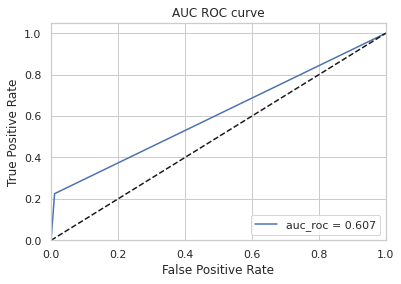

Model  f1_score  precision  recall  accuracy  auc_roc  \
0                 LR - RFE      0.35       0.67    0.24      0.93     0.61   
0  LR - tuned hyper params      0.35       0.67    0.23      0.93     0.61   
0                 LR - PCA      0.34       0.66    0.23      0.93     0.61   

           confusion_matrix  
0  [[8115, 87], [570, 176]]  
0  [[8115, 87], [572, 174]]  
0  [[8116, 86], [578, 168]]

In [112]:
score_chart =  score_chart.append(model_metrics(learner_pca,df_test_pca,"LR - PCA"))
score_chart

#### Logisticregression with PCA and hyper parameter tuning 

In [113]:
logreg_pca_hyper = LogisticRegression(n_jobs=-1, random_state=42)

# parameters to build the model on
param_grid = { 'penalty': ['l1', 'l2'] , 'C' : [1, 10, 100, 1000] }

# Instantiate the grid search model
gc = GridSearchCV(estimator = logreg_pca_hyper, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gc = gc.fit(df_train_pca, y_train)
#model_pca = learner_pca.fit(df_train_pca, y_train)

gc.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.2s finished


{'C': 10, 'penalty': 'l2'}

In [114]:
C = gc.best_params_['C']
penalty =  gc.best_params_['penalty']

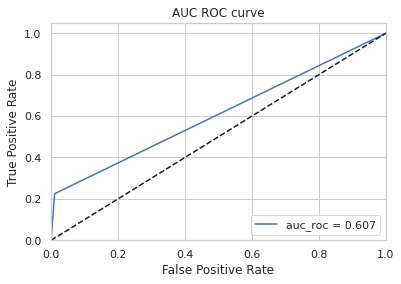

Model  f1_score  precision  recall  accuracy  \
0                       LR - RFE      0.35       0.67    0.24      0.93   
0        LR - tuned hyper params      0.35       0.67    0.23      0.93   
0                       LR - PCA      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   

   auc_roc          confusion_matrix  
0     0.61  [[8115, 87], [570, 176]]  
0     0.61  [[8115, 87], [572, 174]]  
0     0.61  [[8116, 86], [578, 168]]  
0     0.61  [[8115, 87], [578, 168]]  
0     0.61  [[8115, 87], [578, 168]]

In [116]:
logreg_pca_hyper = LogisticRegression(penalty = penalty , C = C, n_jobs=-1, random_state=42)
logreg_pca_hyper.fit(df_train_pca, y_train)
score_chart = score_chart.append(model_metrics(logreg_pca_hyper, df_test_pca, "LR - PCA - tuned hyper params" ))
score_chart

### DecisionTreeClassifier  

#### with default parameters 

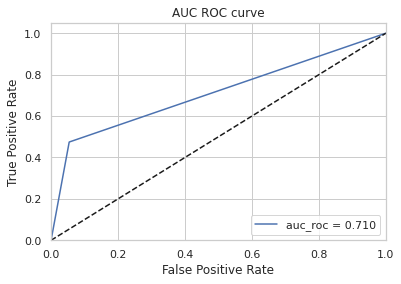

Model  f1_score  precision  recall  accuracy  \
0                       LR - RFE      0.35       0.67    0.24      0.93   
0        LR - tuned hyper params      0.35       0.67    0.23      0.93   
0                       LR - PCA      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0           DTC - Default params      0.46       0.44    0.47      0.91   

   auc_roc           confusion_matrix  
0     0.61   [[8115, 87], [570, 176]]  
0     0.61   [[8115, 87], [572, 174]]  
0     0.61   [[8116, 86], [578, 168]]  
0     0.61   [[8115, 87], [578, 168]]  
0     0.61   [[8115, 87], [578, 168]]  
0     0.71  [[7758, 444], [392, 354]]

In [117]:
tree = DecisionTreeClassifier(random_state=42)
tree = tree.fit(X_train, y_train)
score_chart = score_chart.append(model_metrics(tree, X_test, "DTC - Default params" ))
score_chart

#### PCA with default params 

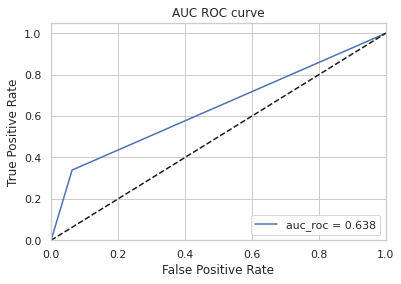

Model  f1_score  precision  recall  accuracy  \
0                       LR - RFE      0.35       0.67    0.24      0.93   
0        LR - tuned hyper params      0.35       0.67    0.23      0.93   
0                       LR - PCA      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0           DTC - Default params      0.46       0.44    0.47      0.91   
0      DTC - PCA- Default params      0.33       0.33    0.34      0.89   

   auc_roc           confusion_matrix  
0     0.61   [[8115, 87], [570, 176]]  
0     0.61   [[8115, 87], [572, 174]]  
0     0.61   [[8116, 86], [578, 168]]  
0     0.61   [[8115, 87], [578, 168]]  
0     0.61   [[8115, 87], [578, 168]]  
0     0.71  [[7758, 444], [392, 354]]  
0     0.64  [[7687, 515], [493, 253]]

In [118]:
tree_pca = DecisionTreeClassifier(random_state=42)
tree_pca = tree_pca.fit(df_train_pca, y_train)
score_chart = score_chart.append(model_metrics(tree_pca, df_test_pca, "DTC - PCA- Default params" ))
score_chart

#### PCA with hyper tuned params 

In [119]:
tree_pca_hyper = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': [10,20,30,40,50,60,70,80,90,100,None],
             'min_samples_split' : [2,4,6,8,10],
             'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10]
             }

# Instantiate the grid search model
gc = GridSearchCV(estimator = tree_pca_hyper, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gc = gc.fit(df_train_pca, y_train)
#model_pca = learner_pca.fit(df_train_pca, y_train)

gc.best_params_

Fitting 5 folds for each of 550 candidates, totalling 2750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 2750 out of 2750 | elapsed: 35.4min finished


{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [120]:
max_depth = gc.best_params_['max_depth']
min_samples_split = gc.best_params_['min_samples_split']
min_samples_leaf = gc.best_params_['min_samples_leaf']

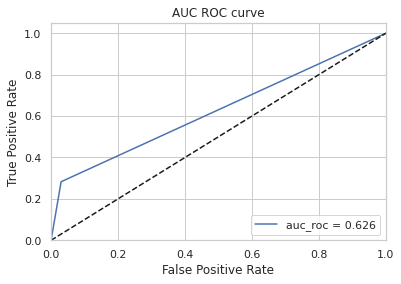

Model  f1_score  precision  recall  accuracy  \
0                       LR - RFE      0.35       0.67    0.24      0.93   
0        LR - tuned hyper params      0.35       0.67    0.23      0.93   
0                       LR - PCA      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0           DTC - Default params      0.46       0.44    0.47      0.91   
0      DTC - PCA- Default params      0.33       0.33    0.34      0.89   
0  DTC - PCA- tuned hyper params      0.35       0.46    0.28      0.91   

   auc_roc           confusion_matrix  
0     0.61   [[8115, 87], [570, 176]]  
0     0.61   [[8115, 87], [572, 174]]  
0     0.61   [[8116, 86], [578, 168]]  
0     0.61   [[8115, 87], [578, 168]]  
0     0.61   [[8115, 87], [578, 168]]  
0     0.71  [[7758, 444], [392, 354]]  
0     0.64  [[7687, 515], [493, 253]]  
0     0.63  [[7956, 246], [535, 211]]

In [121]:
# Decision tree with best params 
tree_pca_hyper = DecisionTreeClassifier(max_depth = max_depth,min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf , random_state=42)

tree_pca_hyper = tree_pca_hyper.fit(df_train_pca, y_train)
score_chart = score_chart.append(model_metrics(tree_pca_hyper, df_test_pca, "DTC - PCA- tuned hyper params" ))
score_chart

### Random forest Classifier 

#### With default parameters 

In [122]:
#### Random forest with Default parameter 

rf = RandomForestClassifier(random_state=42) 

print("Randomforest default parameters are : \n")
pprint(rf.get_params())

rf = rf.fit(X_train, y_train)

Randomforest default parameters are : 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


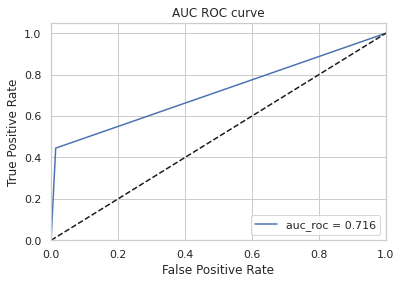

Model  f1_score  precision  recall  accuracy  \
0                       LR - RFE      0.35       0.67    0.24      0.93   
0        LR - tuned hyper params      0.35       0.67    0.23      0.93   
0                       LR - PCA      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0  LR - PCA - tuned hyper params      0.34       0.66    0.23      0.93   
0           DTC - Default params      0.46       0.44    0.47      0.91   
0      DTC - PCA- Default params      0.33       0.33    0.34      0.89   
0  DTC - PCA- tuned hyper params      0.35       0.46    0.28      0.91   
0           RFC - default params      0.56       0.75    0.45      0.94   

   auc_roc           confusion_matrix  
0     0.61   [[8115, 87], [570, 176]]  
0     0.61   [[8115, 87], [572, 174]]  
0     0.61   [[8116, 86], [578, 168]]  
0     0.61   [[8115, 87], [578, 168]]  
0     0.61   [[8115, 87], [578, 168]]  
0     0.71  [[7758, 444], [392, 354]]  
0     0.64  [[7687, 515], [493, 253]]  
0     0.63  [[7956, 246], [535, 211]]  
0     0.72  [[8089, 113], [414, 332]]

In [123]:
score_chart =  score_chart.append(model_metrics(rf,X_test,"RFC - default params"))
score_chart

#### RandomForestClassifier with tuned hyper parameters  

In [124]:
####  Random Forest : tuning each hyper parameter to find the best one with GridsearchCV  :) 

###  tuning n_estimator 

rf_1 = RandomForestClassifier(n_jobs=-1,random_state=42) 

param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [125]:
# Instantiate the grid search model
gc = GridSearchCV(estimator = rf_1, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)


In [126]:
gc = gc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 26.9min finished


In [127]:
print(gc.best_params_)
n_estimators = gc.best_params_['n_estimators']

{'n_estimators': 600}


In [ ]:
# create param grid to tune max_features  
param_grid = {  'max_features' : ['auto','sqrt']  }

rf_2 = RandomForestClassifier(n_estimators = n_estimators, n_jobs=-1, random_state=42) 

# Instantiate the grid search model
gc = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gc = gc.fit(X_train, y_train)
gc.best_params_

print(gc.best_params_)
max_features = gc.best_params_['max_features']

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
# create param grid to tune max_depth  

param_grid = { 'max_depth'    : [10,20,30,40,50,60,70,80,90,100,None] }

rf_3 = RandomForestClassifier(n_estimators = n_estimators,max_features = max_features,n_jobs=-1, random_state=42) 

# Instantiate the grid search model
gc = GridSearchCV(estimator = rf_3, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gc = gc.fit(X_train, y_train)

max_depth = gc.best_params_['max_depth']

In [ ]:
# Best Param : n_estimators = 1000 , max_features = auto , max_depth = 30 
# create param grid with tuning min_samples_split

param_grid = { 'min_samples_split'    : [2,4,6,8,10] }

rf_4 = RandomForestClassifier(n_estimators = n_estimators,max_features=max_features,max_depth = max_depth, n_jobs=-1,random_state=42) 

# Instantiate the grid search model
gc = GridSearchCV(estimator = rf_4, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gc = gc.fit(X_train, y_train)
gc.best_params_
min_samples_split = gc.best_params_['min_samples_split']

In [ ]:
# Best Param : n_estimators = 1000 , max_features = auto , max_depth = 30 , min_samples_split = 2
# tuning min_samples_leaf

param_grid = { 'min_samples_leaf'    : [1,2,3,4,5,6,7,8,9,10] }

rf_5 = RandomForestClassifier(min_samples_split = min_samples_split, n_estimators = n_estimators,max_features=max_features,max_depth = max_depth, n_jobs=-1,random_state=42) 

# Instantiate the grid search model
gc = GridSearchCV(estimator = rf_5, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gc = gc.fit(X_train, y_train)
gc.best_params_
min_samples_leaf = gc.best_params_['min_samples_leaf']

In [ ]:
# Best Param : n_estimators = 1000 , max_features = auto , max_depth = 30 , min_samples_split = 2, min_samples_leaf = 

#### Running Randomforest with all the best parameters 

rf_bestparams = RandomForestClassifier(min_samples_leaf = min_samples_leaf , min_samples_split = min_samples_split, n_estimators = n_estimators,max_features='auto',max_depth = 30, n_jobs=-1,random_state=42) 

# Instantiate the grid search model
#gc = GridSearchCV(estimator = rf_bestparams, param_grid = param_grid, 
#                          cv = 5, n_jobs = -1, verbose = 2)
rf_bestparams = rf_bestparams.fit(X_train, y_train)


In [ ]:
score_chart =  score_chart.append(model_metrics(rf_bestparams,X_test,"RFC - tuned hyper params"))
score_chart

No increase in F1 score between Randomforest with default and best parameters 

#### RFC with PCA 

In [ ]:
rf_pca  =  RandomForestClassifier(n_jobs=-1,random_state=42)
rf_pca = rf_pca.fit(df_train_pca, y_train)


In [ ]:
score_chart =  score_chart.append(model_metrics(rf_pca,df_test_pca,"RFC - PCA - default params "))
score_chart

#### RFC with PCA - hyper params 

In [ ]:
rfa_pca_hyper = RandomForestClassifier(n_jobs=-1,random_state=42)

param_grid = {'max_depth': [10,20,30,40,None],
             'min_samples_split' : [2,4,6],
             }

# Instantiate the grid search model
gc = GridSearchCV(estimator = rfa_pca_hyper, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
gc = gc.fit(df_train_pca, y_train)

gc.best_params_

In [ ]:
max_depth = gc.best_params_['max_depth']
min_samples_split = gc.best_params_['min_samples_split']
#min_samples_leaf = gc.best_params_['min_samples_leaf']

In [ ]:
# Decision tree with best params 
rfa_pca_hyper = RandomForestClassifier(max_depth = max_depth,min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf , random_state=42)

rfa_pca_hyper = rfa_pca_hyper.fit(df_train_pca, y_train)
score_chart = score_chart.append(model_metrics(rfa_pca_hyper, df_test_pca, "RFC - PCA - tuned hyper params" ))
score_chart

####  the best model based on F1_score is RFC with tuned hyper params 

In [ ]:
rf_bestparams.feature_importances_

In [ ]:
imp=rf.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)

ax = sns.barplot(x=  'importance', y='Variable', data=df_2[0:20])
ax.set(xlabel = 'Importance', ylabel = 'Top 12 Features')
plt.show()

In [ ]:
df_1.sort_values("importance" , ascending=False).head(20)

### Above is the list of top 20 features with their scores which are important in predicting churn